In [1]:
pip install pytesseract


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pytesseract
from PIL import Image

# Path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Open the image file 
image_path =r"C:\Users\manee\Desktop\Infosys springboard certificates\smile.jpg"
image = Image.open(image_path)

# Use Tesseract to extract text from the image
extracted_text = pytesseract.image_to_string(image)

# Print the extracted text
print("Extracted Text:")
print(extracted_text)


C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Extracted Text:
SMILE



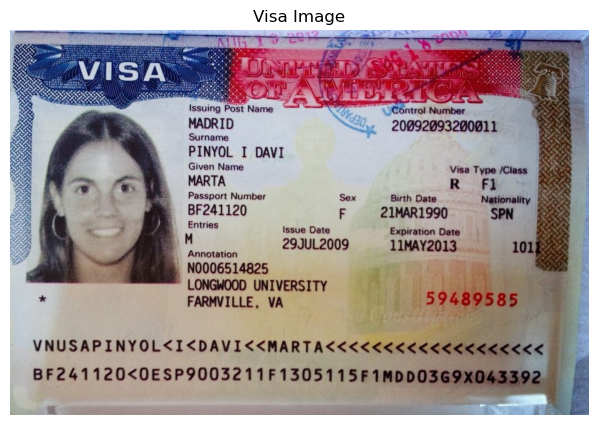

In [3]:
import pytesseract
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
# Load the image
image_path = r"C:\Users\manee\Desktop\Infosys springboard certificates\visacardperson.jpg"
image = cv2.imread(image_path)
# converting BGR image into RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 5))
plt.imshow(image_rgb)
plt.title("Visa Image")
plt.axis('off')  # Hide axes
plt.show()

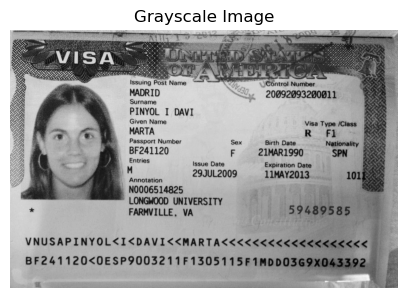

Extracted Text after Grayscale Conversion:
 Issuing Post Name a Control Number

MADRID 20892893280811
Surname

PINYOL I DAVI

Given Name Visa Type /Class
MARTA Rf
Passport Number Sex Birth Date Nationality
BF241120 F 21MAR1990 SPN
Entries Issue Date Expiration Date

M 29JUL2009 1IMAY2013 101

Annotation

No006514825 4 Rs
LONGWOOD UNIVERSITY bb
* FARMVILLE, VA 59489585

RRR
BF241120<0ESP9003211F1305115F 1MDDO3G9XO4 7




In [4]:
# 1. Convert to Grayscale
image = cv2.imread(r'C:\Users\manee\Desktop\Infosys springboard certificates\visacardperson.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(5, 5))
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()
text_gray = pytesseract.image_to_string(gray)
print("Extracted Text after Grayscale Conversion:\n", text_gray)

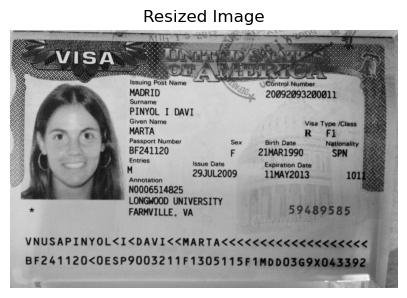

Extracted Text after Resizing:
 Issuing Post Name Control Number

MADRID 20892093280811

Surname

PINYOL I DAVI

Given Name Visa Type /Class
MARTA R_ Fil
Passport Number Sex Birth Date Nationality
BF241120 F 21MAR1990 SPN

Entries

Issue Date Expiration Date
ae 29JUL2009 11MAY2013 101
lalate) ion
‘ ~_— N0006514825 ee as
— * LONGWOOD UNIVERSITY . bb ie
* FARMVILLE, VA 59489 85 4

3
‘

VNUSAPINYOL<I<DAVI<<MARTA<<<<<<<<K<kekKKKKK<< ;

BF241120<0ESP9003211F1305115F 1MDDO3G9X04339;




In [5]:
# 2. Resize (Enlarge for better OCR)
scale_factor = 1.5  # Increase size by 1.5x
resized = cv2.resize(gray, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(5, 5))
plt.imshow(resized, cmap='gray')
plt.title("Resized Image")
plt.axis('off')
plt.show()
text_resized = pytesseract.image_to_string(resized)
print("Extracted Text after Resizing:\n", text_resized)


In [6]:
# 3.Noise Removal (Denoising)
denoised = cv2.fastNlMeansDenoising(binary, h=30)
plt.figure(figsize=(5, 5))
plt.imshow(denoised, cmap='gray')
plt.title("Denoised Image")
plt.axis('off')
plt.show()
# Extract Text Using Tesseract OCR
text_noise_removed = pytesseract.image_to_string(denoised)

print("Extracted Text after noise removal:\n", text_noise_removed)

NameError: name 'binary' is not defined

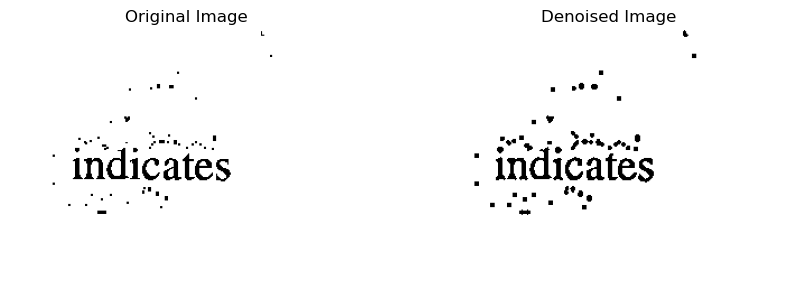

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the noisy image
image_path = r"C:\Users\manee\Desktop\Infosys springboard certificates\before denoise.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply adaptive thresholding for better binarization
denoised = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY, 11, 2)

# Display the original and denoised images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Denoised Image")
plt.imshow(denoised, cmap='gray')
plt.axis("off")

plt.show()


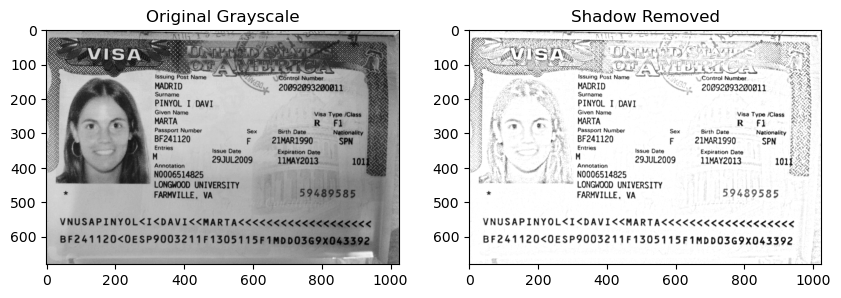

Extracted Text after Shadow Removal:
 Issuing Post Name

Control Number

MADRID So... “20992993200011
Surname 7
 PINYOL I DAVI
bs Given Name Visa Type /Class
“MARTA R
wt Passport Number Sex Birth Date Nationality
. wo) BF241120 F _21MAR1990 SPN
By o0 Entries Issue Date Expiration Date
4) fie M 29JUL2009 —«-L1MAY2013 101}
LG j oft | j : 4 Annotation §
“co 8 "E nonesi4g25
lee “= LONGWOOD UNIVERSITY
. FARMVILLE, VA 59489585

VNUSAPINYOL<I<DAVI<<MARTA<X<<<<<<KKeeeéee<ee0<0<0<¢
BF241120<0ESP9003211F1305115F 1MDD03G9X043392



In [7]:

# Estimate Background Using Morphological Closing
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15)) 
background = cv2.medianBlur(gray, 21)  # Using Median Blur for a more stable background estimation

# Check if background is computed successfully
if background is None or background.shape != gray.shape:
    raise ValueError("Background estimation failed. Check kernel size or input image.")

#4.Subtract Background from Image (Shadow Removal)
shadow_free = cv2.divide(gray, background, scale=255)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale")

plt.subplot(1, 2, 2)
plt.imshow(shadow_free, cmap='gray')
plt.title("Shadow Removed")
plt.show()
# Extract Text Using Tesseract OCR
text_shadow_removed = pytesseract.image_to_string(shadow_free)

print("Extracted Text after Shadow Removal:\n", text_shadow_removed)

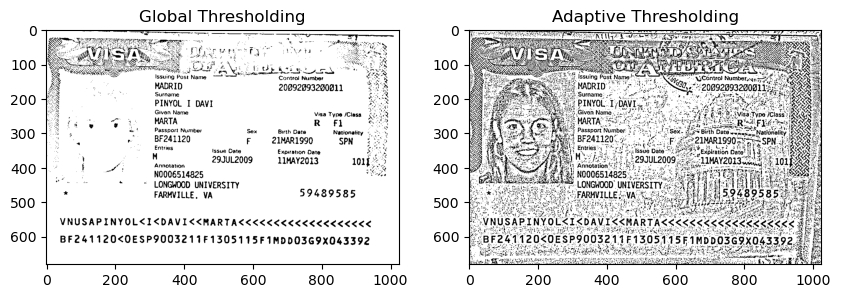

In [8]:
# 5.Apply Global Thresholding 
_, binary_global = cv2.threshold(shadow_free, 150, 255, cv2.THRESH_BINARY)

# Apply Adaptive Thresholding
binary_adaptive = cv2.adaptiveThreshold(shadow_free, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, blockSize=11, C=2)

# Show results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_global, cmap='gray')
plt.title("Global Thresholding")

plt.subplot(1, 2, 2)
plt.imshow(binary_adaptive, cmap='gray')
plt.title("Adaptive Thresholding")

plt.show()



In [9]:
# Extract Text Using Tesseract for Global Thresholded Image
text_global = pytesseract.image_to_string(binary_global)
print("Extracted Text after Global Thresholding:\n", text_global)

# Extract Text Using Tesseract for Adaptive Thresholded Image
text_adaptive = pytesseract.image_to_string(binary_adaptive)
print("Extracted Text after Adaptive Thresholding:\n", text_adaptive)

Extracted Text after Global Thresholding:
 2 Roe a ee

: ee AE
Issuing Post Name

Control Number
MADRID 20892293200011
Surname
PINYOL I DAVI
Given Name Visa Type /Class
“>. MARTA R
° ro Passport Number Sex Birth Date Nationality
~ BF241120 F 21MAR1990 SPN
Entries tssue Date Expiration Date
’ M 29JUL2009 LIMAY2013 101
i “ : Annotation
: ” N0006514825
Ss . ~ LONGWOOD UNIVERSITY
* FARMVILLE, VA 59489585

VNUSAPINYOL<I<DAVI<<MARTA<K<<<Kddé eed e eee Kee
BF241120<0ESP9003211F1305115F1IMDD03G9X043392

Extracted Text after Adaptive Thresholding:
 + Passport ‘Number

BF2411




In [10]:
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated


In [12]:
pip install imutils


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


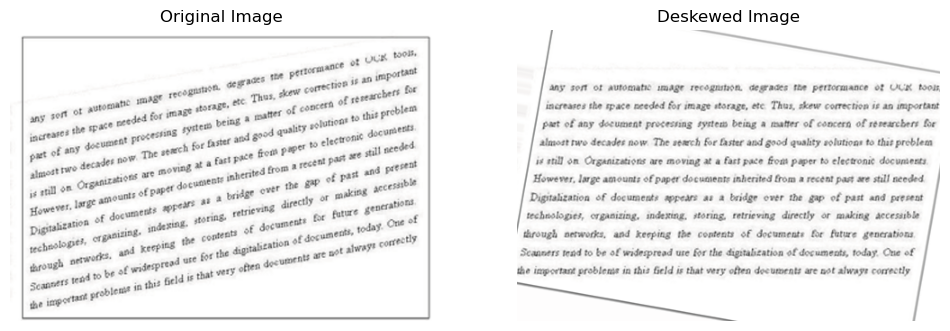

In [13]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
# Load the image
image_path = r"C:\Users\manee\Desktop\Infosys springboard certificates\Deskew input image.png"
image = cv2.imread(image_path)
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply edge detection (Canny)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
# Detect lines using Hough Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=5)
# Calculate the average angle of detected lines
angles = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    angle = math.atan2(y2 - y1, x2 - x1) * 180 / np.pi
    angles.append(angle)
# Compute the median angle
median_angle = np.median(angles)
# Rotate the image to correct skew
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, median_angle, 1.0)
deskewed = cv2.warpAffine(image, rotation_matrix, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
# Display the original and deskewed images in Jupyter Notebook
plt.figure(figsize=(12, 6))
# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
# Deskewed Image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(deskewed, cv2.COLOR_BGR2RGB))
plt.title("Deskewed Image")
plt.axis("off")
plt.show()


In [14]:

import pytesseract

# Convert deskewed image to grayscale
gray_deskewed = cv2.cvtColor(deskewed, cv2.COLOR_BGR2GRAY)

# Apply thresholding for better OCR results
_, binary = cv2.threshold(gray_deskewed, 150, 255, cv2.THRESH_BINARY)

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
extracted_text = pytesseract.image_to_string(binary, lang="eng")

# Display extracted text
print("Extracted Text from Deskewed Image:\n")
print(extracted_text)


Extracted Text from Deskewed Image:

rae? fhe pertmame ot 1

atrgerg Ha tase crede$ 8 amaage atsrage, eh Thay

pact op any Boca Loon Lipveten fa

i

as decader wee The uke

Ae er att g proton

” foe i oh anteede

EARS are mening Ma Farr ace Bont paper

papet sf -ousiente ome A revens pat wee anil nembe

fF cegusicateen ot dcancente wpcar an a lunlge over the gab ob past and puter

fing, eeterersng ertty at tsabiie arvecerhie

ft vaptents of Secumensy tr tia generate nt

eh netwsebs, and Ferg ies

sunees fend to be AE wadesptcod vie Rt che eg et

rg etaen peoLonst 5 tes GDF 8 Rat ey often Seo ataeat ate et alias Caney

a



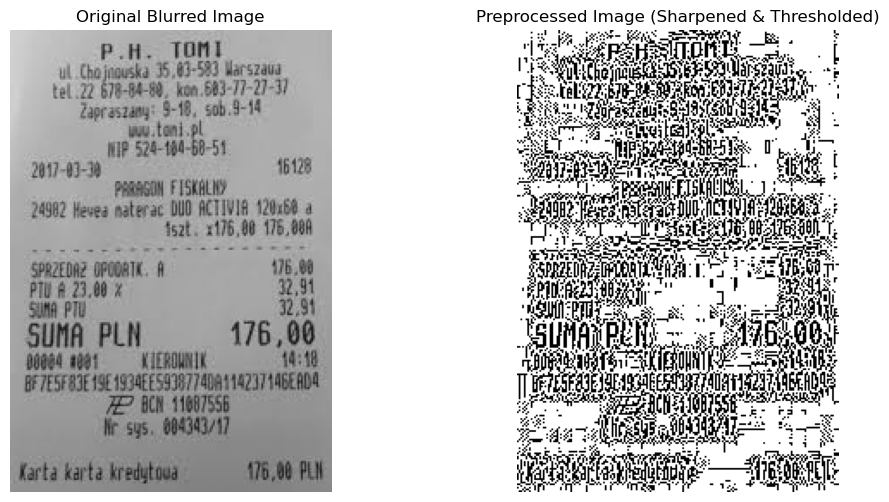

In [15]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\manee\Desktop\Infosys springboard certificates\Blurred image.jpeg"
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply sharpening kernel to enhance text
kernel = np.array([[0, -1, 0], 
                   [-1, 5, -1], 
                   [0, -1, 0]])
sharpened = cv2.filter2D(gray, -1, kernel)

# Apply Gaussian Blur removal (deblurring)
deblurred = cv2.GaussianBlur(sharpened, (1, 1), 0)

# Apply Adaptive Thresholding for better contrast
binary = cv2.adaptiveThreshold(deblurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Extract text using Tesseract OCR
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
extracted_text = pytesseract.image_to_string(binary, lang="eng")

# Display the Original and Processed Image
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Blurred Image")
plt.axis("off")

# Processed Image
plt.subplot(1, 2, 2)
plt.imshow(binary, cmap="gray")
plt.title("Preprocessed Image (Sharpened & Thresholded)")
plt.axis("off")

plt.show()



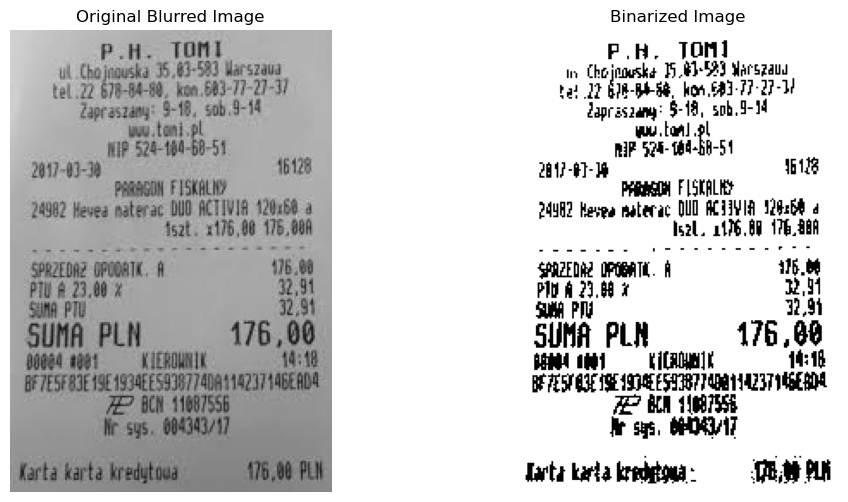

Extracted Text:

Pon. TOM!
wy Geen AS sz
1 POE, tos a2)
Dias 88 th
i
ae ae
rae FKL
As Horses AHIR OA
va 208.8 a

‘eu WaT A ae

WAT Be

Sau a

SUMA PLN 176,80

feat as ica “ts

SOME SES a TE
ERO NOISE

Ieee, OT
Arta arta beedetona-

Ou




In [16]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\manee\Desktop\Infosys springboard certificates\Blurred image.jpeg"
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Otsu's Binarization
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Extract text using Tesseract OCR
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
extracted_text = pytesseract.image_to_string(binary, lang="eng")

# Display the Original and Processed Image
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Blurred Image")
plt.axis("off")

# Processed Image (Binarized)
plt.subplot(1, 2, 2)
plt.imshow(binary, cmap="gray")
plt.title("Binarized Image")
plt.axis("off")

plt.show()

# Print extracted text
print("Extracted Text:\n")
print(extracted_text)


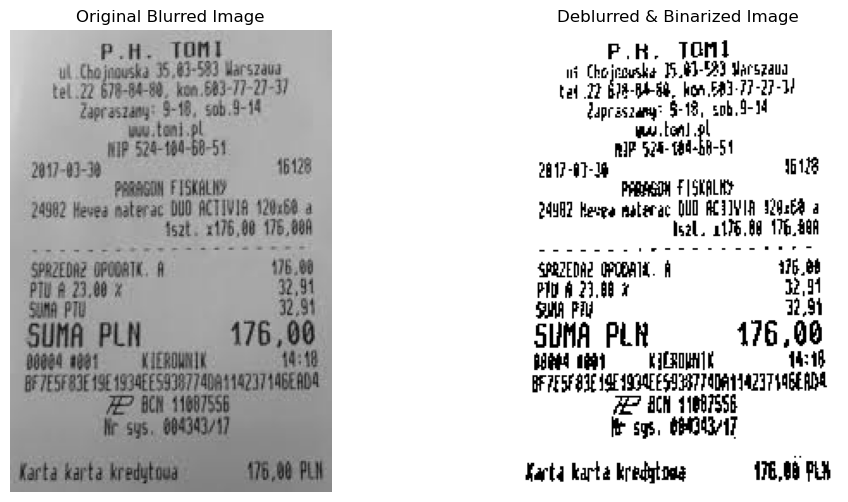

Extracted Text:

PR. Tom!

v: ean pS saa

BR Cee nr Eg
Treg 8

st
ave N88
Pra HLA
24 Hee mrs DH
al 6.68

‘ote waa A
POAT
SP
SUMA PLR
Gated enh GCL
SL EG TSE
2 AH NRSSE
fe sys, OT

Karta karte kredytng = 176,00 FU




In [17]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\manee\Desktop\Infosys springboard certificates\Blurred image.jpeg"
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Unsharp Masking to remove blurriness
gaussian = cv2.GaussianBlur(gray, (9, 9), 10.0)  # Blur the image
unsharp = cv2.addWeighted(gray, 1.5, gaussian, -0.5, 0)  # Enhance edges

# Apply Otsu's Binarization
_, binary = cv2.threshold(unsharp, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Extract text using Tesseract OCR
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
extracted_text = pytesseract.image_to_string(binary, lang="eng")

# Display Original and Processed Image
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Blurred Image")
plt.axis("off")

# Processed Image
plt.subplot(1, 2, 2)
plt.imshow(binary, cmap="gray")
plt.title("Deblurred & Binarized Image")
plt.axis("off")

plt.show()

# Print extracted text
print("Extracted Text:\n")
print(extracted_text)


In [18]:
import cv2
import numpy as np
import pytesseract

# Load the image
image_path = r"C:\Users\manee\Desktop\Infosys springboard certificates\Curved image input.jpg"
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to enhance text
binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Detect edges using Canny
edges = cv2.Canny(binary, 50, 150, apertureSize=3)

# Detect lines using Hough Transform
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=50, maxLineGap=5)

# Calculate the average angle of detected lines
angles = []
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi
        angles.append(angle)

# Get median angle for better correction
if angles:
    median_angle = np.median(angles)
else:
    median_angle = 0  # No lines detected, assume no rotation needed

# Rotate image to correct skew
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, median_angle, 1.0)
straightened = cv2.warpAffine(image, rotation_matrix, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

# Extract text from straightened image
extracted_text = pytesseract.image_to_string(cv2.cvtColor(straightened, cv2.COLOR_BGR2GRAY), lang="eng")

# Save output
cv2.imwrite("/mnt/data/straightened_image.jpg", straightened)

# Show the extracted text
print("Extracted Text:\n", extracted_text)


Extracted Text:
 i or king bye corrective actions If j
ntrol, it may difficult to achieve the proj 4 Project gets too far out of
the SCOP budget, schedule, or quality Ject objective without sacrificing
ughout a project, some activities will be ¢
be finist ned ahead of schedule, and others will fae ier eS

actual rogress—whether fi slowe be finished later than scheduled,
P aster or slower than planned—will have an effect on

hedule of the remaining, unc : Bev
eel Sas nes Bt ok conse a be mid of 4 project. Specifically,
gart and earliest finish times for the remaining acthvieher pitta the saniem
swell as the to eae in the network diagram,
Throughout a project, changes may occur that have an impact on the
_ These changes might be initiated by the customer or the project team,
or they might be the result of an unanticipated occurrence. Any type of
hether initiated by the customer, the contractor, the project man-
ager, a team member, or an unanticipated event—will require a modification to

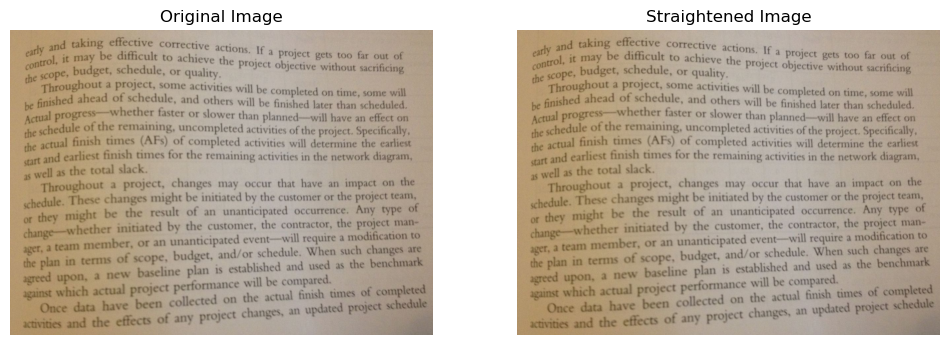

Extracted Text:
 i or king bye corrective actions If j
ntrol, it may difficult to achieve the proj 4 Project gets too far out of
the SCOP budget, schedule, or quality Ject objective without sacrificing
ughout a project, some activities will be ¢
be finist ned ahead of schedule, and others will fae ier eS

actual rogress—whether fi slowe be finished later than scheduled,
P aster or slower than planned—will have an effect on

hedule of the remaining, unc : Bev
eel Sas nes Bt ok conse a be mid of 4 project. Specifically,
gart and earliest finish times for the remaining acthvieher pitta the saniem
swell as the to eae in the network diagram,
Throughout a project, changes may occur that have an impact on the
_ These changes might be initiated by the customer or the project team,
or they might be the result of an unanticipated occurrence. Any type of
hether initiated by the customer, the contractor, the project man-
ager, a team member, or an unanticipated event—will require a modification to

In [19]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\manee\Desktop\Infosys springboard certificates\Curved image input.jpg"
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to enhance text
binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Detect edges using Canny
edges = cv2.Canny(binary, 50, 150, apertureSize=3)

# Detect lines using Hough Transform
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=50, maxLineGap=5)

# Calculate the average angle of detected lines
angles = []
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi
        angles.append(angle)

# Get median angle for better correction
median_angle = np.median(angles) if angles else 0

# Rotate image to correct skew
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, median_angle, 1.0)
straightened = cv2.warpAffine(image, rotation_matrix, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

# Display the original and corrected images side by side
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Straightened Image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(straightened, cv2.COLOR_BGR2RGB))
plt.title("Straightened Image")
plt.axis("off")

plt.show()
# Extract text from straightened image
extracted_text = pytesseract.image_to_string(cv2.cvtColor(straightened, cv2.COLOR_BGR2GRAY), lang="eng")
# Show the extracted text
print("Extracted Text:\n", extracted_text)


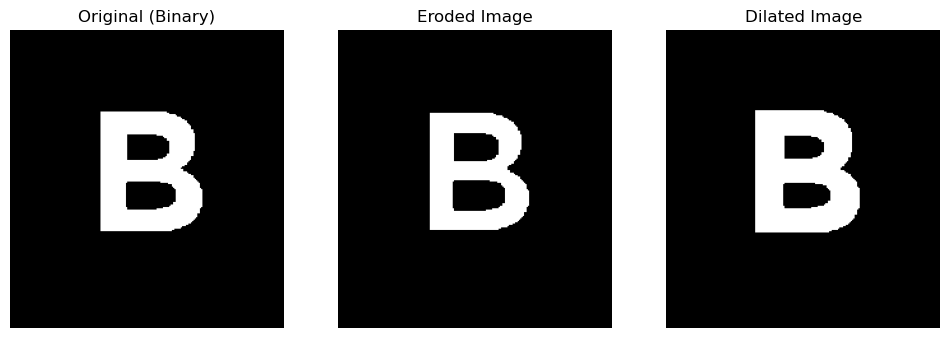

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the text image in grayscale
image_path =r"C:\Users\manee\Desktop\Infosys springboard certificates\alphabet B.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply binary thresholding to convert to black & white
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Define a kernel (structuring element) for morphological operations
kernel = np.ones((3, 3), np.uint8)  # 3x3 kernel

# Apply Erosion (removes noise, shrinks text)
eroded = cv2.erode(binary, kernel, iterations=1)

# Apply Dilation (expands text, fills gaps)
dilated = cv2.dilate(binary, kernel, iterations=1)

# Display original, eroded, and dilated images side by side
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(binary, cmap='gray')
plt.title("Original (Binary)")
plt.axis("off")

# Eroded Image
plt.subplot(1, 3, 2)
plt.imshow(eroded, cmap='gray')
plt.title("Eroded Image")
plt.axis("off")

# Dilated Image
plt.subplot(1, 3, 3)
plt.imshow(dilated, cmap='gray')
plt.title("Dilated Image")
plt.axis("off")

plt.show()


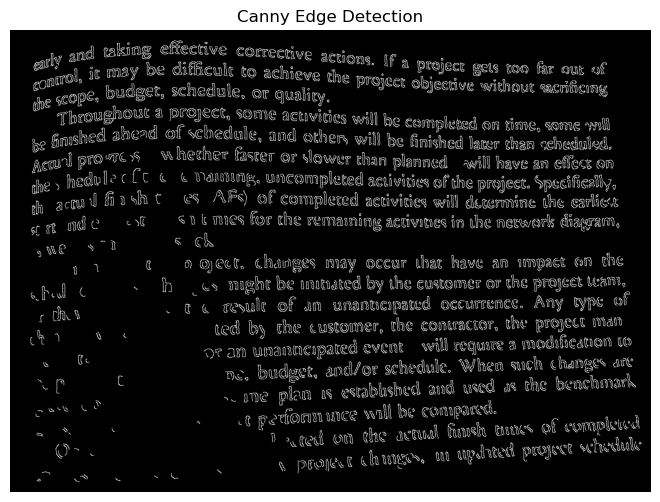

In [22]:
import cv2
import matplotlib.pyplot as plt

# Load image
image = cv2.imread(r"C:\Users\manee\Desktop\Infosys springboard certificates\Curved image input.jpg", cv2.IMREAD_GRAYSCALE)

if image is not None:
    edges = cv2.Canny(image, 100, 200)

    # Display using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(edges, cmap="gray")
    plt.title("Canny Edge Detection")
    plt.axis("off")
    plt.show()


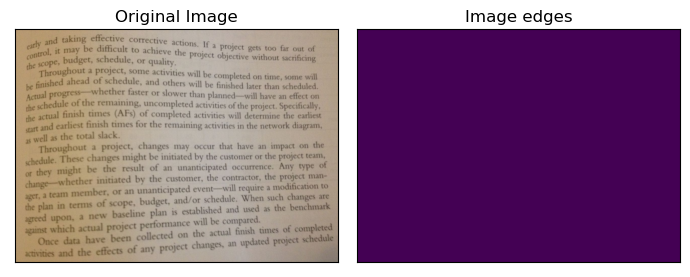

In [23]:
# Import the necessary Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
# Read image from disk.
img = cv2.imread(r"C:\Users\manee\Desktop\Infosys springboard certificates\Curved image input.jpg")
# Convert BGR image to RGB
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Apply Canny edge detection
edges = cv2.Canny(image= image_rgb, threshold1=100, threshold2=700)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the blurred image
axs[1].imshow(edges)
axs[1].set_title('Image edges')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()

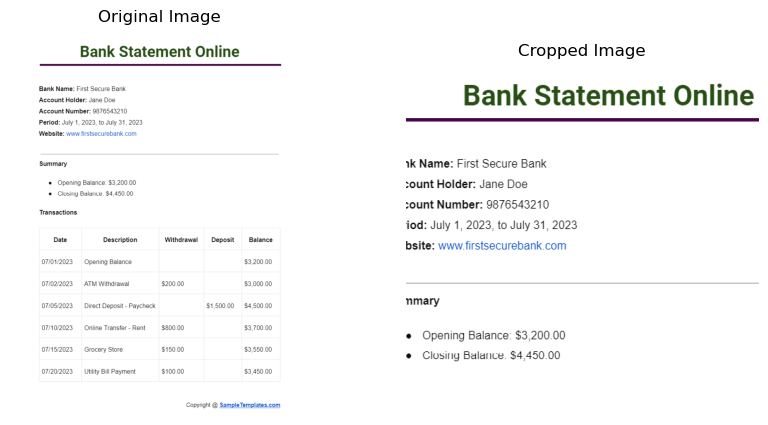

In [24]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\manee\Desktop\Infosys springboard certificates\Bank-Statement-Online.png")

# Define cropping coordinates (x, y, width, height)
x, y, w, h = 100, 10, 500, 450 
# Crop the image using slicing
cropped = image[y:y+h, x:x+w]

# Convert images to RGB for displaying in Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)

# Display original and cropped images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cropped_rgb)
plt.title("Cropped Image")
plt.axis("off")

plt.show()



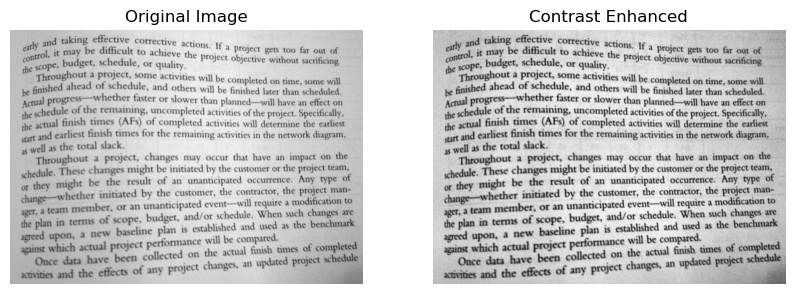

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread(r"C:\Users\manee\Desktop\Infosys springboard certificates\Curved image input.jpg", cv2.IMREAD_GRAYSCALE)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(image)

# Display the original and enhanced images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title("Original Image"), plt.axis("off")
plt.subplot(1,2,2), plt.imshow(enhanced, cmap='gray'), plt.title("Contrast Enhanced"), plt.axis("off")
plt.show()


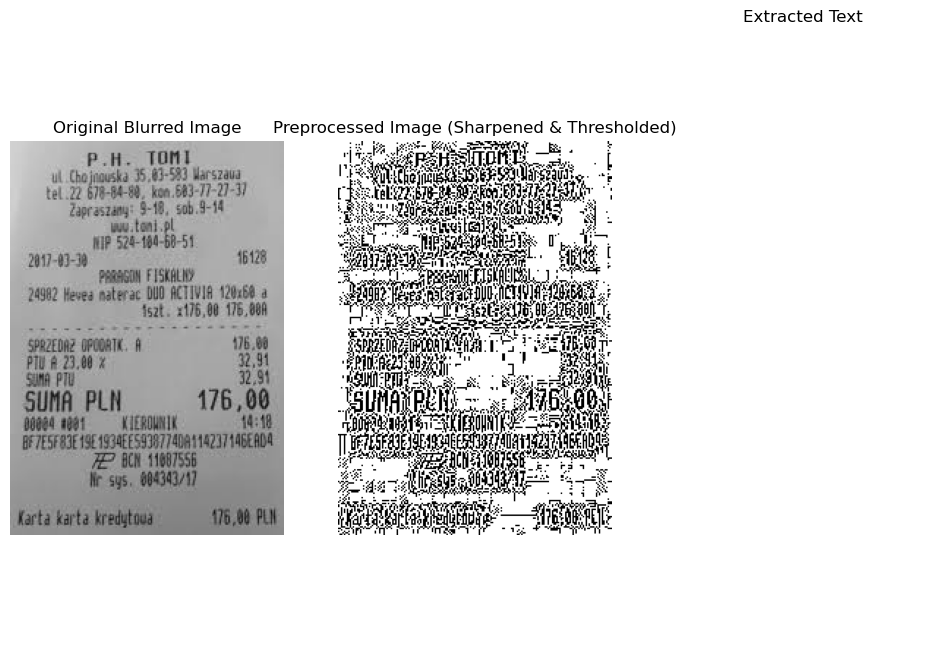

In [26]:

import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\manee\Desktop\Infosys springboard certificates\Blurred image.jpeg"
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply sharpening kernel to enhance text
kernel = np.array([[0, -1, 0], 
                   [-1, 5, -1], 
                   [0, -1, 0]])
sharpened = cv2.filter2D(gray, -1, kernel)

# Apply Gaussian Blur removal (deblurring)
deblurred = cv2.GaussianBlur(sharpened, (1, 1), 0)

# Apply Adaptive Thresholding for better contrast
binary = cv2.adaptiveThreshold(deblurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Extract text using Tesseract OCR
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
extracted_text = pytesseract.image_to_string(binary, lang="eng")

# Display the Original, Processed Image, and Extracted Text
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Blurred Image")
plt.axis("off")

# Processed Image
plt.subplot(1, 3, 2)
plt.imshow(binary, cmap="gray")
plt.title("Preprocessed Image (Sharpened & Thresholded)")
plt.axis("off")

# Display extracted text
plt.subplot(1, 3, 3)
plt.text(0.1, 0.5, extracted_text, fontsize=12, wrap=True, verticalalignment='center', horizontalalignment='left')
plt.title("Extracted Text")
plt.axis("off")

plt.show()

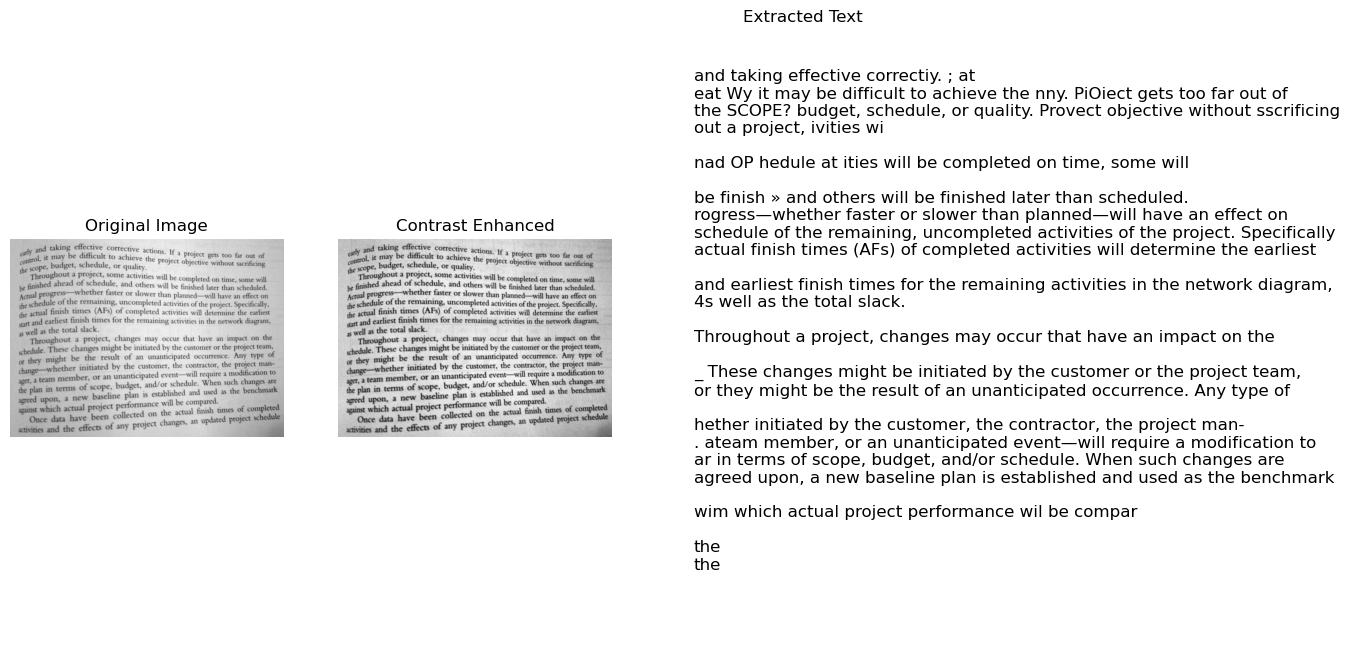

In [27]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread(r"C:\Users\manee\Desktop\Infosys springboard certificates\Curved image input.jpg", cv2.IMREAD_GRAYSCALE)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(image)

# Extract text using Tesseract OCR
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
extracted_text = pytesseract.image_to_string(enhanced, lang="eng")

# Display the Original, Enhanced Image, and Extracted Text
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Enhanced Image
plt.subplot(1, 3, 2)
plt.imshow(enhanced, cmap='gray')
plt.title("Contrast Enhanced")
plt.axis("off")

# Display extracted text
plt.subplot(1, 3, 3)
plt.text(0.1, 0.5, extracted_text, fontsize=12, wrap=True, verticalalignment='center', horizontalalignment='left')
plt.title("Extracted Text")
plt.axis("off")

plt.show()


# EXTRACT TEXT FROM PDF


In [64]:
from pdf2image import convert_from_path
import pytesseract
from PIL import Image
import os

# Set Poppler path for Windows users (Change this path to where you installed Poppler)
poppler_path = r"C:\Users\manee\Desktop\Infosys springboard certificates\poppler-24.08.0\Library\bin"
if os.name == "nt":
    os.environ["PATH"] += os.pathsep + poppler_path

# Path to your PDF
pdf_path = r"C:\Users\manee\Desktop\Infosys springboard certificates\bank statement.pdf"

# Convert PDF pages to images
images = convert_from_path(pdf_path)

# Extract text from each image using OCR
extracted_text = ""
for i, img in enumerate(images):
    text = pytesseract.image_to_string(img, lang="eng")  # Change language if needed
    extracted_text += f"Page {i+1}:\n{text}\n\n"

# Save the extracted text to a file
output_text_path = r"C:\Users\manee\Desktop\Infosys springboard certificates\pdf_image_extracted_text.txt"
with open(output_text_path, "w", encoding="utf-8") as f:
    f.write(extracted_text)

print("OCR extraction completed. Text saved to:", output_text_path)

OCR extraction completed. Text saved to: C:\Users\manee\Desktop\Infosys springboard certificates\pdf_image_extracted_text.txt


# Multiple Language

In [34]:
!pip install easyocr


Defaulting to user installation because normal site-packages is not writeable


In [37]:
import easyocr

# Initialize EasyOCR reader for Hindi ('hi')
reader = easyocr.Reader(['hi'])

# Path to the uploaded image
image_path = r"C:\Users\manee\Desktop\Infosys springboard certificates\hindi.jpeg"

# Perform OCR
result = reader.readtext(image_path, detail=0)  # detail=0 to return only text

# Print extracted text
print("\n".join(result))


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Completeचिन क्रिकेट के महान
खिलाड़ी हैं| इसमें शायद
ही किंसी खेल प्रेमो को संदेह
हो॰ लेकिन यही खेल प्रेमी
उनका कुछ समय के लिए भी
खराब फॉर्म बर्दाश्त नहों कर
पाते है
=७ट
डटआफ़ट


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


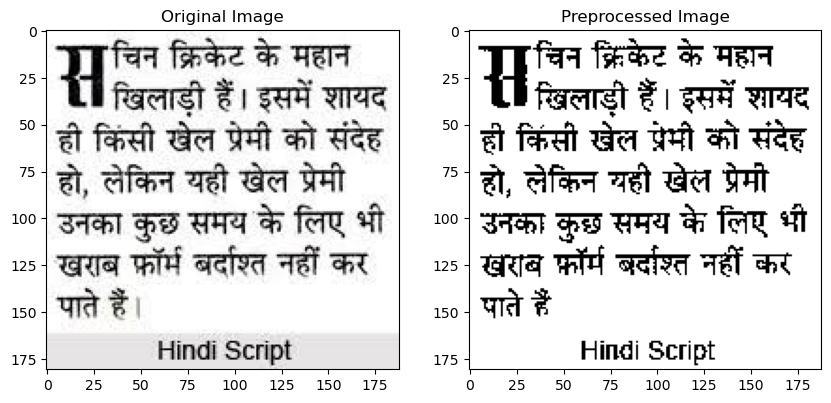

Extracted Hindi Text:
 चिन क्रिकेट के महान
खिलाड़ी हेॅ| इसमें शायद
ही किंसी खेल प्रेमी को संदेह
हो॰ लेकिन यही खेल प्रेमी
उनकः कुछ समय के लिए भी
खराब फॉ्मं बर्दाश्त नहीं कर
पाते ई
दघ डटग़-


In [41]:
import cv2
import easyocr
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path =  r"C:\Users\manee\Desktop\Infosys springboard certificates\hindi.jpeg"
image = cv2.imread(image_path)

# Convert to grayscale
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to remove noise
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


# Initialize EasyOCR Reader for Hindi ('hi')
reader = easyocr.Reader(['hi'])

# Perform OCR
result = reader.readtext(thresh, detail=0)
# Show images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
plt.subplot(1,2,2), plt.imshow(thresh, cmap="gray"), plt.title("Preprocessed Image")
plt.show()

# Print the extracted text
extracted_text = "\n".join(result)
print("Extracted Hindi Text:\n", extracted_text)



# POST PREPROCESSING

In [21]:
#tring replacement or regular expression to remove unwanted text in the end.


import re

text = """चिन क्रिकेट के महान
खिलाड़ी हेॅ| इसमें शायद
ही किंसी खेल प्रेमी को संदेह
हो॰ लेकिन यही खेल प्रेमी
उनकः कुछ समय के लिए भी
खराब फॉ्मं बर्दाश्त नहीं कर
पाते ई
दघ डटग़-"""

# Remove unwanted text at the end
clean_text = re.sub(r"दघ डटग़-.*", "", text).strip()

print(clean_text)


चिन क्रिकेट के महान
खिलाड़ी हेॅ| इसमें शायद
ही किंसी खेल प्रेमी को संदेह
हो॰ लेकिन यही खेल प्रेमी
उनकः कुछ समय के लिए भी
खराब फॉ्मं बर्दाश्त नहीं कर
पाते ई


In [22]:
#Fix Misspellings (हेॅ| → हैं|, ई → है etc.)
corrections = {
    "हेॅ|": "हैं|",
    "ई": "है",
    "फॉ्मं": "फॉर्म"
}

for wrong, correct in corrections.items():
    clean_text = clean_text.replace(wrong, correct)

print(clean_text)


चिन क्रिकेट के महान
खिलाड़ी हैं| इसमें शायद
ही किंसी खेल प्रेमी को संदेह
हो॰ लेकिन यही खेल प्रेमी
उनकः कुछ समय के लिए भी
खराब फॉर्म बर्दाश्त नहीं कर
पाते है


In [23]:
text = "चिन क्रिकेट के महान खिलाड़ी हेॅ| ..."  # Example OCR output

# Dictionary of common OCR errors
corrections = {
    "चिन": "सचिन",  # Fix missing 'स'
    "हेॅ|": "हैं|",
    "ई": "है",
    "फॉ्मं": "फॉर्म"
}

# Apply corrections
for wrong, correct in corrections.items():
    text = text.replace(wrong, correct)

print(text)


सचिन क्रिकेट के महान खिलाड़ी हैं| ...


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Extracted Hindi Text:
 महान
ख़िलाडईं॰ इसमः
हीं क़िसी खेलप्रेमी
होसलेकिज़ यहा ख़ल
राव -
+||6|=
ह
=टः ण[ड़]
को संदेई


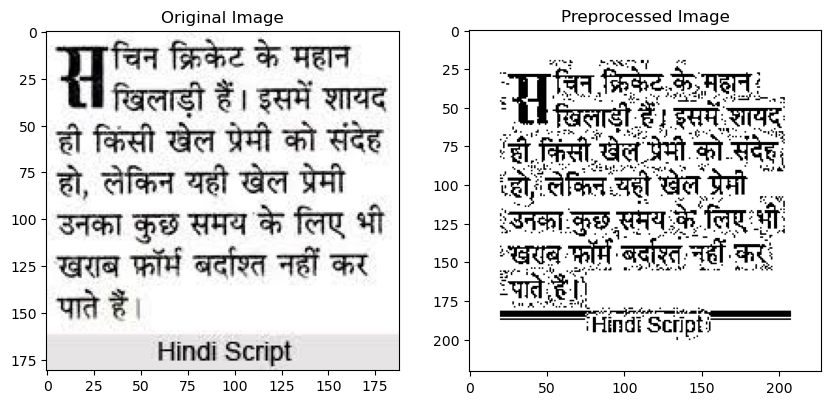

In [44]:
import cv2
import easyocr
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = "hindi.jpeg"
image = cv2.imread(image_path)

if image is None:
    print("Error: Unable to load image. Check the file path!")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding for better text contrast
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 11, 2)

    # Add padding to ensure full text extraction
    pad_size = 20
    padded_image = cv2.copyMakeBorder(thresh, pad_size, pad_size, pad_size, pad_size, 
                                      cv2.BORDER_CONSTANT, value=[255])

    # Save preprocessed image for debugging (optional)
    cv2.imwrite("preprocessed_hindi.jpeg", padded_image)

    # Initialize EasyOCR Reader for Hindi
    reader = easyocr.Reader(['hi'])

    # Perform OCR with adjusted parameters
    result = reader.readtext(padded_image, detail=0, width_ths=0.9, text_threshold=0.7)

    # Print the extracted text
    extracted_text = "\n".join(result)
    print("Extracted Hindi Text:\n", extracted_text)

    # Show original and preprocessed images
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
    plt.subplot(1,2,2), plt.imshow(padded_image, cmap="gray"), plt.title("Preprocessed Image")
    plt.show()


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Extracted Text:
 महान
ख़िलाडईं॰ इसमः
हीं क़िसी खेलप्रेमी
होसलेकिज़ यहा ख़ल
राव -
+||6|=
ह
Finclt SCr]
को संदेई


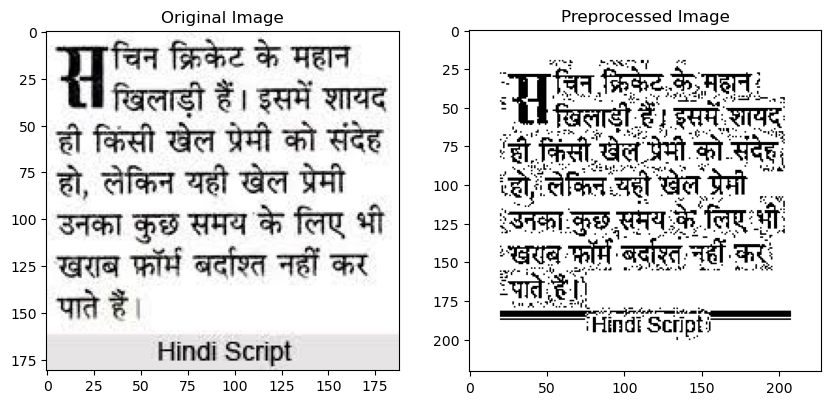

In [47]:
import cv2
import easyocr
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = "hindi.jpeg"  # Update the filename
image = cv2.imread(image_path)

if image is None:
    print("Error: Unable to load image. Check the file path!")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding (better for different fonts)
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 11, 2)

    # Add padding to prevent text cut-off
    pad_size = 20
    padded_image = cv2.copyMakeBorder(thresh, pad_size, pad_size, pad_size, pad_size, 
                                      cv2.BORDER_CONSTANT, value=[255])

    # Save the preprocessed image
    cv2.imwrite("preprocessed_image.jpeg", padded_image)

    # Use only compatible languages
    reader = easyocr.Reader(['hi', 'en'])  # Use ['ta', 'en'] for Tamil, ['te', 'en'] for Telugu, etc.

    # Perform OCR
    result = reader.readtext(padded_image, detail=0, width_ths=0.9, text_threshold=0.7)

    # Print extracted text
    extracted_text = "\n".join(result)
    print("Extracted Text:\n", extracted_text)

    # Show original and preprocessed images
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
    plt.subplot(1,2,2), plt.imshow(padded_image, cmap="gray"), plt.title("Preprocessed Image")
    plt.show()


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Extracted Text:
 नन िथट ज महान सिलाों ्हे|हरामं ग़ागद जञं ऋिना गल शनाज्ा रंदर हा, लिन रःों २१७ ऐगा रनका फुर रम 7 *ः १लए  रागच फाण रदानह =i यर १०ा | Iiilb Sl- |


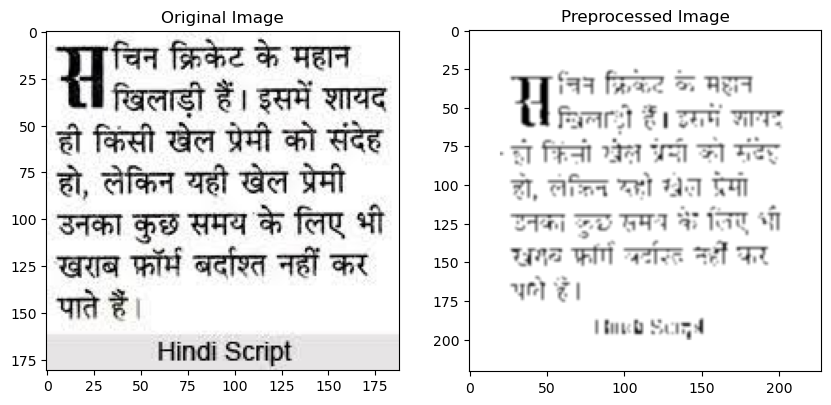

In [48]:
import cv2
import easyocr
import numpy as np
from matplotlib import pyplot as plt

# Load image
image_path = "hindi.jpeg"  # Update file path
image = cv2.imread(image_path)

if image is None:
    print("Error: Unable to load image. Check the file path!")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply morphological transformations to reduce noise
    kernel = np.ones((2,2), np.uint8)
    gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

    # Apply adaptive thresholding for better OCR
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 15, 8)

    # Dilate to make characters thicker
    dilated = cv2.dilate(thresh, kernel, iterations=1)

    # Apply slight blurring to remove small dots
    blurred = cv2.GaussianBlur(dilated, (3,3), 0)

    # Add border padding to prevent cut-off
    pad_size = 20
    padded_image = cv2.copyMakeBorder(blurred, pad_size, pad_size, pad_size, pad_size, 
                                      cv2.BORDER_CONSTANT, value=[255])

    # Save preprocessed image for debugging
    cv2.imwrite("preprocessed_image.jpeg", padded_image)

    # Use only supported language pairs (choose one)
    reader = easyocr.Reader(['hi', 'en'])  # Use ['ta', 'en'] for Tamil, ['te', 'en'] for Telugu

    # Perform OCR with optimized parameters
    result = reader.readtext(padded_image, detail=0, width_ths=0.7, text_threshold=0.6, paragraph=True)

    # Print extracted text
    extracted_text = "\n".join(result)
    print("Extracted Text:\n", extracted_text)

    # Show images
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
    plt.subplot(1,2,2), plt.imshow(padded_image, cmap="gray"), plt.title("Preprocessed Image")
    plt.show()


# Web Scrapping

In [2]:
pip install BeautifulSoup

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [7 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\manee\AppData\Local\Temp\pip-install-76mlt8go\beautifulsoup_6f6dc58f455641c2854634d29581af3d\setup.py", line 3
      "You're trying to run a very old release of Beautiful Soup under Python 3. This will not work."<>"Please use Beautiful Soup 4, available through the pip package 'beautifulsoup4'."
                                                                                                     ^
  SyntaxError: invalid syntax
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not p

# PayPal

In [1]:
pip install BeautifulSoup
from  bs4 import BeautifulSoup
import requests

In [8]:
url="https://www.paypal.com/in/home"
page =requests.get(url)
page


<Response [200]>

In [9]:
soup= BeautifulSoup(page.text,'html')
print(soup.get_text())











PayPal Account | Mobile Wallet and More | PayPal IN























































PayPal logoPersonalPayPal for YouShop and Buy Shop with PayPalHow PayPal WorksGet the AppPayPal Buyer ProtectionSmall BusinessPayPal for BusinessAccept PaymentsOnline CheckoutInvoicingMake PaymentsBusiness Operations Risk ManagementAccelerate GrowthStreamline OperationBusiness Resource CentreIdentify Verification ( KYC)Get StartedFeesEnterprisePayPal for EnterprisePayments Marketplaces & PartnersPlatforms & SolutionsAccept PayPalMake PaymentsRisks & Operations Manage RiskAccelerate GrowthStreamline OperationPartnersPartner With UsPartner DirectoryUseful InfoResources Online SecurityFraud PreventionPhishingPCI ComplianceForeign Inward Remittance Advise (FIRA)Help CentreSign UpLog InSign UpThe PayPal App
Pay easy, fast,
and secure.
Get the AppPersonalBusinessYour way to pay, with PayPal
Checkout with a few clicks
 Confidently send payments
 Create a PayPal.Me payment link


In [4]:
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>
<html dir="ltr" lang="en-IN">
<head><script async="" src="https://www.paypalobjects.com/webcaptcha/ngrlCaptcha.min.js"></script>
<link crossorigin="" href="https://www.gstatic.com" rel="preconnect"/>
<link href="https://www.gstatic.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://www.paypalobjects.com" rel="preconnect"/>
<link href="https://www.paypalobjects.com" rel="dns-prefetch"/>
<link href="https://www.google-analytics.com" rel="dns-prefetch"/>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="#012169" name="theme-color"/>
<title>PayPal Account | Mobile Wallet and More | PayPal IN</title>
<link as="image" fetchpriority="high" href="https://www.paypalobjects.com/marketing/web23/in/ql/homepage-consumer/updated_hero/mobile-thumbnail-updated.png?quality=50" rel="preload"/>
<link fetchpriority="high" href="https://www.paypalobjects.com/marketing/pp-com-

In [5]:
res=soup.title
print(res.prettify())

<title>
 PayPal Account | Mobile Wallet and More | PayPal IN
</title>



# APPLE

In [18]:
import requests
from bs4 import BeautifulSoup

url = "https://site.financialmodelingprep.com/financial-statements/AAPL"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

soup = BeautifulSoup(response.text, "html.parser")

# Extract relevant data (adjust selectors based on the website structure)
tables = soup.find_all("table")  # Finding all tables
for table in tables:
    print(table.text)  # Print table content


In [19]:
import requests

api_key = "YiLw9lbmuycBaWGUMuebKELOBrePQBIg"  
url = f"https://financialmodelingprep.com/api/v3/income-statement/AAPL?apikey={api_key}"

response = requests.get(url)
data = response.json()

# Print the first financial statement (latest year)
print(data[0])


{'date': '2024-09-28', 'symbol': 'AAPL', 'reportedCurrency': 'USD', 'cik': '0000320193', 'fillingDate': '2024-11-01', 'acceptedDate': '2024-11-01 06:01:36', 'calendarYear': '2024', 'period': 'FY', 'revenue': 391035000000, 'costOfRevenue': 210352000000, 'grossProfit': 180683000000, 'grossProfitRatio': 0.4620634982, 'researchAndDevelopmentExpenses': 31370000000, 'generalAndAdministrativeExpenses': 0, 'sellingAndMarketingExpenses': 0, 'sellingGeneralAndAdministrativeExpenses': 26097000000, 'otherExpenses': 0, 'operatingExpenses': 57467000000, 'costAndExpenses': 267819000000, 'interestIncome': 0, 'interestExpense': 0, 'depreciationAndAmortization': 11445000000, 'ebitda': 134661000000, 'ebitdaratio': 0.3443707085, 'operatingIncome': 123216000000, 'operatingIncomeRatio': 0.3151022287, 'totalOtherIncomeExpensesNet': 269000000, 'incomeBeforeTax': 123485000000, 'incomeBeforeTaxRatio': 0.3157901467, 'incomeTaxExpense': 29749000000, 'netIncome': 93736000000, 'netIncomeRatio': 0.2397125577, 'eps':

# Handling Missing values

# Remove Record

In [50]:
import pandas as pd

# Load the dataset from Excel
df = pd.read_excel("student data.xlsx")
print("original")
print(df)
# Remove rows where 'Science Score' is missing
df_cleaned = df.dropna(subset=['Science Score'])

print("Cleaned data")
# Display the cleaned dataset
print(df_cleaned)


original
  Student Name   Age   Math Score  Science Score
0          Riya    12          90           89.0
1         Rahul    13          87            NaN
2         Arjun    15          88           85.0
Cleaned data
  Student Name   Age   Math Score  Science Score
0          Riya    12          90           89.0
2         Arjun    15          88           85.0


# MEAN,MEDIAN ,MODE imputation


In [27]:
import pandas as pd
import numpy as np
# Load the dataset
file_path = r"C:\Users\manee\Desktop\Infosys springboard certificates\pima_diabetics.csv"
df = pd.read_csv(file_path)

# Replace "<null>" with NaN
df.replace("<null>", np.nan, inplace=True)

# Convert numeric columns to appropriate types
numeric_columns = ["NoOfPregency", "PlasmaGlucoseCon", "BloodPressure", "SkinFoldThickness", 
                   "Insuline", "BMI", "DiabetesPedigree", "Age"]

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

# Apply mean imputation for continuous variables
for col in ["PlasmaGlucoseCon", "BloodPressure", "BMI", "DiabetesPedigree"]:
    df[col].fillna(df[col].mean(), inplace=True)

# Apply median imputation for skewed variables
for col in ["SkinFoldThickness", "Insuline"]:
    df[col].fillna(df[col].median(), inplace=True)

# Apply mode imputation for categorical/discrete numerical variables
for col in ["NoOfPregency", "Age"]:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Save the cleaned dataset
df.to_csv(r"C:\Users\manee\Desktop\Infosys springboard certificates/pima_diabetics_cleaned.csv", index=False)

# Verify if all missing values are handled
print(df.isnull().sum())

NoOfPregency         0
PlasmaGlucoseCon     0
BloodPressure        0
SkinFoldThickness    0
Insuline             0
BMI                  0
DiabetesPedigree     0
Age                  0
Class                0
dtype: int64


C:\Users\manee\AppData\Local\Temp\ipykernel_16472\2957834312.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\manee\AppData\Local\Temp\ipykernel_16472\2957834312.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

# Forward Fill and Backward Fill

In [34]:

import pandas as pd
import numpy as np


# Load dataset from Excel file
df = pd.read_excel("Temp data.xlsx")

# Forward Fill (FWD)
df_ffill = df.copy()
df_ffill["Temperature(Celcius)"] = df_ffill["Temperature(Celcius)"].fillna(method="ffill")
print("Forward Fill:\n", df_ffill)

# Backward Fill (BWD)
df_bfill = df.copy()
df_bfill["Temperature(Celcius)"] = df_bfill["Temperature(Celcius)"].fillna(method="bfill")
print("Backward Fill:\n", df_bfill)



Forward Fill:
        Date    City  Temperature(Celcius)
0 2025-02-01  Delhi                  30.0
1 2025-02-02  Delhi                  30.0
2 2025-02-03  Delhi                  32.0
3 2025-02-04  Delhi                  32.0
4 2025-02-05  Delhi                  34.0
Backward Fill:
        Date    City  Temperature(Celcius)
0 2025-02-01  Delhi                  30.0
1 2025-02-02  Delhi                  32.0
2 2025-02-03  Delhi                  32.0
3 2025-02-04  Delhi                  34.0
4 2025-02-05  Delhi                  34.0


C:\Users\manee\AppData\Local\Temp\ipykernel_16472\2875307775.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill["Temperature(Celcius)"] = df_ffill["Temperature(Celcius)"].fillna(method="ffill")
C:\Users\manee\AppData\Local\Temp\ipykernel_16472\2875307775.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill["Temperature(Celcius)"] = df_bfill["Temperature(Celcius)"].fillna(method="bfill")


# Prediction model imputation

In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
# Create a dataset with missing values
data = {
    "Date": ["01-02-2025", "02-02-2025", "03-02-2025", "04-02-2025", "05-02-2025", "06-02-2025", "07-02-2025"],
    "City": ["Mumbai"] * 7,
    "Humidity (%)": [78, np.nan, 82, np.nan, 85, np.nan, 88]
}

df = pd.DataFrame(data)
# Convert "Date" to datetime format
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")
# Function for prediction-based imputation
def predict_missing_values(df):
    temp_df = df.copy()
    temp_df["Day"] = temp_df["Date"].dt.day  # Convert date to numerical day feature
    known_values = temp_df.dropna(subset=["Humidity (%)"])
    missing_values = temp_df[temp_df["Humidity (%)"].isna()]
    if missing_values.empty:
        return df  # No missing values
    # Train Linear Regression Model
    model = LinearRegression()
    X_train = known_values[["Day"]]
    y_train = known_values["Humidity (%)"]
    model.fit(X_train, y_train)

    # Predict missing values
    X_missing = missing_values[["Day"]]
    predicted_humidity = model.predict(X_missing)

    # Fill missing values with predictions
    temp_df.loc[temp_df["Humidity (%)"].isna(), "Humidity (%)"] = predicted_humidity
    return temp_df
# Apply prediction model for imputation
df_predicted = predict_missing_values(df)
# Display results
print("\nOriginal DataFrame with Missing Values:\n", df)
print("\nPrediction-Based Imputation:\n", df_predicted)



Original DataFrame with Missing Values:
         Date    City  Humidity (%)
0 2025-02-01  Mumbai          78.0
1 2025-02-02  Mumbai           NaN
2 2025-02-03  Mumbai          82.0
3 2025-02-04  Mumbai           NaN
4 2025-02-05  Mumbai          85.0
5 2025-02-06  Mumbai           NaN
6 2025-02-07  Mumbai          88.0

Prediction-Based Imputation:
         Date    City  Humidity (%)  Day
0 2025-02-01  Mumbai         78.00    1
1 2025-02-02  Mumbai         79.95    2
2 2025-02-03  Mumbai         82.00    3
3 2025-02-04  Mumbai         83.25    4
4 2025-02-05  Mumbai         85.00    5
5 2025-02-06  Mumbai         86.55    6
6 2025-02-07  Mumbai         88.00    7


# Assigning unknown category


In [45]:
import pandas as pd

# Sample dataset with missing categorical values
data = {
    "Customer ID": [101, 102, 103, 104, 105, 106],
    "Favorite Product Category": ["Electronics", None, "Clothing", "Groceries", None, "Books"]
}

df = pd.DataFrame(data)

# Replace missing categorical values with 'Unknown'
df["Favorite Product Category"].fillna("Unknown", inplace=True)

# Display updated DataFrame
print(df)


   Customer ID Favorite Product Category
0          101               Electronics
1          102                   Unknown
2          103                  Clothing
3          104                 Groceries
4          105                   Unknown
5          106                     Books


C:\Users\manee\AppData\Local\Temp\ipykernel_16472\3244791028.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Favorite Product Category"].fillna("Unknown", inplace=True)


# Task


 # Visualization

# Balance Sheet

In [76]:
import cv2
import pytesseract
import pandas as pd
import json

# Set path to Tesseract-OCR (change this path based on your installation)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Modify as needed

# Load the image
image_path = r"C:\Users\manee\Desktop\Infosys springboard certificates\Images\Balance sheet\Balance sheet 3.png"
image = cv2.imread(image_path)

# Convert to grayscale for better OCR accuracy
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform OCR on the image
text = pytesseract.image_to_string(gray)

# Save raw extracted text (optional)
with open("balance_sheet_raw.txt", "w") as f:
    f.write(text)

# Print extracted text
print("Extracted Text:\n", text)

# Manually parse the text into structured data
data_dict = {
    "Year": ["2020", "2019"],
    "Total Assets": [323888, 338516],
    "Total Liabilities": [258549, 248028],
    "Total Shareholders' Equity": [65339, 90488],
}

# Convert to DataFrame
df = pd.DataFrame(data_dict)

# Save to CSV
df.to_csv("balance_sheet_data.csv", index=False)

print("Data saved to CSV file.")


Extracted Text:
 Apple Inc.
CONSOLIDATED BALANCE SHEETS
(In millions, except number of shares which are reflected in thousands and par value)

September 26, September 28,
2020 2019
ASSETS:
Current assets:
Cash and cash equivalents $ 38,016 $ 48,844
Marketable securities 52,927 51,713
Accounts receivable, net 16,120 22,926
Inventories 4,061 4,106
Vendor non-trade receivables 21,325 22,878
Other current assets 11,264 12,352
Total current assets 143,713 162,819
Non-current assets:
Marketable securities 100,887 105,341
Property, plant and equipment, net 36,766 37,378
Other non-current assets 42,522 32,978
Total non-current assets 180,175 175,697
Total assets $ $ 338,516
LIABILITIES AND SHAREHOLDERS’ EQUITY:
Current liabilities:
Accounts payable $ 42,296 $ 46,236
Other current liabilities 42,684 37,720
Deferred revenue 6,643 5,522
Commercial paper 4,996 5,980
Term debt 8,773 10,260
Total current liabilities 105,392 105,718
Non-current liabilities:
Term debt 98,667 91,807
Other non-current l

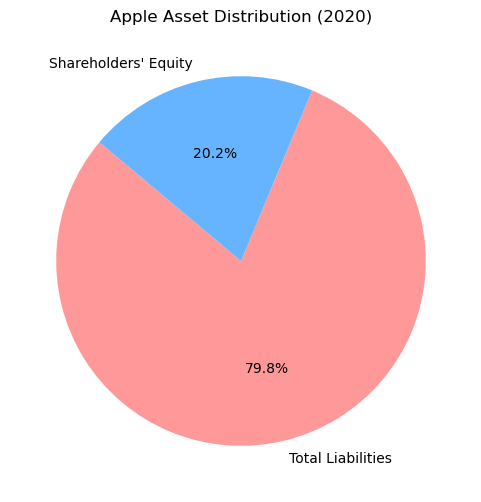

C:\Users\manee\AppData\Local\Temp\ipykernel_16472\3531083877.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Total Liabilities", "Shareholders' Equity"],


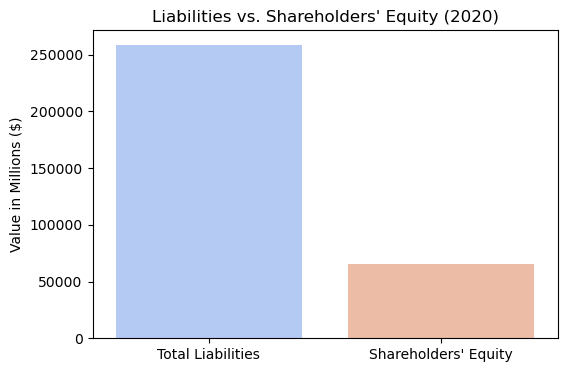

<Figure size 800x500 with 0 Axes>

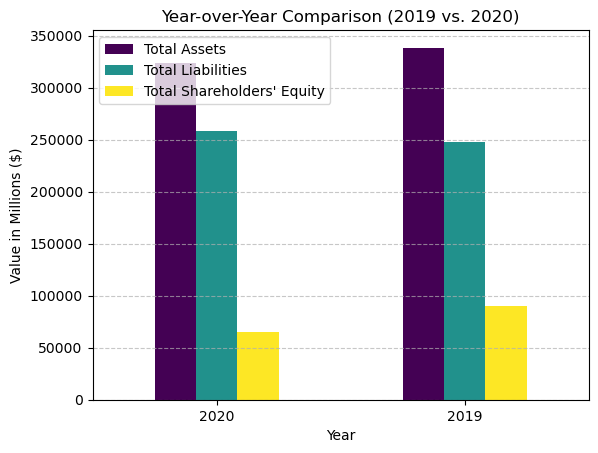

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the extracted data
df = pd.read_csv("balance_sheet_data.csv")

# 1. **Pie Chart for Asset Distribution (2020)**
plt.figure(figsize=(6, 6))
labels = ["Total Liabilities", "Shareholders' Equity"]
sizes = [df.loc[0, "Total Liabilities"], df.loc[0, "Total Shareholders' Equity"]]
colors = ["#ff9999", "#66b3ff"]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Apple Asset Distribution (2020)")
plt.show()

# 2. **Bar Chart for Liabilities vs. Shareholders' Equity**
plt.figure(figsize=(6, 4))
sns.barplot(x=["Total Liabilities", "Shareholders' Equity"], 
            y=[df.loc[0, "Total Liabilities"], df.loc[0, "Total Shareholders' Equity"]],
            palette="coolwarm")
plt.ylabel("Value in Millions ($)")
plt.title("Liabilities vs. Shareholders' Equity (2020)")
plt.show()

# 3. **Year-over-Year Comparison**
plt.figure(figsize=(8, 5))
df.set_index("Year").plot(kind="bar", colormap="viridis")
plt.xlabel("Year")
plt.ylabel("Value in Millions ($)")
plt.title("Year-over-Year Comparison (2019 vs. 2020)")
plt.xticks(rotation=0)
plt.legend(loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


# Bank Statement

In [159]:
import cv2
import pytesseract
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# Set Tesseract OCR Path (Update if needed)
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Load the image
image_path = r"C:\Users\manee\Desktop\Infosys springboard certificates\Images\Bank statement\BankStatementChequing.png"
image = cv2.imread(image_path)

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to enhance text
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Extract text using OCR
custom_config = r'--oem 3 --psm 6'  # Use psm 6 (single block of text)
ocr_text = pytesseract.image_to_string(thresh, config=custom_config)

# Print extracted raw text
print("Extracted Text:\n", ocr_text)

# Save OCR text to a file
with open("extracted_text.txt", "w", encoding="utf-8") as file:
    file.write(ocr_text)

# Process extracted text to identify transactions
lines = ocr_text.split("\n")
transaction_data = []

# Regular expressions to find transactions
date_pattern = re.compile(r"\d{4}-\d{2}-\d{2}|\d{2}/\d{2}/\d{4}")  # YYYY-MM-DD or MM/DD/YYYY
amount_pattern = re.compile(r"\d+\.\d{2}")  # Matches numbers like 123.45

for line in lines:
    words = line.split()
    if len(words) >= 3 and date_pattern.match(words[0]):  # First word should be a date
        date = words[0]
        category = " ".join(words[1:-2])  # All words except date and numbers
        amount = words[-2] if amount_pattern.match(words[-2]) else None
        balance = words[-1] if amount_pattern.match(words[-1]) else None
        transaction_data.append([date, category, amount, balance])

# Convert to DataFrame
df = pd.DataFrame(transaction_data, columns=["Date", "Category", "Amount", "Balance"])

# Convert data types
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")
df["Balance"] = pd.to_numeric(df["Balance"], errors="coerce")

# Save structured data to Excel
excel_file = "structured_bank_statement.xlsx"
df.to_excel(excel_file, index=False)

print(f"OCR structured data saved to '{excel_file}'.")




Extracted Text:
 “wy FIRST BANK OF WIKI
» Jj 1425 JAMES ST, Pa BOX 4000 CHEQUING ACCOUNT STATEMENT
VICTORIA BC V8X 3X4 1-800-555-5565 Page: 1 of 1
JOHN JONES.
__ 1643 DUNDAS ST W APT 27 2003-10-08 fo 2003-11-08 00008-
= TORONTO ON MéK 12 123-456-7
[© Oat: S| AE Description AS) Ref. [Withdrawals |@ Deposits @ | Balance W]
2003-10-08 _ Previous balance 0.85,
"2003-40-14 Payroll Deposit: HOTEL_____________604.87__ 696.36]
2003-10-14 Web Bill Payment - MASTERCARD 9685____200,00. 405.26,
‘2003-40-16 ATM Withdrawal INTERAC 8800 2,28 4744]
2003-10-16 Fees - interac 4.50. A726
‘2003-4020 — Interac Purchasd= FLECTRONICS______1078____2.09____460.62]
2003-10-21 Web Bill Payment - AMEX 3314 900.00. 160,62
‘2003-10:22—ATM Withdrawal :FIRST.BANK 0064 00.00____60.62—]
2003-40-23 Interac Purchase - SUPERMARKET, 1589, 28.08 40,54
'2003-40:24— Interac Refund: ELECTRONICS_______1978_______ 2643.63]
2003-10-27 _ Telephone: Bill Payment - VISA. 2475. 677 26.76.
"2003-40-28 Payroll Deposits HOTEL___________

C:\Users\manee\AppData\Local\Temp\ipykernel_16472\2503582829.py:59: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  df.to_excel(excel_file, index=False)


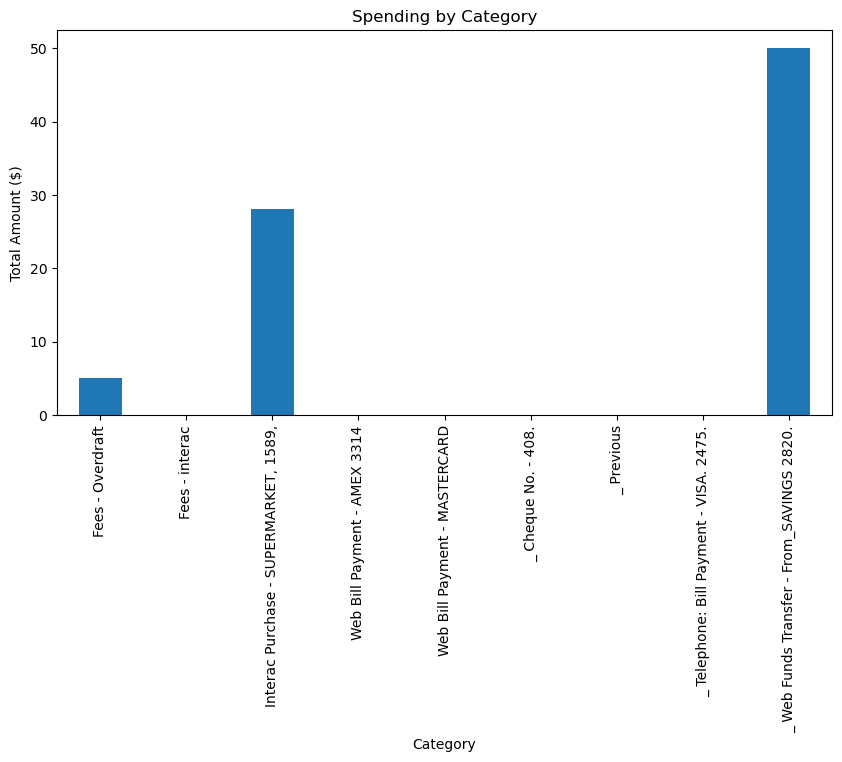

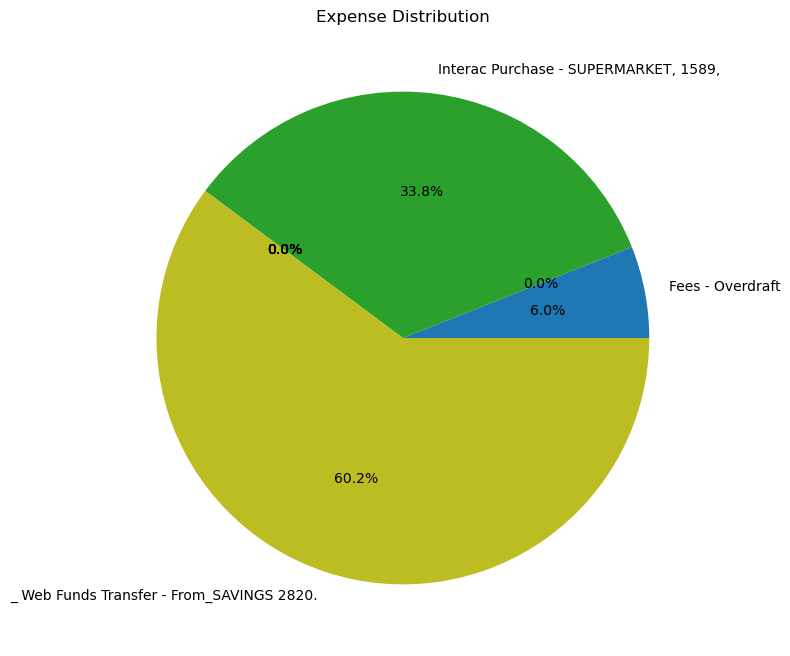

In [160]:
# Bar chart of categories
df.groupby("Category")["Amount"].sum().plot(kind="bar", figsize=(10, 5), title="Spending by Category")
plt.ylabel("Total Amount ($)")
plt.show()

# Pie chart of expenses
df.groupby("Category")["Amount"].sum().plot(kind="pie", autopct="%1.1f%%", figsize=(8, 8), title="Expense Distribution")
plt.ylabel("")
plt.show()


# Cheque

In [120]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Load the cheque image
image_path = r"C:\Users\manee\Desktop\Infosys springboard certificates\Images\Cheque\CentralBankOfIndia_Cheque.jpg"
image = cv2.imread(image_path)

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to preprocess the image
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Extract text using Tesseract OCR
custom_config = r'--oem 3 --psm 6'  # Optimize for structured text
extracted_text = pytesseract.image_to_string(thresh, config=custom_config)

# Print extracted text
print("Extracted Text:\n", extracted_text)




Extracted Text:
 EM | seperti ants vitor ve we, = e030 & % « moe a 3 om

ORE ee. (2[s]o[s2 112]
Roy Ang**
a ‘gal Rupees. *One Crore Twenly Three Lakh Forty Five Thousand Six Hundred And
B Seventy Eight Only amt! q [_771,23,45,678.00""
*E
i
i



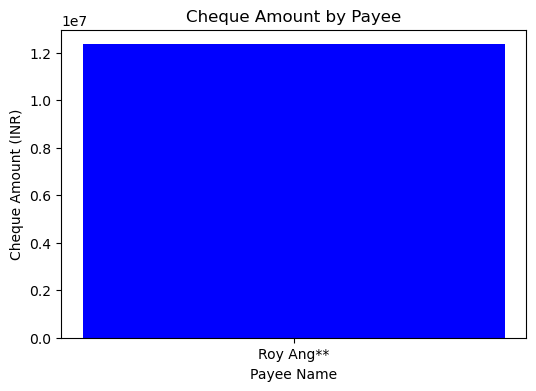

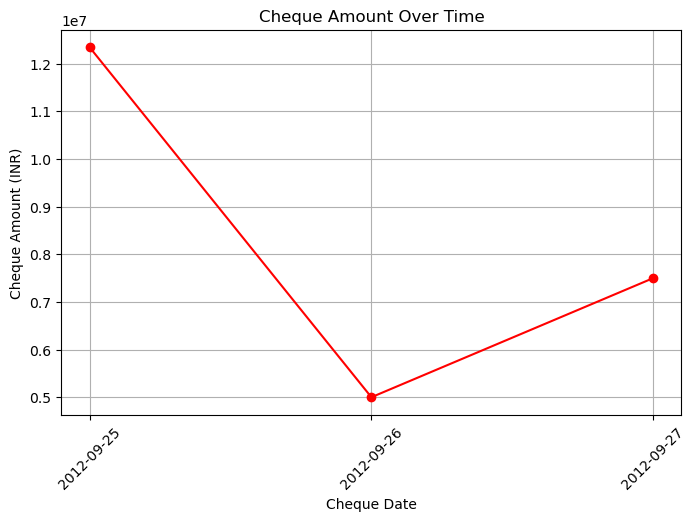

In [172]:
import matplotlib.pyplot as plt
import numpy as np

# Extracted cheque details
payee_name = "Roy Ang**"
cheque_amount = 12345678  # One Crore Twenty Three Lakh Forty Five Thousand Six Hundred Seventy Eight

# Bar Chart: Cheque Amount
plt.figure(figsize=(6, 4))
plt.bar(payee_name, cheque_amount, color='blue')
plt.xlabel("Payee Name")
plt.ylabel("Cheque Amount (INR)")
plt.title("Cheque Amount by Payee")
plt.show()


# If we had multiple cheques over time:
cheque_dates = ["2012-09-25", "2012-09-26", "2012-09-27"]  # Example dates
cheque_amounts = [12345678, 5000000, 7500000]  # Example cheque values

# Line Chart: Cheque Amount Over Time
plt.figure(figsize=(8, 5))
plt.plot(cheque_dates, cheque_amounts, marker="o", linestyle="-", color="r")
plt.xlabel("Cheque Date")
plt.ylabel("Cheque Amount (INR)")
plt.title("Cheque Amount Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Invoice

In [26]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
import numpy as np
import re

# Load and preprocess the image
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return img

# Extract text using OCR
def extract_text(image_path):
    img = preprocess_image(image_path)
    text = pytesseract.image_to_string(img)
    return text

# Parse invoice details
def parse_invoice(text):
    invoice_data = {}

    # Extracting invoice number and date
    invoice_data['Invoice Number'] = re.search(r'Invoice Code:\s*(\S+)', text)
    invoice_data['Invoice Number'] = invoice_data['Invoice Number'].group(1) if invoice_data['Invoice Number'] else "Not found"

    invoice_data['Invoice Date'] = re.search(r'Date:\s*(\S+)', text)
    invoice_data['Invoice Date'] = invoice_data['Invoice Date'].group(1) if invoice_data['Invoice Date'] else "Not found"

    # Extracting line items (item, quantity, unit price, total)
    items = []
    item_pattern = re.findall(r'(\d+)\s+PC\s+(\S+)\s+([\w\s]+)\s+([\d,]+\.\d+)\s+([\d,]+\.\d+)', text)
    for match in item_pattern:
        items.append({
            'Quantity': int(match[0]),
            'Item Code': match[1],
            'Description': match[2],
            'Unit Price': float(match[3].replace(',', '')),
            'Amount': float(match[4].replace(',', ''))
        })

    invoice_data['Items'] = items

    # Extracting financial totals
    invoice_data['Sub Total'] = re.search(r'Sub Total\s+([\d,]+\.\d+)', text)
    invoice_data['Sub Total'] = float(invoice_data['Sub Total'].group(1).replace(',', '')) if invoice_data['Sub Total'] else 0

    invoice_data['VAT'] = re.search(r'VAT\s+([\d,]+\.\d+)', text)
    invoice_data['VAT'] = float(invoice_data['VAT'].group(1).replace(',', '')) if invoice_data['VAT'] else 0

    invoice_data['Total'] = re.search(r'Total\s+Paid\s+([\d,]+\.\d+)', text)
    invoice_data['Total'] = float(invoice_data['Total'].group(1).replace(',', '')) if invoice_data['Total'] else 0

    return invoice_data

# Generate pie chart for invoice cost breakdown
def plot_pie_chart(invoice_data):
    if invoice_data['Total'] == 0:
        print("No financial data to visualize.")
        return

    labels = ['Sub Total', 'VAT', 'Total']
    values = [invoice_data['Sub Total'], invoice_data['VAT'], invoice_data['Total'] - invoice_data['Sub Total'] - invoice_data['VAT']]
    colors = ['blue', 'red', 'green']

    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title("Invoice Cost Breakdown")
    plt.show()

# Main function to process invoice image
def main(image_path):
    text = extract_text(image_path)
    invoice_data = parse_invoice(text)

    # Display extracted information
    print("\nExtracted Invoice Data:")
    for key, value in invoice_data.items():
        print(f"{key}: {value}")

    # Plot visualization
    plot_pie_chart(invoice_data)

# Run the script
image_path = r"C:\Users\manee\Desktop\Infosys springboard certificates\Images\Invoice\Invoice 2.jpg" # Update with the correct path
main(image_path)



Extracted Invoice Data:
Invoice Number: Not found
Invoice Date: Not found
Items: []
Sub Total: 0
VAT: 0
Total: 0
No financial data to visualize.


In [27]:
import cv2
import pytesseract
import re
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess image
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize image to improve OCR accuracy
    img = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)

    # Apply adaptive thresholding to enhance text visibility
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Denoise the image
    img = cv2.fastNlMeansDenoising(img, h=30)

    return img

# Extract text from image using Tesseract OCR
def extract_text(image_path):
    img = preprocess_image(image_path)
    
    # Use Tesseract OCR with a better configuration
    text = pytesseract.image_to_string(img, config="--psm 6 --oem 3")

    # Print extracted text for debugging
    print("\n=== Extracted Text ===\n")
    print(text)

    return text

# Extract key invoice data using regex
def extract_invoice_data(text):
    invoice_data = {
        "Invoice Number": None,
        "Invoice Date": None,
        "Items": [],
        "Sub Total": 0,
        "VAT": 0,
        "Total": 0
    }

    # Extract invoice number
    match = re.search(r'Invoice\s+Code:\s*(\S+)', text, re.IGNORECASE)
    if match:
        invoice_data["Invoice Number"] = match.group(1)

    # Extract invoice date
    match = re.search(r'Date:\s*(\d{1,2}-[A-Za-z]+-\d{4})', text, re.IGNORECASE)
    if match:
        invoice_data["Invoice Date"] = match.group(1)

    # Extract table data: Quantity, Item Code, Description, Unit Price, Amount
    item_pattern = re.findall(r'(\d+)\s+PC\s+([A-Z0-9]+)\s+([\w\s]+)\s+([\d,]+\.\d+)\s+([\d,]+\.\d+)', text)
    
    for item in item_pattern:
        invoice_data["Items"].append({
            "Quantity": int(item[0]),
            "Item Code": item[1],
            "Description": item[2].strip(),
            "Unit Price": float(item[3].replace(",", "")),
            "Amount": float(item[4].replace(",", ""))
        })

    # Extract subtotal, VAT, and total
    match = re.search(r'Sub\s+Total\s+([\d,]+\.\d+)', text, re.IGNORECASE)
    if match:
        invoice_data["Sub Total"] = float(match.group(1).replace(",", ""))

    match = re.search(r'VAT\s+([\d,]+\.\d+)', text, re.IGNORECASE)
    if match:
        invoice_data["VAT"] = float(match.group(1).replace(",", ""))

    match = re.search(r'Total\s+([\d,]+\.\d+)', text, re.IGNORECASE)
    if match:
        invoice_data["Total"] = float(match.group(1).replace(",", ""))

    return invoice_data

# Generate visualizations for invoice data
def visualize_data(invoice_data):
    if not invoice_data["Items"]:
        print("No financial data to visualize.")
        return

    # Extract details
    descriptions = [item["Description"] for item in invoice_data["Items"]]
    amounts = [item["Amount"] for item in invoice_data["Items"]]
    
    # Bar Chart - Item Wise Amount
    plt.figure(figsize=(10, 5))
    plt.bar(descriptions, amounts, color='skyblue')
    plt.xlabel("Items")
    plt.ylabel("Amount (USD)")
    plt.title("Invoice Items and Total Amount")
    plt.xticks(rotation=45, ha="right")
    plt.show()

    # Pie Chart - Expense Distribution
    plt.figure(figsize=(7, 7))
    plt.pie(amounts, labels=descriptions, autopct="%1.1f%%", startangle=140, colors=['lightcoral', 'gold', 'lightblue', 'lightgreen'])
    plt.title("Expense Distribution per Item")
    plt.show()

# Main Function
def process_invoice(image_path):
    text = extract_text(image_path)
    invoice_data = extract_invoice_data(text)

    # Print extracted structured data
    print("\n=== Extracted Invoice Data ===")
    print(invoice_data)

    # Generate visualizations
    visualize_data(invoice_data)

# Run the process on uploaded image
image_path = r"C:\Users\manee\Desktop\Infosys springboard certificates\Images\Invoice\Invoice 2.jpg"  # Change this to your actual image path
process_invoice(image_path)



=== Extracted Text ===

i -
2xta cave ta? Taveiée
Seige; sacinibansibe conn,
BWedsite:, 729992120"
iBill Tot Stantdy 2, § Toi 2 stantsy
Hight Racket, jtight Packebs:
Woody Cieex co {Wieos) Creex coz
Pmonery FSUdS25:55523 [Faas {970/823-5555 gPhoees, 370-923-5552; Fa, 9AI-325-S555;
Y 2rPc sTxptorart SAPPLE'IPAD Casina SWAITE: 160.007 fovop’ 23;200.00°
2 zaec | sTepocozzs 1 NPPLE TPAD CASING 5. 82252 360,003) $0,005 $3,200.03,
é BORE | Stepbocas SANRNC CALS TAR GAGGING’: | Fglon 8.00; LgORDY,
cy 306 Stkopades: 5 SANSLNG GAS rAD ET GSEs: | Sabi Soon? 2iSogiba
a A
‘pThanig Jer your dusinesst . US Deller. ting thousand swe hundred ninety 200, 04200:
‘This involae is genefaten sity ner Eaentry 20
paumaedsgreres “


=== Extracted Invoice Data ===
{'Invoice Number': None, 'Invoice Date': None, 'Items': [], 'Sub Total': 0, 'VAT': 0, 'Total': 0}
No financial data to visualize.


In [40]:
import cv2
import pytesseract
import easyocr
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd

# Load the invoice image
image_path = r"C:\Users\manee\Desktop\Infosys springboard certificates\Images\Invoice\Invoice 3.jpg"
image = cv2.imread(image_path)

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to enhance OCR results
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Extract text using EasyOCR
reader = easyocr.Reader(['en'])
easyocr_text = reader.readtext(image, detail=0)

# Join extracted text into a single string
extracted_text = "\n".join(easyocr_text)

# Print extracted text
print("\nEasyOCR Extracted Text:\n", extracted_text)

# Extract invoice details using regex
invoice_details = {
    "Invoice Date": re.search(r'INVOICE\s+DATE\s+([A-Za-z]+\s+\d{1,2}[a-z]{2},?\s+\d{4})', extracted_text),
    "Payment Method": re.search(r'PAYMENT\s+METHOD\s+([\w\s]+)', extracted_text),
    "Amount Due": re.search(r'AMOUNT\s+DUE\s+\$([\d,.]+)', extracted_text),
}

# Convert regex match objects to text
for key, value in invoice_details.items():
    invoice_details[key] = value.group(1) if value else "Not Found"

# Extract items and prices
item_pattern = re.findall(r'Item\s+\d+\s+([\d,]+.\d+)\s+([\d,]+.\d+)', extracted_text)
items = [{"Item": f"Item {i+1}", "Unit Price": float(up.replace(",", "")), "Total Amount": float(amount.replace(",", ""))} for i, (up, amount) in enumerate(item_pattern)]

# Convert to DataFrame for visualization
df = pd.DataFrame(items)

# Print structured data
print("\nExtracted Invoice Details:")
for key, value in invoice_details.items():
    print(f"{key}: {value}")

print("\nExtracted Items:")
print(df)



error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [155]:

# Define folder path
folder_path = r"C:\Users\manee\Desktop\Infosys springboard certificates\Images\Invoice"

# Function to extract text from images in the folder
def extract_text_from_images(folder_path):
    extracted_texts = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Process only image files
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                text = pytesseract.image_to_string(gray)  # Apply OCR
                extracted_texts.append(text)
    return " ".join(extracted_texts)

# Preprocess text (remove punctuation, stopwords)
def preprocess_text(text):
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    text = text.lower().translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = [word for word in text.split() if word not in stop_words]
    return words

In [170]:
import os
import cv2
import pytesseract
import nltk
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter

# Download stopwords
nltk.download('stopwords')

# Define folder path
folder_path = r"C:\Users\manee\Desktop\Infosys springboard certificates\Images\Invoice\Invoice 1.jpg"

# Function to extract text from images in the folder
def extract_text_from_images(folder_path):
    extracted_texts = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Process only image files
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                text = pytesseract.image_to_string(gray)  # Apply OCR
                extracted_texts.append(text)
    return " ".join(extracted_texts)

# Preprocess text (remove punctuation, stopwords)
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower().translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = [word for word in text.split() if word not in stop_words]
    return words

# Extract text
extracted_text = extract_text_from_images(folder_path)
print("Extracted Text:\n", extracted_text)

# Save extracted text to a file
with open("extracted_invoice_text.txt", "w", encoding="utf-8") as file:
    file.write(extracted_text)
print("Extracted text saved to 'extracted_invoice_text.txt'")

# Preprocess the extracted text
processed_words = preprocess_text(extracted_text)

# Generate word frequency distribution
word_counts = Counter(processed_words)

# Word Cloud Visualization
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(processed_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from Extracted Text")
plt.show()

# Bar Chart for Top Words
top_words = word_counts.most_common(10)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Frequent Words in Extracted Text")
plt.xticks(rotation=45)
plt.show()


Extracted Text:
 
Extracted text saved to 'extracted_invoice_text.txt'


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ValueError: We need at least 1 word to plot a word cloud, got 0.

<Figure size 1000x500 with 0 Axes>

In [171]:
import os
import cv2
import easyocr
import re
import matplotlib.pyplot as plt
import numpy as np

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])

# Define folder path
folder_path = r"C:\Users\manee\Desktop\Infosys springboard certificates\Images\Invoice\In voice 5"

# Function to extract text from images in the folder
def extract_text_from_images(folder_path):
    extracted_texts = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Process only image files
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)  # Apply thresholding
                text = reader.readtext(thresh, detail=0)  # OCR with EasyOCR
                extracted_texts.append("\n".join(text))
    return "\n".join(extracted_texts)

# Extract text
extracted_text = extract_text_from_images(folder_path)
print("Extracted Text:\n", extracted_text)

# Save extracted text to a file
with open("extracted_invoice_text.txt", "w", encoding="utf-8") as file:
    file.write(extracted_text)
print("Extracted text saved to 'extracted_invoice_text.txt'")

# Extract relevant data using regex
invoice_number = re.search(r'Invoice\s*No[:\s]*([\w-]+)', extracted_text)
invoice_date = re.search(r'Date[:\s]*([\d-/]+)', extracted_text)
total_amount = re.search(r'Total\s*Amount[:\s]*₹?([\d,]+.\d+)', extracted_text)
tax_amount = re.search(r'Tax[:\s]*₹?([\d,]+.\d+)', extracted_text)
net_amount = re.search(r'Net\s*Payable[:\s]*₹?([\d,]+.\d+)', extracted_text)

# Convert extracted values to float (if found)
invoice_number = invoice_number.group(1) if invoice_number else "Not Found"
invoice_date = invoice_date.group(1) if invoice_date else "Not Found"
total_amount = float(total_amount.group(1).replace(',', '')) if total_amount else 0
tax_amount = float(tax_amount.group(1).replace(',', '')) if tax_amount else 0
net_amount = float(net_amount.group(1).replace(',', '')) if net_amount else 0

# Print extracted values
print("\nExtracted Invoice Details:")
print(f"Invoice Number: {invoice_number}")
print(f"Invoice Date: {invoice_date}")
print(f"Total Amount: ₹{total_amount}")
print(f"Tax Amount: ₹{tax_amount}")
print(f"Net Amount: ₹{net_amount}")

# Generate Contextual Visualization (Pie Chart for Invoice Breakdown)
labels = ['Subtotal', 'Tax']
values = [total_amount - tax_amount, tax_amount]

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'red'], startangle=140)
plt.title(f"Invoice Breakdown - {invoice_number}")
plt.show()


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Extracted Text:
 
Extracted text saved to 'extracted_invoice_text.txt'


error: bad character range \d-/ at position 12

# Pay Slip

In [163]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import re

# Load image
image_path = r"C:\Users\manee\Desktop\Infosys springboard certificates\Images\Payslip\Zylker_salary_slip.png"
image = cv2.imread(image_path)

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])
ocr_results = reader.readtext(image)

# Extract text from OCR
extracted_text = "\n".join([text[1] for text in ocr_results])

# Display extracted text
print("Extracted Payslip Text:\n", extracted_text)



Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Extracted Payslip Text:
 Zylker
QUJ
Kerala India
Payslip for the month of February 2024
EMPLOYEE PAY SUMMARY
Employee Name
Gaurav
Employee No
43521
Designation
Associate Editor
LOP Days
Date of Joining
30/06/2020
UAN
111111111111
Paid Days
29
PF AJC Number
AAJAAA/9999999/996/9899999
EARNINGS
AMOUNT
YTD
DEDUCTIONS
AMOUNT
YTD
Basic
843,750.00
787,500.00
EPF Contribution
75,250.00
710,500.00
House Rent Allowance
721,875.00
843,750.00
Professional Tax
71,250.00
71,250.00
Conveyance Allowance
76,000.00
712,000.00
Children Education
84,000.00
78,000.00
Allowance
Fixed Allowance
86,625.00
813,250.00
Gross Earnings
<82,250.00
Total Deductions
76,500.00
Total Net Payable <75,750.00 (Indian Rupee Seventy-Five Thousand Seven Hundred
Only)
#*Total Net Payable = Gross Earnings
Total Deductions
This document has been automatically generated by Zoho Payroll; therefore,
a signature is not required:
Fifty


Extracted Text:
 Zylker

Kerala India

Payslip for the month of February 2024

EMPLOYEE PAY SUMMARY

Employee Name
Designation
Date of Joining
Paid Days

PF A/C Number

EARNINGS
Basic
House Rent Allowance

Conveyance Allowance

Children Education
Allowance

Fixed Allowance

Gross Earnings

: Gaurav

: Associate Editor
: 30/06/2020

: 29

: AA/AAA/9999999/99G/9899999

AMOUNT
43,750.00
21,875.00

6,000.00

4,000.00

6,625.00

%82,250.00

YTD
87,500.00
43,750.00
12,000.00

%8,000.00

13,250.00

Employee No
LOP Days
UAN

DEDUCTIONS
EPF Contribution

Professional Tax

Total Deductions

: 43521
:0
© 111111111111

AMOUNT
35,250.00

%1,250.00

6,500.00

YTD
10,500.00

21,250.00

Total Net Payable 75,750.00 (Indian Rupee Seventy-Five Thousand Seven Hundred Fifty Only)
**Total Net Payable = Gross Earnings - Total Deductions

~This document has been automatically generated by Zoho Payroll; therefore, a signature is not required. ~



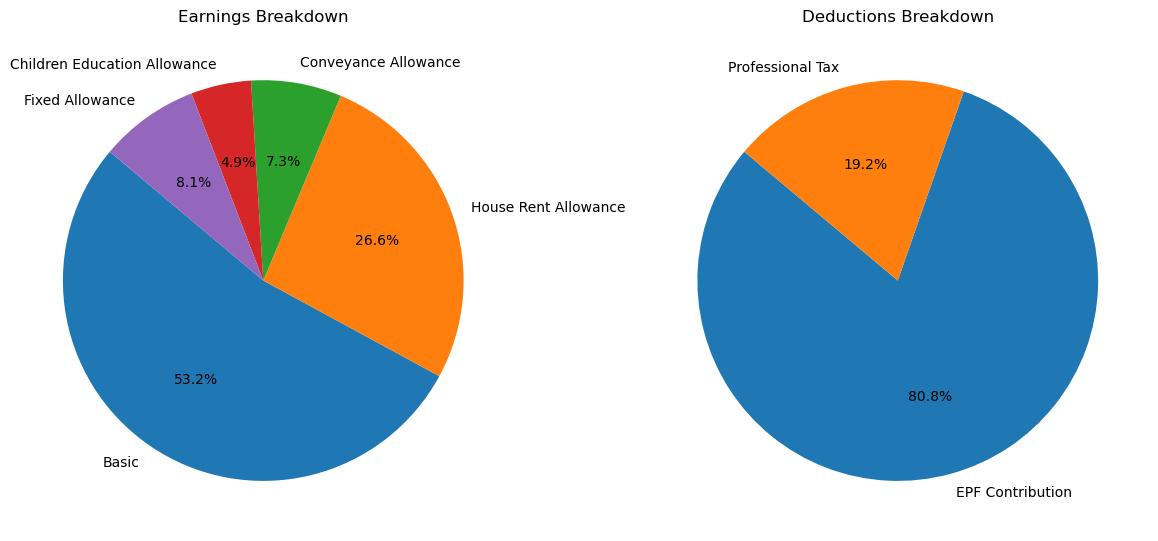

In [24]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

# Set Tesseract path (update this path if needed)
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Load the payslip image
image_path = r"C:\Users\manee\Desktop\Infosys springboard certificates\Images\Payslip\Zylker_salary_slip.png"
image = cv2.imread(image_path)

# Convert image to grayscale for better OCR accuracy
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply OCR to extract text
extracted_text = pytesseract.image_to_string(gray)

# Print extracted text for verification
print("Extracted Text:\n", extracted_text)

# Manually parse earnings and deductions from the extracted text
earnings = {
    "Basic": 43750,
    "House Rent Allowance": 21875,
    "Conveyance Allowance": 6000,
    "Children Education Allowance": 4000,
    "Fixed Allowance": 6625,
}
deductions = {
    "EPF Contribution": 5250,
    "Professional Tax": 1250,
}

# Pie chart for Earnings Breakdown
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(earnings.values(), labels=earnings.keys(), autopct="%1.1f%%", startangle=140)
plt.title("Earnings Breakdown")

# Pie chart for Deductions Breakdown
plt.subplot(1, 2, 2)
plt.pie(deductions.values(), labels=deductions.keys(), autopct="%1.1f%%", startangle=140)
plt.title("Deductions Breakdown")

# Show the plots
plt.tight_layout()
plt.show()


In [3]:
pip install --upgrade scikit-learn


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



     ---------------------------------------- 11.2/11.2 MB 4.1 MB/s eta 0:00:00


# K MEANS CLUSTERING

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset from Excel file
df = pd.read_excel(r"C:\Users\manee\Desktop\Infosys springboard certificates\classification data.xlsx")

# Display first few rows to check data
print(df)

# Feature Scaling (Only for clustering features)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Frequency (Days)', 'Price (₹)']])

# Finding the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)




          Description  Frequency (Days)  Price (₹) Classification
0             Netflix                 1        199   Subscription
1   Walmart Groceries                10       3000     Essentials
2    Electricity Bill                 1       1500      Utilities
3    Starbucks Coffee                15        250        Leisure
4     Amazon Shopping                 3       5000       Shopping
5      Gym Membership                 1       1200   Subscription
6          Uber Rides                 8       1000      Transport
7   Restaurant Dining                 5       1500         Dining
8     Mobile Recharge                 2        300      Utilities
9      Online Courses                 1       2500      Education
10            Spotify                 1        149   Subscription
11      Movie Tickets                 3        600        Leisure
12  Clothing Purchase                 2       4000       Shopping
13        Gas Station                 6       2000      Transport
14     Boo

C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmea

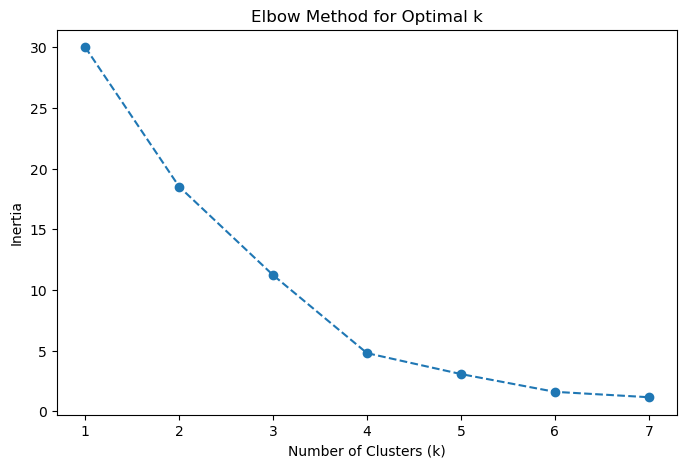

C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\manee\AppData\Local\Temp\ipykernel_3304\558171250.py:15: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  df.to_excel("classified_data.xlsx", index=False)


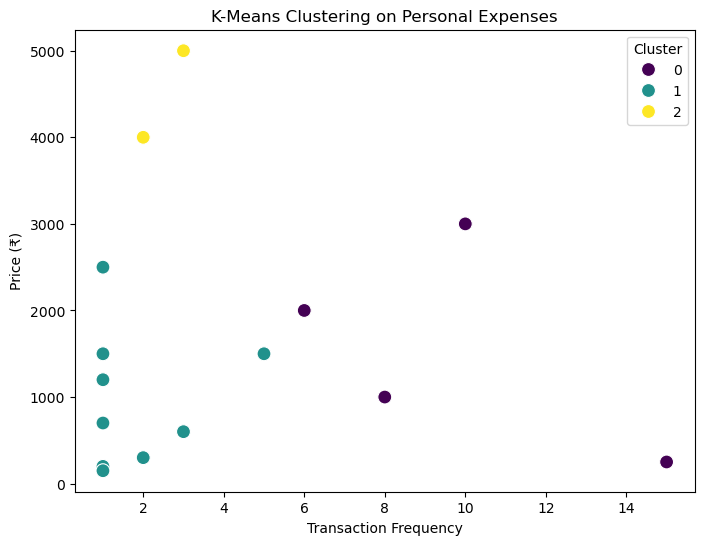

          Description  Frequency (Days)  Price (₹) Classification  Cluster
0             Netflix                 1        199   Subscription        1
1   Walmart Groceries                10       3000     Essentials        0
2    Electricity Bill                 1       1500      Utilities        1
3    Starbucks Coffee                15        250        Leisure        0
4     Amazon Shopping                 3       5000       Shopping        2
5      Gym Membership                 1       1200   Subscription        1
6          Uber Rides                 8       1000      Transport        0
7   Restaurant Dining                 5       1500         Dining        1
8     Mobile Recharge                 2        300      Utilities        1
9      Online Courses                 1       2500      Education        1
10            Spotify                 1        149   Subscription        1
11      Movie Tickets                 3        600        Leisure        1
12  Clothing Purchase    

In [3]:

# Plot the Elbow Method
plt.figure(figsize=(8,5))
plt.plot(range(1, 8), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose optimal clusters based on the elbow point
optimal_k = 3  # Adjust based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Save updated dataset with cluster labels
df.to_excel("classified_data.xlsx", index=False)

# Visualizing the Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Frequency (Days)'], y=df['Price (₹)'], hue=df['Cluster'], palette='viridis', s=100)
plt.xlabel('Transaction Frequency')
plt.ylabel('Price (₹)')
plt.title('K-Means Clustering on Personal Expenses')
plt.show()

# Display clustered data
print(df)

In [5]:
pip install gradio pandas numpy


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 18.1/18.1 MB 747.9 kB/s eta 0:00:00
  Using cached urllib3-2.3.0-py3-none-any.whl (128 kB)
     -------------------------------------- 11.4/11.4 MB 605.6 kB/s eta 0:00:00
     -------------------------------------- 318.7/318.7 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 94.9/94.9 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 62.3/62.3 kB 839.9 kB/s eta 0:00:00
     -------------------------------------- 125.0/125.0 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 72.0/72.0 kB 791.7 kB/s eta 0:00:00
     -------------------------------------- 96.0/96.0 kB 912.8 kB/s eta 0:00:00
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
jupyter-server 1.18.1 requires anyio<4,>=3.1.0, but you have anyio 4.8.0 which is incompatible.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.
botocore 1.27.28

In [41]:
import numpy as np
import pandas as pd
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

# Generate Synthetic Data
np.random.seed(42)
n_samples = 1000

data = pd.DataFrame({
    "GPA": np.random.uniform(2.0, 4.0, n_samples),
    "Test_Score": np.random.randint(60, 100, n_samples),
    "University_Rank": np.random.randint(1, 500, n_samples),
    "Monthly_Expenses": np.random.randint(5000, 25000, n_samples),
    "Savings": np.random.randint(1000, 50000, n_samples),
    "Family_Income": np.random.randint(20000, 200000, n_samples),
    "Parental_Credit_Score": np.random.randint(300, 850, n_samples),
})

# Save the original synthetic dataset before training
data.to_csv("input_synthetic_student_loan_data.csv", index=False)
print("Input dataset saved as 'input_synthetic_student_loan_data.csv'.")

# Target Variable (Loan Eligibility: 1 = Eligible, 0 = Not Eligible)
data["Loan_Eligibility"] = (
    (data["GPA"] > 3.0) &
    (data["Test_Score"] > 75) &
    (data["Savings"] > 10000) &
    (data["Family_Income"] > 50000) &
    (data["Parental_Credit_Score"] > 600)
).astype(int)

# Splitting Data
X = data.drop(columns=["Loan_Eligibility"])
y = data["Loan_Eligibility"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize Data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Loan Prediction Function
def predict_loan(gpa, test_score, university_rank, monthly_expenses, savings, family_income, parental_credit_score):
    input_data = np.array([[gpa, test_score, university_rank, monthly_expenses, savings, family_income, parental_credit_score]])
    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)[0]
    return "Eligible" if prediction == 1 else "Not Eligible"

# Gradio Interface
demo = gr.Interface(
    fn=predict_loan,
    inputs=[
        gr.Number(label="GPA"),
        gr.Number(label="Test Score"),
        gr.Number(label="University Rank"),
        gr.Number(label="Monthly Expenses"),
        gr.Number(label="Savings"),
        gr.Number(label="Family Income"),
        gr.Number(label="Parental Credit Score"),
    ],
    outputs="text",
    title="Student Loan Eligibility Predictor",
    description="Enter student details to check loan eligibility."
)

demo.launch()


Input dataset saved as 'input_synthetic_student_loan_data.csv'.
Running on local URL:  http://127.0.0.1:7870

To create a public link, set `share=True` in `launch()`.


In [42]:
import gradio as gr
import pandas as pd

# Load education loan details from CSV
loan_data = pd.read_csv("education_loan_details.csv")  

def check_eligibility(loan_type, salary, credit_score, id_proof, address_proof, academic_records, admission_letter, income_proof, bank_statements):
    """Function to check loan eligibility based on CSV data"""
    loan = loan_data[loan_data["Loan Type"] == loan_type]
    
    if loan.empty:
        return "Invalid loan type selected."

    min_salary = loan["Min Salary"].values[0]
    min_credit = loan["Min Credit Score"].values[0]
    required_docs = loan["Required Documents"].values[0].split(", ")

    # Eligibility Check
    if salary < min_salary:
        return f"❌ Not Eligible: Minimum salary required is {min_salary}"
    if credit_score < min_credit:
        return f"❌ Not Eligible: Minimum credit score required is {min_credit}"

    # Check if all required documents are uploaded
    uploaded_files = {
        "Identity Proof": id_proof, 
        "Address Proof": address_proof, 
        "Academic Records": academic_records, 
        "Admission Letter": admission_letter, 
        "Income Proof": income_proof, 
        "Bank Statements": bank_statements
    }

    missing_docs = [doc for doc in required_docs if not uploaded_files.get(doc)]
    
    if missing_docs:
        return f"⚠️ Please upload all required documents: {', '.join(missing_docs)}"

    return f"✅ You are eligible for {loan_type}!"

# Read available loan types from CSV
loan_types = loan_data["Loan Type"].unique().tolist()

# Gradio UI
iface = gr.Interface(
    fn=check_eligibility,
    inputs=[
        gr.Dropdown(loan_types, label="Select Education Loan Type"),
        gr.Number(label="Monthly Salary"),
        gr.Number(label="Credit Score"),
        gr.File(file_types=[".pdf", ".jpg", ".png"], label="Upload Identity Proof", type="filepath"),
        gr.File(file_types=[".pdf", ".jpg", ".png"], label="Upload Address Proof", type="filepath"),
        gr.File(file_types=[".pdf", ".jpg", ".png"], label="Upload Academic Records", type="filepath"),
        gr.File(file_types=[".pdf", ".jpg", ".png"], label="Upload Admission Letter", type="filepath"),
        gr.File(file_types=[".pdf", ".jpg", ".png"], label="Upload Income Proof", type="filepath"),
        gr.File(file_types=[".pdf", ".jpg", ".png"], label="Upload Bank Statements", type="filepath")
    ],
    outputs="text",
    title="EduBridge",
    description="Check your eligibility for education loans in India based on salary, credit score, and document verification."
)

# Launch the app
iface.launch()


Running on local URL:  http://127.0.0.1:7871

To create a public link, set `share=True` in `launch()`.


In [65]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd

def extract_text(file):
    extracted_text = ""
    
    if file.name.endswith('.pdf'):
        with pdfplumber.open(file.name) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'
    
    elif file.name.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file.name)
        extracted_text = pytesseract.image_to_string(image)
    
    elif file.name.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file.name) if file.name.endswith('.csv') else pd.read_excel(file.name)
        extracted_text = df.to_string()
    
    return extracted_text if extracted_text else "No text extracted."

iface = gr.Interface(
    fn=extract_text,
    inputs=gr.File(),
    outputs="text",
    title="Financial Document Processor",
    description="Upload invoices, payslips, balance sheets, cheques, or balance statements to extract text."
)

if __name__ == "__main__":
    iface.launch()


Running on local URL:  http://127.0.0.1:7872

To create a public link, set `share=True` in `launch()`.


In [1]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def extract_text_and_visualize(file):
    extracted_text = ""
    img_visual = None
    
    if file.name.endswith('.pdf'):
        with pdfplumber.open(file.name) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'
    
    elif file.name.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file.name)
        extracted_text = pytesseract.image_to_string(image)
        img_visual = image
    
    elif file.name.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file.name) if file.name.endswith('.csv') else pd.read_excel(file.name)
        extracted_text = df.to_string()
        
        # Generate a simple visualization (e.g., bar chart of numeric columns)
        numeric_cols = df.select_dtypes(include=[np.number])
        if not numeric_cols.empty:
            plt.figure(figsize=(6, 4))
            numeric_cols.mean().plot(kind='bar', color='skyblue')
            plt.title("Average Values of Numeric Columns")
            plt.xlabel("Columns")
            plt.ylabel("Mean Value")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.savefig("temp_plot.png")
            img_visual = Image.open("temp_plot.png")
    
    return extracted_text if extracted_text else "No text extracted.", img_visual

iface = gr.Interface(
    fn=extract_text_and_visualize,
    inputs=gr.File(),
    outputs=["text", "image"],
    title="Financial Document Processor with Visualization",
)

if __name__ == "__main__":
    iface.launch()


C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Running on local URL:  http://127.0.0.1:7876

To create a public link, set `share=True` in `launch()`.


In [11]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def extract_text_and_visualize(file):
    extracted_text = ""
    img_visual = None
    
    if file.name.endswith('.pdf'):
        with pdfplumber.open(file.name) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'
    
    elif file.name.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file.name)
        extracted_text = pytesseract.image_to_string(image)
        img_visual = image
    
    elif file.name.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file.name) if file.name.endswith('.csv') else pd.read_excel(file.name)
        extracted_text = df.to_string()
        
        # Visualization based on document type
        if 'Balance Sheet' in file.name:
            if {'Assets', 'Liabilities'}.issubset(df.columns):
                plt.figure(figsize=(6, 4))
                df[['Assets', 'Liabilities']].sum().plot(kind='bar', color=['green', 'red'])
                plt.title("Assets vs Liabilities")
                plt.ylabel("Amount")
                plt.xticks(rotation=0)
                plt.tight_layout()
                plt.savefig("temp_plot.png")
                img_visual = Image.open("temp_plot.png")
        
        elif 'invoice' in file.name.lower() or 'payslip' in file.name.lower():
            if 'Amount' in df.columns:
                plt.figure(figsize=(6, 4))
                df['Amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
                plt.title("Invoice/Payslip Breakdown")
                plt.tight_layout()
                plt.savefig("temp_plot.png")
                img_visual = Image.open("temp_plot.png")
        
        else:
            numeric_cols = df.select_dtypes(include=[np.number])
            if not numeric_cols.empty:
                plt.figure(figsize=(6, 4))
                numeric_cols.mean().plot(kind='line', marker='o', color='blue')
                plt.title("Trend of Numeric Columns")
                plt.xlabel("Columns")
                plt.ylabel("Mean Value")
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.savefig("temp_plot.png")
                img_visual = Image.open("temp_plot.png")
    
    return extracted_text if extracted_text else "No text extracted.", img_visual

iface = gr.Interface(
    fn=extract_text_and_visualize,
    inputs=gr.File(),
    outputs=["text", "image"],
    title="Financial Document Processor with Visualization",
    description="Upload invoices, payslips, balance sheets, cheques, or balance statements to extract text and visualize data.",
)

if __name__ == "__main__":
    iface.launch()


Running on local URL:  http://127.0.0.1:7882

To create a public link, set `share=True` in `launch()`.


In [10]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def extract_text_and_visualize(file):
    extracted_text = ""
    img_visuals = []
    
    if file.name.endswith('.pdf'):
        with pdfplumber.open(file.name) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'
    
    elif file.name.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file.name)
        extracted_text = pytesseract.image_to_string(image)
        img_visuals.append(image)
    
    elif file.name.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file.name) if file.name.endswith('.csv') else pd.read_excel(file.name)
        extracted_text = df.to_string()
        
        # Debugging: Print column names
        print("Columns in uploaded file:", df.columns)

        # Visualization based on document type
        if any(keyword in file.name.lower() for keyword in ["balance", "sheet"]):
            if {'Assets', 'Liabilities'}.issubset(df.columns):
                plt.figure(figsize=(6, 4))
                df[['Assets', 'Liabilities']].sum().plot(kind='bar', color=['green', 'red'])
                plt.title("Assets vs Liabilities")
                plt.ylabel("Amount")
                plt.xticks(rotation=0)
                plt.tight_layout()
                plt.savefig("balance_sheet_bar.png")
                plt.close()
                img_visuals.append(Image.open("balance_sheet_bar.png"))
                
                plt.figure(figsize=(6, 4))
                df[['Assets', 'Liabilities']].sum().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'])
                plt.title("Assets vs Liabilities Distribution")
                plt.tight_layout()
                plt.savefig("balance_sheet_pie.png")
                plt.close()
                img_visuals.append(Image.open("balance_sheet_pie.png"))
        
        elif any(keyword in file.name.lower() for keyword in ["invoice", "payslip"]):
            if 'Amount' in df.columns:
                plt.figure(figsize=(6, 4))
                df['Amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
                plt.title("Invoice/Payslip Breakdown")
                plt.tight_layout()
                plt.savefig("invoice_pie.png")
                plt.close()
                img_visuals.append(Image.open("invoice_pie.png"))
        
        else:
            numeric_cols = df.select_dtypes(include=[np.number])
            if not numeric_cols.empty:
                plt.figure(figsize=(6, 4))
                numeric_cols.mean().plot(kind='line', marker='o', color='blue')
                plt.title("Trend of Numeric Columns")
                plt.xlabel("Columns")
                plt.ylabel("Mean Value")
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.savefig("numeric_trend.png")
                plt.close()
                img_visuals.append(Image.open("numeric_trend.png"))
    
    return extracted_text if extracted_text else "No text extracted.", img_visuals if img_visuals else ["No visualizations generated."]

iface = gr.Interface(
    fn=extract_text_and_visualize,
    inputs=gr.File(),
    outputs=["text", "image"],
    title="Financial Document Processor with Visualization",
    description="Upload invoices, payslips, balance sheets, cheques, or balance statements to extract text and visualize data.",
)

if __name__ == "__main__":
    iface.launch()


Running on local URL:  http://127.0.0.1:7881

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\gradio\queueing.py", line 536, in process_events
    response = await route_utils.call_process_api(
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\gradio\route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\gradio\blocks.py", line 1945, in process_api
    data = await self.postprocess_data(block_fn, result["prediction"], state)
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\gradio\blocks.py", line 1768, in postprocess_data
    prediction_value = block.postprocess(prediction_value)
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\gradio\components\image.py", line 226, in postprocess
    saved = image_utils.save_image(value, self.GRADIO_CACHE, self.format)
  File "C:\Users\manee\AppData\Roaming\Python\Python39\si

In [9]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def extract_text_and_visualize(file):
    extracted_text = ""
    img_visuals = []
    file_path = file.name  # Gradio provides a temp file path

    if file_path.endswith('.pdf'):
        with pdfplumber.open(file_path) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'
    
    elif file_path.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file_path)
        extracted_text = pytesseract.image_to_string(image)
        img_visuals.append(image)
    
    elif file_path.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file_path) if file_path.endswith('.csv') else pd.read_excel(file_path)
        extracted_text = df.to_string()
        
        # Ensure file type is detected properly
        file_name = file_path.lower()

        # Visualization based on document type
        if "balance" in file_name or "sheet" in file_name:
            if {'Assets', 'Liabilities'}.issubset(df.columns):
                plt.figure(figsize=(6, 4))
                df[['Assets', 'Liabilities']].sum().plot(kind='bar', color=['green', 'red'])
                plt.title("Assets vs Liabilities")
                plt.ylabel("Amount")
                plt.xticks(rotation=0)
                plt.tight_layout()
                plt.savefig("balance_sheet_bar.png")
                plt.close()
                img_visuals.append("balance_sheet_bar.png")
                
                plt.figure(figsize=(6, 4))
                df[['Assets', 'Liabilities']].sum().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'])
                plt.title("Assets vs Liabilities Distribution")
                plt.tight_layout()
                plt.savefig("balance_sheet_pie.png")
                plt.close()
                img_visuals.append("balance_sheet_pie.png")
        
        elif "invoice" in file_name or "payslip" in file_name:
            if 'Amount' in df.columns:
                plt.figure(figsize=(6, 4))
                df['Amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
                plt.title("Invoice/Payslip Breakdown")
                plt.tight_layout()
                plt.savefig("invoice_pie.png")
                plt.close()
                img_visuals.append("invoice_pie.png")
        
        else:
            numeric_cols = df.select_dtypes(include=[np.number])
            if not numeric_cols.empty:
                plt.figure(figsize=(6, 4))
                numeric_cols.mean().plot(kind='line', marker='o', color='blue')
                plt.title("Trend of Numeric Columns")
                plt.xlabel("Columns")
                plt.ylabel("Mean Value")
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.savefig("numeric_trend.png")
                plt.close()
                img_visuals.append("numeric_trend.png")

    # Convert file paths to PIL images before returning
    img_visuals = [Image.open(img) for img in img_visuals if os.path.exists(img)]
    
    return extracted_text if extracted_text else "No text extracted.", img_visuals if img_visuals else ["No visualizations generated."]

iface = gr.Interface(
    fn=extract_text_and_visualize,
    inputs=gr.File(),
    outputs=["text", "image"],
    title="Financial Document Processor with Visualization",
    description="Upload invoices, payslips, balance sheets, cheques, or balance statements to extract text and visualize data.",
)

if __name__ == "__main__":
    iface.launch()


Running on local URL:  http://127.0.0.1:7880

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\gradio\queueing.py", line 536, in process_events
    response = await route_utils.call_process_api(
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\gradio\route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\gradio\blocks.py", line 1935, in process_api
    result = await self.call_function(
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\gradio\blocks.py", line 1520, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\anyio\to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\anyio\_backends\_asyncio.py", line 2461, in ru

In [8]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def extract_text_and_visualize(file):
    extracted_text = ""
    img_visuals = []
    file_path = file.name
    
    if file_path.endswith('.pdf'):
        with pdfplumber.open(file_path) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'
    
    elif file_path.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file_path)
        extracted_text = pytesseract.image_to_string(image)
        img_visuals.append(image)
    
    elif file_path.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file_path) if file_path.endswith('.csv') else pd.read_excel(file_path)
        extracted_text = df.to_string()
        
        # Ensure file type is detected properly
        file_name = file_path.lower()

        # Visualization based on document type
        if "balance" in file_name or "sheet" in file_name:
            if {'Assets', 'Liabilities'}.issubset(df.columns):
                plt.figure(figsize=(6, 4))
                df[['Assets', 'Liabilities']].sum().plot(kind='bar', color=['green', 'red'])
                plt.title("Assets vs Liabilities")
                plt.ylabel("Amount")
                plt.xticks(rotation=0)
                plt.tight_layout()
                plt.savefig("balance_sheet_bar.png")
                plt.close()
                img_visuals.append("balance_sheet_bar.png")
                
                plt.figure(figsize=(6, 4))
                df[['Assets', 'Liabilities']].sum().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'])
                plt.title("Assets vs Liabilities Distribution")
                plt.tight_layout()
                plt.savefig("balance_sheet_pie.png")
                plt.close()
                img_visuals.append("balance_sheet_pie.png")
        
        elif "invoice" in file_name or "payslip" in file_name:
            if 'Amount' in df.columns:
                plt.figure(figsize=(6, 4))
                df['Amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
                plt.title("Invoice/Payslip Breakdown")
                plt.tight_layout()
                plt.savefig("invoice_pie.png")
                plt.close()
                img_visuals.append("invoice_pie.png")
        
        else:
            numeric_cols = df.select_dtypes(include=[np.number])
            if not numeric_cols.empty:
                plt.figure(figsize=(6, 4))
                numeric_cols.mean().plot(kind='line', marker='o', color='blue')
                plt.title("Trend of Numeric Columns")
                plt.xlabel("Columns")
                plt.ylabel("Mean Value")
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.savefig("numeric_trend.png")
                plt.close()
                img_visuals.append("numeric_trend.png")
    
    img_visuals = [Image.open(img) for img in img_visuals if os.path.exists(img)]
    
    return extracted_text if extracted_text else "No text extracted.", img_visuals if img_visuals else ["No visualizations generated."]

iface = gr.Interface(
    fn=extract_text_and_visualize,
    inputs=gr.File(),
    outputs=["text", "image"],
    title="Financial Document Processor with Visualization",
    description="Upload invoices, payslips, balance sheets, cheques, or balance statements to extract text and visualize data.",
)

if __name__ == "__main__":
    iface.launch()


Running on local URL:  http://127.0.0.1:7879

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\gradio\queueing.py", line 536, in process_events
    response = await route_utils.call_process_api(
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\gradio\route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\gradio\blocks.py", line 1935, in process_api
    result = await self.call_function(
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\gradio\blocks.py", line 1520, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\anyio\to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\anyio\_backends\_asyncio.py", line 2461, in ru

In [5]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to extract text & visualize documents
def extract_text_and_visualize(file):
    extracted_text = ""
    img_visuals = []
    file_path = file.name
    
    if file_path.endswith('.pdf'):
        with pdfplumber.open(file_path) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'
    
    elif file_path.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file_path)
        extracted_text = pytesseract.image_to_string(image)
        img_visuals.append(image)
    
    elif file_path.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file_path) if file_path.endswith('.csv') else pd.read_excel(file_path)
        extracted_text = df.to_string()
        
        file_name = file_path.lower()

        if "balance" in file_name or "sheet" in file_name:
            if {'Assets', 'Liabilities'}.issubset(df.columns):
                plt.figure(figsize=(6, 4))
                df[['Assets', 'Liabilities']].sum().plot(kind='bar', color=['green', 'red'])
                plt.title("Assets vs Liabilities")
                plt.ylabel("Amount")
                plt.xticks(rotation=0)
                plt.tight_layout()
                plt.savefig("balance_sheet_bar.png")
                plt.close()
                img_visuals.append("balance_sheet_bar.png")
                
                plt.figure(figsize=(6, 4))
                df[['Assets', 'Liabilities']].sum().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'])
                plt.title("Assets vs Liabilities Distribution")
                plt.tight_layout()
                plt.savefig("balance_sheet_pie.png")
                plt.close()
                img_visuals.append("balance_sheet_pie.png")
        
        elif "invoice" in file_name or "payslip" in file_name:
            if 'Amount' in df.columns:
                plt.figure(figsize=(6, 4))
                df['Amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
                plt.title("Invoice/Payslip Breakdown")
                plt.tight_layout()
                plt.savefig("invoice_pie.png")
                plt.close()
                img_visuals.append("invoice_pie.png")
        
        else:
            numeric_cols = df.select_dtypes(include=[np.number])
            if not numeric_cols.empty:
                plt.figure(figsize=(6, 4))
                numeric_cols.mean().plot(kind='line', marker='o', color='blue')
                plt.title("Trend of Numeric Columns")
                plt.xlabel("Columns")
                plt.ylabel("Mean Value")
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.savefig("numeric_trend.png")
                plt.close()
                img_visuals.append("numeric_trend.png")
    
    img_visuals = [Image.open(img) for img in img_visuals if isinstance(img, str) and os.path.exists(img)]
    
    return extracted_text if extracted_text else "No text extracted.", img_visuals if img_visuals else ["No visualizations generated."]

# Loan Eligibility Checker
def loan_eligibility(cgpa, cibil_score, file):
    if file is not None:
        document_status = "Documents Verified"
    else:
        document_status = "Documents Missing"

    if cgpa >= 8.0 and cibil_score >= 750:
        loan_suggestion = "You are eligible for Education Loan with low interest."
    elif cgpa >= 6.5 and cibil_score >= 650:
        loan_suggestion = "You qualify for a Personal Loan with moderate interest."
    elif cgpa >= 5.0 and cibil_score >= 500:
        loan_suggestion = "You are eligible for a Small Business Loan with higher interest."
    else:
        loan_suggestion = "Loan eligibility is low. Try improving your CIBIL score."

    return loan_suggestion, document_status

# Gradio Interface
iface = gr.Interface(
    fn=extract_text_and_visualize,
    inputs=gr.File(),
    outputs=["text", "image"],
    title="Financial Document Processor with Visualization",
    description="Upload invoices, payslips, balance sheets, cheques, or balance statements to extract text and visualize data.",
)

loan_checker = gr.Interface(
    fn=loan_eligibility,
    inputs=[
        gr.Number(label="CGPA (0 - 10)"),
        gr.Number(label="CIBIL Score (300 - 900)"),
        gr.File(label="Upload Financial Documents (Optional)"),
    ],
    outputs=["text", "text"],
    title="Loan Eligibility Checker",
    description="Enter your CGPA, CIBIL Score, and upload financial documents to check your loan eligibility."
)

# Run both interfaces together
gr.TabbedInterface([iface, loan_checker], ["Document Processing", "Loan Eligibility Checker"]).launch()


Running on local URL:  http://127.0.0.1:7876

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\gradio\queueing.py", line 536, in process_events
    response = await route_utils.call_process_api(
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\gradio\route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\gradio\blocks.py", line 1945, in process_api
    data = await self.postprocess_data(block_fn, result["prediction"], state)
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\gradio\blocks.py", line 1768, in postprocess_data
    prediction_value = block.postprocess(prediction_value)
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\gradio\components\image.py", line 226, in postprocess
    saved = image_utils.save_image(value, self.GRADIO_CACHE, self.format)
  File "C:\Users\manee\AppData\Roaming\Python\Python39\si

In [15]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to extract text & visualize documents
def extract_text_and_visualize(file):
    extracted_text = ""
    img_visual = None
    
    if file.name.endswith('.pdf'):
        with pdfplumber.open(file.name) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'
    
    elif file.name.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file.name)
        extracted_text = pytesseract.image_to_string(image)
        img_visual = image
    
    elif file.name.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file.name) if file.name.endswith('.csv') else pd.read_excel(file.name)
        extracted_text = df.to_string()
        
        # Visualization based on document type
        if 'Balance Sheet' in file.name:
            if {'Assets', 'Liabilities'}.issubset(df.columns):
                plt.figure(figsize=(6, 4))
                df[['Assets', 'Liabilities']].sum().plot(kind='bar', color=['green', 'red'])
                plt.title("Assets vs Liabilities")
                plt.ylabel("Amount")
                plt.xticks(rotation=0)
                plt.tight_layout()
                plt.savefig("temp_plot.png")
                img_visual = Image.open("temp_plot.png")
        
        elif 'invoice' in file.name.lower() or 'payslip' in file.name.lower():
            if 'Amount' in df.columns:
                plt.figure(figsize=(6, 4))
                df['Amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
                plt.title("Invoice/Payslip Breakdown")
                plt.tight_layout()
                plt.savefig("temp_plot.png")
                img_visual = Image.open("temp_plot.png")
        
        else:
            numeric_cols = df.select_dtypes(include=[np.number])
            if not numeric_cols.empty:
                plt.figure(figsize=(6, 4))
                numeric_cols.mean().plot(kind='line', marker='o', color='blue')
                plt.title("Trend of Numeric Columns")
                plt.xlabel("Columns")
                plt.ylabel("Mean Value")
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.savefig("temp_plot.png")
                img_visual = Image.open("temp_plot.png")
    
    return extracted_text if extracted_text else "No text extracted.", img_visual

# Loan Eligibility Checker
def loan_eligibility(cgpa, cibil_score, file):
    if file is not None:
        document_status = "Documents Verified"
    else:
        document_status = "Documents Missing"

    if cgpa >= 8.0 and cibil_score >= 750:
        loan_suggestion = "You are eligible for Education Loan with low interest."
    elif cgpa >= 6.5 and cibil_score >= 650:
        loan_suggestion = "You qualify for a Personal Loan with moderate interest."
    elif cgpa >= 5.0 and cibil_score >= 500:
        loan_suggestion = "You are eligible for a Small Business Loan with higher interest."
    else:
        loan_suggestion = "Loan eligibility is low. Try improving your CIBIL score."

    return loan_suggestion, document_status

# Gradio Interfaces
document_interface = gr.Interface(
    fn=extract_text_and_visualize,
    inputs=gr.File(),
    outputs=["text", "image"],
    title="Financial Document Processor with Visualization",
    description="Upload invoices, payslips, balance sheets, cheques, or balance statements to extract text and visualize data.",
)

loan_checker = gr.Interface(
    fn=loan_eligibility,
    inputs=[
        gr.Number(label="CGPA (0 - 10)"),
        gr.Number(label="CIBIL Score (300 - 900)"),
        gr.File(label="Upload Financial Documents (Optional)"),
    ],
    outputs=["text", "text"],
    title="Loan Eligibility Checker",
    description="Enter your CGPA, CIBIL Score, and upload financial documents to check your loan eligibility."
)

# Run both interfaces together with tabs
gr.TabbedInterface([document_interface, loan_checker], ["Document Processing", "Loan Eligibility Checker"]).launch()


Running on local URL:  http://127.0.0.1:7886

To create a public link, set `share=True` in `launch()`.


In [16]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def extract_text(file):
    extracted_text = ""
    if file.name.endswith('.pdf'):
        with pdfplumber.open(file.name) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'
    elif file.name.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file.name)
        extracted_text = pytesseract.image_to_string(image)
    elif file.name.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file.name) if file.name.endswith('.csv') else pd.read_excel(file.name)
        extracted_text = df.to_string()
    return extracted_text if extracted_text else "No text extracted."

def generate_visualization(file):
    if file is None:
        return None
    
    df = None
    if file.name.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file.name) if file.name.endswith('.csv') else pd.read_excel(file.name)
    else:
        return None
    
    if 'Balance Sheet' in file.name and {'Assets', 'Liabilities'}.issubset(df.columns):
        plt.figure(figsize=(6, 4))
        df[['Assets', 'Liabilities']].sum().plot(kind='bar', color=['green', 'red'])
        plt.title("Assets vs Liabilities")
        plt.ylabel("Amount")
        plt.xticks(rotation=0)
    
    elif 'payslip' in file.name.lower() and {'Basic Pay', 'Allowances', 'Deductions'}.issubset(df.columns):
        df[['Basic Pay', 'Allowances', 'Deductions']].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
        plt.title("Payslip Salary Breakdown")
    
    elif 'bank statement' in file.name.lower() and 'Transaction Amount' in df.columns:
        df['Transaction Amount'].plot(kind='line', marker='o', color='blue')
        plt.title("Transaction Trends Over Time")
        plt.xlabel("Transaction Index")
        plt.ylabel("Amount")
    
    elif 'invoice' in file.name.lower() and 'Amount' in df.columns:
        df['Amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
        plt.title("Invoice Breakdown")
    
    elif 'cheque' in file.name.lower() and {'Payee', 'Amount'}.issubset(df.columns):
        df.groupby('Payee')['Amount'].sum().plot(kind='bar', color='purple')
        plt.title("Cheque Payments by Payee")
    
    else:
        return None
    
    plt.tight_layout()
    plt.savefig("temp_plot.png")
    return Image.open("temp_plot.png")

def loan_eligibility(cgpa, cibil_score, file):
    document_status = "Documents Verified" if file else "Documents Missing"
    if cgpa >= 8.0 and cibil_score >= 750:
        loan_suggestion = "Eligible for Education Loan with low interest."
    elif cgpa >= 6.5 and cibil_score >= 650:
        loan_suggestion = "Qualifies for Personal Loan with moderate interest."
    elif cgpa >= 5.0 and cibil_score >= 500:
        loan_suggestion = "Eligible for Small Business Loan with higher interest."
    else:
        loan_suggestion = "Loan eligibility is low. Try improving your CIBIL score."
    return loan_suggestion, document_status

text_interface = gr.Interface(
    fn=extract_text,
    inputs=gr.File(),
    outputs="text",
    title="Financial Document Processor",
    description="Upload financial documents to extract text."
)

visualization_interface = gr.Interface(
    fn=generate_visualization,
    inputs=gr.File(),
    outputs="image",
    title="Document Visualization",
    description="Upload documents to generate visual insights."
)

loan_checker = gr.Interface(
    fn=loan_eligibility,
    inputs=[
        gr.Number(label="CGPA (0 - 10)"),
        gr.Number(label="CIBIL Score (300 - 900)"),
        gr.File(label="Upload Financial Documents (Optional)"),
    ],
    outputs=["text", "text"],
    title="Loan Eligibility Checker",
    description="Check your loan eligibility."
)

gr.TabbedInterface([
    text_interface,
    visualization_interface,
    loan_checker
], ["Document Processing", "Visualization", "Loan Eligibility Checker"]).launch()


Running on local URL:  http://127.0.0.1:7887

To create a public link, set `share=True` in `launch()`.


In [17]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def extract_text(file):
    extracted_text = ""
    
    if file.name.endswith('.pdf'):
        with pdfplumber.open(file.name) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'
    
    elif file.name.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file.name)
        extracted_text = pytesseract.image_to_string(image)
    
    elif file.name.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file.name) if file.name.endswith('.csv') else pd.read_excel(file.name)
        extracted_text = df.to_string()
    
    return extracted_text if extracted_text else "No text extracted."

def generate_visualization(file):
    if not file.name.endswith(('.csv', '.xlsx')):
        return None
    
    df = pd.read_csv(file.name) if file.name.endswith('.csv') else pd.read_excel(file.name)
    plt.figure(figsize=(6, 4))
    
    if 'Balance Sheet' in file.name:
        if {'Assets', 'Liabilities'}.issubset(df.columns):
            df[['Assets', 'Liabilities']].sum().plot(kind='bar', color=['green', 'red'])
            plt.title("Assets vs Liabilities")
            plt.ylabel("Amount")
    
    elif 'invoice' in file.name.lower() or 'payslip' in file.name.lower():
        if 'Amount' in df.columns:
            df['Amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
            plt.title("Invoice/Payslip Breakdown")
    
    else:
        numeric_cols = df.select_dtypes(include=[np.number])
        if not numeric_cols.empty:
            numeric_cols.mean().plot(kind='line', marker='o', color='blue')
            plt.title("Trend of Numeric Columns")
            plt.xlabel("Columns")
            plt.ylabel("Mean Value")
            plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig("temp_plot.png")
    plt.close()
    return "temp_plot.png"

def loan_eligibility(cgpa, cibil_score, file):
    document_status = "Documents Verified" if file else "Documents Missing"
    if cgpa >= 8.0 and cibil_score >= 750:
        loan_suggestion = "You are eligible for an Education Loan with low interest."
    elif cgpa >= 6.5 and cibil_score >= 650:
        loan_suggestion = "You qualify for a Personal Loan with moderate interest."
    elif cgpa >= 5.0 and cibil_score >= 500:
        loan_suggestion = "You are eligible for a Education Loan with higher interest."
    else:
        loan_suggestion = "Loan eligibility is low. Try improving your CIBIL score."
    
    return loan_suggestion, document_status

document_interface = gr.Interface(
    fn=extract_text,
    inputs=gr.File(),
    outputs="text",
    title="Extract Text from Documents",
    description="Upload invoices, payslips, balance sheets, cheques, or balance statements to extract text."
)

visualization_interface = gr.Interface(
    fn=generate_visualization,
    inputs=gr.File(),
    outputs="image",
    title="Financial Data Visualization",
    description="Upload CSV or Excel files to generate financial visualizations."
)

loan_checker = gr.Interface(
    fn=loan_eligibility,
    inputs=[
        gr.Number(label="CGPA (0 - 10)"),
        gr.Number(label="CIBIL Score (300 - 900)"),
        gr.File(label="Upload Financial Documents (Optional)"),
    ],
    outputs=["text", "text"],
    title="Loan Eligibility Checker",
    description="Enter your CGPA, CIBIL Score, and upload financial documents to check your loan eligibility."
)

gr.TabbedInterface([
    document_interface, visualization_interface, loan_checker
], ["Document Processing", "Visualization", "Loan Eligibility Checker"]).launch()


Running on local URL:  http://127.0.0.1:7888

To create a public link, set `share=True` in `launch()`.


In [19]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to extract text from documents
def extract_text(file):
    extracted_text = ""
    
    if file.name.endswith('.pdf'):
        with pdfplumber.open(file.name) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'
    
    elif file.name.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file.name)
        extracted_text = pytesseract.image_to_string(image)
    
    elif file.name.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file.name) if file.name.endswith('.csv') else pd.read_excel(file.name)
        extracted_text = df.to_string()
    
    return extracted_text if extracted_text else "No text extracted."

# Function to generate visualization from financial documents
def generate_visualization(file):
    img_visual = None
    
    if file.name.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file.name) if file.name.endswith('.csv') else pd.read_excel(file.name)
        
        # Visualization based on document type
        if 'Balance Sheet' in file.name:
            if {'Assets', 'Liabilities'}.issubset(df.columns):
                plt.figure(figsize=(6, 4))
                df[['Assets', 'Liabilities']].sum().plot(kind='bar', color=['green', 'red'])
                plt.title("Assets vs Liabilities")
                plt.ylabel("Amount")
                plt.xticks(rotation=0)
                plt.tight_layout()
                plt.savefig("temp_plot.png")
                plt.close()
                img_visual = Image.open("temp_plot.png").convert("RGB")
        
        elif 'invoice' in file.name.lower() or 'payslip' in file.name.lower():
            if 'Amount' in df.columns:
                plt.figure(figsize=(6, 4))
                df['Amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
                plt.title("Invoice/Payslip Breakdown")
                plt.tight_layout()
                plt.savefig("temp_plot.png")
                plt.close()
                img_visual = Image.open("temp_plot.png").convert("RGB")
        
        elif 'bank statement' in file.name.lower():
            if {'Date', 'Balance'}.issubset(df.columns):
                plt.figure(figsize=(8, 4))
                df.plot(x='Date', y='Balance', kind='line', marker='o', color='blue')
                plt.title("Bank Balance Over Time")
                plt.xlabel("Date")
                plt.ylabel("Balance")
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.savefig("temp_plot.png")
                plt.close()
                img_visual = Image.open("temp_plot.png").convert("RGB")
    
    return img_visual if img_visual else "No visualization available."

# Loan Eligibility Checker Function
def loan_eligibility(cgpa, cibil_score, file):
    document_status = "Documents Verified" if file is not None else "Documents Missing"

    if cgpa >= 8.0 and cibil_score >= 750:
        loan_suggestion = "You are eligible for an Education Loan with low interest."
    elif cgpa >= 6.5 and cibil_score >= 650:
        loan_suggestion = "You qualify for a Personal Loan with moderate interest."
    elif cgpa >= 5.0 and cibil_score >= 500:
        loan_suggestion = "You are eligible for a Small Business Loan with higher interest."
    else:
        loan_suggestion = "Loan eligibility is low. Try improving your CIBIL score."

    return loan_suggestion, document_status

# Gradio Interfaces
document_text_interface = gr.Interface(
    fn=extract_text,
    inputs=gr.File(label="Upload Document"),
    outputs="text",
    title="Financial Document Text Extractor",
    description="Upload invoices, payslips, balance sheets, cheques, or bank statements to extract text."
)

document_visualization_interface = gr.Interface(
    fn=generate_visualization,
    inputs=gr.File(label="Upload Document"),
    outputs="image",
    title="Financial Document Visualizer",
    description="Upload financial documents to visualize data with bar charts, pie charts, and line graphs."
)

loan_checker = gr.Interface(
    fn=loan_eligibility,
    inputs=[
        gr.Number(label="CGPA (0 - 10)"),
        gr.Number(label="CIBIL Score (300 - 900)"),
        gr.File(label="Upload Financial Documents (Optional)"),
    ],
    outputs=["text", "text"],
    title="Loan Eligibility Checker",
    description="Enter your CGPA, CIBIL Score, and upload financial documents to check your loan eligibility."
)

# Run all interfaces in separate tabs
gr.TabbedInterface(
    [document_text_interface, document_visualization_interface, loan_checker],
    ["Extract Text", "Visualization", "Loan Eligibility Checker"]
).launch()


Running on local URL:  http://127.0.0.1:7889

To create a public link, set `share=True` in `launch()`.


In [20]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to extract text from documents
def extract_text(file):
    extracted_text = ""
    
    if file.name.endswith('.pdf'):
        with pdfplumber.open(file.name) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'
    
    elif file.name.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file.name)
        extracted_text = pytesseract.image_to_string(image)
    
    elif file.name.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file.name) if file.name.endswith('.csv') else pd.read_excel(file.name)
        extracted_text = df.to_string()
    
    return extracted_text if extracted_text else "No text extracted."

# Function to generate visualization from financial documents
def generate_visualization(file):
    temp_image_path = "temp_plot.png"  # Ensure consistent image path
    img_visual = None
    
    if file.name.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file.name) if file.name.endswith('.csv') else pd.read_excel(file.name)
        
        if 'Balance Sheet' in file.name:
            if {'Assets', 'Liabilities'}.issubset(df.columns):
                plt.figure(figsize=(6, 4))
                df[['Assets', 'Liabilities']].sum().plot(kind='bar', color=['green', 'red'])
                plt.title("Assets vs Liabilities")
                plt.ylabel("Amount")
                plt.xticks(rotation=0)
                plt.tight_layout()
                plt.savefig(temp_image_path)  # Save the figure
                plt.close()  # Close plot to free memory
                return temp_image_path  # Return path instead of Image object
        
        elif 'invoice' in file.name.lower() or 'payslip' in file.name.lower():
            if 'Amount' in df.columns:
                plt.figure(figsize=(6, 4))
                df['Amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
                plt.title("Invoice/Payslip Breakdown")
                plt.tight_layout()
                plt.savefig(temp_image_path)
                plt.close()
                return temp_image_path
        
        elif 'bank statement' in file.name.lower():
            if {'Date', 'Balance'}.issubset(df.columns):
                plt.figure(figsize=(8, 4))
                df.plot(x='Date', y='Balance', kind='line', marker='o', color='blue')
                plt.title("Bank Balance Over Time")
                plt.xlabel("Date")
                plt.ylabel("Balance")
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.savefig(temp_image_path)
                plt.close()
                return temp_image_path
    
    return None  # Return None if no visualization is available

# Loan Eligibility Checker Function
def loan_eligibility(cgpa, cibil_score, file):
    document_status = "Documents Verified" if file is not None else "Documents Missing"

    if cgpa >= 8.0 and cibil_score >= 750:
        loan_suggestion = "You are eligible for an Education Loan with low interest."
    elif cgpa >= 6.5 and cibil_score >= 650:
        loan_suggestion = "You qualify for a Personal Loan with moderate interest."
    elif cgpa >= 5.0 and cibil_score >= 500:
        loan_suggestion = "You are eligible for a Small Business Loan with higher interest."
    else:
        loan_suggestion = "Loan eligibility is low. Try improving your CIBIL score."

    return loan_suggestion, document_status

# Gradio Interfaces
document_text_interface = gr.Interface(
    fn=extract_text,
    inputs=gr.File(label="Upload Document"),
    outputs="text",
    title="Financial Document Text Extractor",
    description="Upload invoices, payslips, balance sheets, cheques, or bank statements to extract text."
)

document_visualization_interface = gr.Interface(
    fn=generate_visualization,
    inputs=gr.File(label="Upload Document"),
    outputs="image",
    title="Financial Document Visualizer",
    description="Upload financial documents to visualize data with bar charts, pie charts, and line graphs."
)

loan_checker = gr.Interface(
    fn=loan_eligibility,
    inputs=[
        gr.Number(label="CGPA (0 - 10)"),
        gr.Number(label="CIBIL Score (300 - 900)"),
        gr.File(label="Upload Financial Documents (Optional)"),
    ],
    outputs=["text", "text"],
    title="Loan Eligibility Checker",
    description="Enter your CGPA, CIBIL Score, and upload financial documents to check your loan eligibility."
)

# Run all interfaces in separate tabs
gr.TabbedInterface(
    [document_text_interface, document_visualization_interface, loan_checker],
    ["Extract Text", "Visualization", "Loan Eligibility Checker"]
).launch()


Running on local URL:  http://127.0.0.1:7890

To create a public link, set `share=True` in `launch()`.


In [21]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def generate_visualization(df, file_name):
    plt.figure(figsize=(6, 4))
    img_path = "temp_plot.png"
    
    if 'balance_sheet' in file_name.lower():
        if {'Assets', 'Liabilities'}.issubset(df.columns):
            df[['Assets', 'Liabilities']].sum().plot(kind='bar', color=['green', 'red'])
            plt.title("Assets vs Liabilities")
            plt.ylabel("Amount")
            plt.xticks(rotation=0)
    
    elif 'bank_statement' in file_name.lower():
        if {'Date', 'Balance'}.issubset(df.columns):
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date')['Balance'].plot(kind='line', marker='o', color='blue')
            plt.title("Bank Balance Over Time")
            plt.xlabel("Date")
            plt.ylabel("Balance")
            plt.xticks(rotation=45)
    
    elif 'invoice' in file_name.lower() or 'payslip' in file_name.lower():
        if 'Amount' in df.columns:
            df['Amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
            plt.title("Invoice/Payslip Breakdown")
            plt.ylabel("")
    
    else:
        numeric_cols = df.select_dtypes(include=[np.number])
        if not numeric_cols.empty:
            numeric_cols.mean().plot(kind='line', marker='o', color='purple')
            plt.title("Trend of Numeric Columns")
            plt.xlabel("Columns")
            plt.ylabel("Mean Value")
            plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig(img_path)
    return Image.open(img_path)

def extract_text_and_visualize(file):
    extracted_text = ""
    img_visual = None
    
    if file.name.endswith('.pdf'):
        with pdfplumber.open(file.name) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'
    
    elif file.name.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file.name)
        extracted_text = pytesseract.image_to_string(image)
        img_visual = image
    
    elif file.name.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file.name) if file.name.endswith('.csv') else pd.read_excel(file.name)
        extracted_text = df.to_string()
        img_visual = generate_visualization(df, file.name)
    
    return extracted_text if extracted_text else "No text extracted.", img_visual

def loan_eligibility(cgpa, cibil_score, file):
    document_status = "Documents Verified" if file is not None else "Documents Missing"
    if cgpa >= 8.0 and cibil_score >= 750:
        loan_suggestion = "You are eligible for an Education Loan with low interest."
    elif cgpa >= 6.5 and cibil_score >= 650:
        loan_suggestion = "You qualify for a Personal Loan with moderate interest."
    elif cgpa >= 5.0 and cibil_score >= 500:
        loan_suggestion = "You are eligible for a Small Business Loan with higher interest."
    else:
        loan_suggestion = "Loan eligibility is low. Try improving your CIBIL score."
    return loan_suggestion, document_status

document_interface = gr.Interface(
    fn=extract_text_and_visualize,
    inputs=gr.File(),
    outputs=["text", "image"],
    title="Financial Document Processor with Visualization",
    description="Upload invoices, payslips, balance sheets, bank statements to extract text and visualize data.",
)

loan_checker = gr.Interface(
    fn=loan_eligibility,
    inputs=[
        gr.Number(label="CGPA (0 - 10)"),
        gr.Number(label="CIBIL Score (300 - 900)"),
        gr.File(label="Upload Financial Documents (Optional)"),
    ],
    outputs=["text", "text"],
    title="Loan Eligibility Checker",
    description="Enter your CGPA, CIBIL Score, and upload financial documents to check your loan eligibility."
)

gr.TabbedInterface([
    document_interface,
    loan_checker
], ["Document Processing", "Loan Eligibility Checker"]).launch()


Running on local URL:  http://127.0.0.1:7891

To create a public link, set `share=True` in `launch()`.


In [23]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to generate visualizations
def generate_visualization(df, file_name):
    img_path = "temp_plot.png"
    plt.figure(figsize=(6, 4))

    print("Columns in DataFrame:", df.columns)  # Debugging statement

    if 'balance_sheet' in file_name.lower():
        if {'Assets', 'Liabilities'}.issubset(df.columns):
            df[['Assets', 'Liabilities']].sum().plot(kind='bar', color=['green', 'red'])
            plt.title("Assets vs Liabilities")
            plt.ylabel("Amount")
            plt.xticks(rotation=0)
        else:
            print("Required columns 'Assets' and 'Liabilities' not found.")

    elif 'bank_statement' in file_name.lower():
        if {'Date', 'Balance'}.issubset(df.columns):
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df = df.dropna(subset=['Date'])  # Remove NaT values
            df.set_index('Date')['Balance'].plot(kind='line', marker='o', color='blue')
            plt.title("Bank Balance Over Time")
            plt.xlabel("Date")
            plt.ylabel("Balance")
            plt.xticks(rotation=45)
        else:
            print("Required columns 'Date' and 'Balance' not found.")

    elif 'invoice' in file_name.lower() or 'payslip' in file_name.lower():
        if 'Amount' in df.columns:
            df['Amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
            plt.title("Invoice/Payslip Breakdown")
            plt.ylabel("")
        else:
            print("Column 'Amount' not found.")

    else:
        numeric_cols = df.select_dtypes(include=[np.number])
        if not numeric_cols.empty:
            numeric_cols.mean().plot(kind='bar', color='purple')
            plt.title("Average Values of Numeric Columns")
            plt.xlabel("Columns")
            plt.ylabel("Mean Value")
            plt.xticks(rotation=45)
        else:
            print("No numeric columns found in DataFrame.")

    plt.tight_layout()
    plt.savefig(img_path)
    plt.close()  # Ensure fresh plot every time

    return img_path if os.path.exists(img_path) else None

# Function to extract text and visualize data
def extract_text_and_visualize(file):
    extracted_text = ""
    img_path = None
    
    if file.name.endswith('.pdf'):
        with pdfplumber.open(file.name) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'

    elif file.name.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file.name)
        extracted_text = pytesseract.image_to_string(image)
        img_path = file.name  # Display the uploaded image itself
    
    elif file.name.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file.name) if file.name.endswith('.csv') else pd.read_excel(file.name)
        extracted_text = df.to_string()
        img_path = generate_visualization(df, file.name)  # Generate and return the graph
    
    return extracted_text if extracted_text else "No text extracted.", img_path

# Loan Eligibility Checker Function
def loan_eligibility(cgpa, cibil_score, file):
    document_status = "Documents Verified" if file is not None else "Documents Missing"
    
    if cgpa >= 8.0 and cibil_score >= 750:
        loan_suggestion = "You are eligible for an Education Loan with low interest."
    elif cgpa >= 6.5 and cibil_score >= 650:
        loan_suggestion = "You qualify for a Personal Loan with moderate interest."
    elif cgpa >= 5.0 and cibil_score >= 500:
        loan_suggestion = "You are eligible for a Small Business Loan with higher interest."
    else:
        loan_suggestion = "Loan eligibility is low. Try improving your CIBIL score."
    
    return loan_suggestion, document_status

# Gradio Interface for Document Processing
document_interface = gr.Interface(
    fn=extract_text_and_visualize,
    inputs=gr.File(),
    outputs=["text", gr.Image(type="filepath")],  # Ensures Gradio displays images properly
    title="Financial Document Processor with Visualization",
    description="Upload invoices, payslips, balance sheets, bank statements to extract text and visualize data.",
)

# Gradio Interface for Loan Eligibility Checker
loan_checker = gr.Interface(
    fn=loan_eligibility,
    inputs=[
        gr.Number(label="CGPA (0 - 10)"),
        gr.Number(label="CIBIL Score (300 - 900)"),
        gr.File(label="Upload Financial Documents (Optional)"),
    ],
    outputs=["text", "text"],
    title="Loan Eligibility Checker",
    description="Enter your CGPA, CIBIL Score, and upload financial documents to check your loan eligibility."
)

# Combine both interfaces in a Tabbed Gradio UI
gr.TabbedInterface(
    [document_interface, loan_checker],
    ["Document Processing", "Loan Eligibility Checker"]
).launch()


Running on local URL:  http://127.0.0.1:7892

To create a public link, set `share=True` in `launch()`.


In [25]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to generate visualizations
def generate_visualization(df, file_name):
    img_path = "temp_plot.png"
    plt.figure(figsize=(6, 4))

    print("Columns in DataFrame:", df.columns)  # Debugging statement

    if 'balance_sheet' in file_name.lower():
        if {'Assets', 'Liabilities'}.issubset(df.columns):
            df[['Assets', 'Liabilities']].sum().plot(kind='bar', color=['green', 'red'])
            plt.title("Assets vs Liabilities")
            plt.ylabel("Amount")
            plt.xticks(rotation=0)
        else:
            print("Required columns 'Assets' and 'Liabilities' not found.")

    elif 'bank_statement' in file_name.lower():
        if {'Date', 'Balance'}.issubset(df.columns):
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df = df.dropna(subset=['Date'])  # Remove NaT values
            df.set_index('Date')['Balance'].plot(kind='line', marker='o', color='blue')
            plt.title("Bank Balance Over Time")
            plt.xlabel("Date")
            plt.ylabel("Balance")
            plt.xticks(rotation=45)
        else:
            print("Required columns 'Date' and 'Balance' not found.")

    elif 'invoice' in file_name.lower() or 'payslip' in file_name.lower():
        if 'Amount' in df.columns:
            df['Amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
            plt.title("Invoice/Payslip Breakdown")
            plt.ylabel("")
        else:
            print("Column 'Amount' not found.")

    else:
        numeric_cols = df.select_dtypes(include=[np.number])
        if not numeric_cols.empty:
            numeric_cols.mean().plot(kind='bar', color='purple')
            plt.title("Average Values of Numeric Columns")
            plt.xlabel("Columns")
            plt.ylabel("Mean Value")
            plt.xticks(rotation=45)
        else:
            print("No numeric columns found in DataFrame.")

    plt.tight_layout()
    plt.savefig(img_path)
    plt.close()  # Ensure fresh plot every time

    return img_path if os.path.exists(img_path) else None

# Function to extract text and visualize data
def extract_text_and_visualize(file):
    extracted_text = ""
    img_path = None
    
    if file.name.endswith('.pdf'):
        with pdfplumber.open(file.name) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'

    elif file.name.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file.name)
        extracted_text = pytesseract.image_to_string(image)
        img_path = file.name  # Display the uploaded image itself
    
    elif file.name.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file.name) if file.name.endswith('.csv') else pd.read_excel(file.name)
        extracted_text = df.to_string()
        img_path = generate_visualization(df, file.name)  # Generate and return the graph
    
    return extracted_text if extracted_text else "No text extracted.", img_path

# Loan Eligibility Checker Function
def loan_eligibility(cgpa, cibil_score, file):
    document_status = "Documents Verified" if file is not None else "Documents Missing"
    
    if cgpa >= 8.0 and cibil_score >= 750:
        loan_suggestion = "You are eligible for an Education Loan with low interest."
    elif cgpa >= 6.5 and cibil_score >= 650:
        loan_suggestion = "You qualify for a Personal Loan with moderate interest."
    elif cgpa >= 5.0 and cibil_score >= 500:
        loan_suggestion = "You are eligible for a Small Business Loan with higher interest."
    else:
        loan_suggestion = "Loan eligibility is low. Try improving your CIBIL score."
    
    return loan_suggestion, document_status

# Gradio Interface for Document Processing (with Upload Button)
with gr.Blocks() as document_interface:
    gr.Markdown("## 📂 Upload Financial Document for Visualization")
    with gr.Row():
        file_upload = gr.File(label="Upload CSV or Excel File", type="file")
        upload_button = gr.Button("Process File")
    
    text_output = gr.Textbox(label="Extracted Text", interactive=False)
    img_output = gr.Image(type="filepath", label="Visualization")

    upload_button.click(fn=extract_text_and_visualize, inputs=file_upload, outputs=[text_output, img_output])

# Gradio Interface for Loan Eligibility Checker
loan_checker = gr.Interface(
    fn=loan_eligibility,
    inputs=[
        gr.Number(label="CGPA (0 - 10)"),
        gr.Number(label="CIBIL Score (300 - 900)"),
        gr.File(label="Upload Financial Documents (Optional)"),
    ],
    outputs=["text", "text"],
    title="Loan Eligibility Checker",
    description="Enter your CGPA, CIBIL Score, and upload financial documents to check your loan eligibility."
)

# Combine both interfaces in a Tabbed Gradio UI
gr.TabbedInterface(
    [document_interface, loan_checker],
    ["Document Processing", "Loan Eligibility Checker"]
).launch()


ValueError: Invalid value for parameter `type`: file. Please choose from one of: ['filepath', 'binary']

In [26]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to generate visualizations
def generate_visualization(df, file_name):
    img_path = "temp_plot.png"
    plt.figure(figsize=(6, 4))

    print("Columns in DataFrame:", df.columns)  # Debugging statement

    if 'balance_sheet' in file_name.lower():
        if {'Assets', 'Liabilities'}.issubset(df.columns):
            df[['Assets', 'Liabilities']].sum().plot(kind='bar', color=['green', 'red'])
            plt.title("Assets vs Liabilities")
            plt.ylabel("Amount")
            plt.xticks(rotation=0)
        else:
            print("Required columns 'Assets' and 'Liabilities' not found.")

    elif 'bank_statement' in file_name.lower():
        if {'Date', 'Balance'}.issubset(df.columns):
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df = df.dropna(subset=['Date'])  # Remove NaT values
            df.set_index('Date')['Balance'].plot(kind='line', marker='o', color='blue')
            plt.title("Bank Balance Over Time")
            plt.xlabel("Date")
            plt.ylabel("Balance")
            plt.xticks(rotation=45)
        else:
            print("Required columns 'Date' and 'Balance' not found.")

    elif 'invoice' in file_name.lower() or 'payslip' in file_name.lower():
        if 'Amount' in df.columns:
            df['Amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
            plt.title("Invoice/Payslip Breakdown")
            plt.ylabel("")
        else:
            print("Column 'Amount' not found.")

    else:
        numeric_cols = df.select_dtypes(include=[np.number])
        if not numeric_cols.empty:
            numeric_cols.mean().plot(kind='bar', color='purple')
            plt.title("Average Values of Numeric Columns")
            plt.xlabel("Columns")
            plt.ylabel("Mean Value")
            plt.xticks(rotation=45)
        else:
            print("No numeric columns found in DataFrame.")

    plt.tight_layout()
    plt.savefig(img_path)
    plt.close()  # Ensure fresh plot every time

    return img_path if os.path.exists(img_path) else None

# Function to extract text and visualize data
def extract_text_and_visualize(file):
    extracted_text = ""
    img_path = None
    
    if file.endswith('.pdf'):
        with pdfplumber.open(file) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'

    elif file.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file)
        extracted_text = pytesseract.image_to_string(image)
        img_path = file  # Display the uploaded image itself
    
    elif file.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file) if file.endswith('.csv') else pd.read_excel(file)
        extracted_text = df.to_string()
        img_path = generate_visualization(df, file)  # Generate and return the graph
    
    return extracted_text if extracted_text else "No text extracted.", img_path

# Loan Eligibility Checker Function
def loan_eligibility(cgpa, cibil_score, file):
    document_status = "Documents Verified" if file is not None else "Documents Missing"
    
    if cgpa >= 8.0 and cibil_score >= 750:
        loan_suggestion = "You are eligible for an Education Loan with low interest."
    elif cgpa >= 6.5 and cibil_score >= 650:
        loan_suggestion = "You qualify for a Personal Loan with moderate interest."
    elif cgpa >= 5.0 and cibil_score >= 500:
        loan_suggestion = "You are eligible for a Small Business Loan with higher interest."
    else:
        loan_suggestion = "Loan eligibility is low. Try improving your CIBIL score."
    
    return loan_suggestion, document_status

# Gradio Interface for Document Processing (with Upload Button)
with gr.Blocks() as document_interface:
    gr.Markdown("## 📂 Upload Financial Document for Visualization")
    with gr.Row():
        file_upload = gr.File(label="Upload CSV or Excel File", type="filepath")
        upload_button = gr.Button("Process File")
    
    text_output = gr.Textbox(label="Extracted Text", interactive=False)
    img_output = gr.Image(type="filepath", label="Visualization")

    upload_button.click(fn=extract_text_and_visualize, inputs=file_upload, outputs=[text_output, img_output])

# Gradio Interface for Loan Eligibility Checker
loan_checker = gr.Interface(
    fn=loan_eligibility,
    inputs=[
        gr.Number(label="CGPA (0 - 10)"),
        gr.Number(label="CIBIL Score (300 - 900)"),
        gr.File(label="Upload Financial Documents (Optional)", type="filepath"),
    ],
    outputs=["text", "text"],
    title="Loan Eligibility Checker",
    description="Enter your CGPA, CIBIL Score, and upload financial documents to check your loan eligibility."
)

# Combine both interfaces in a Tabbed Gradio UI
gr.TabbedInterface(
    [document_interface, loan_checker],
    ["Document Processing", "Loan Eligibility Checker"]
).launch()


Running on local URL:  http://127.0.0.1:7893

To create a public link, set `share=True` in `launch()`.


In [27]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to generate visualizations
def generate_visualization(df, file_name):
    img_path = "temp_plot.png"
    plt.figure(figsize=(6, 4))

    print("Columns in DataFrame:", df.columns)  # Debugging statement

    if 'balance_sheet' in file_name.lower():
        if {'Assets', 'Liabilities'}.issubset(df.columns):
            df[['Assets', 'Liabilities']].sum().plot(kind='bar', color=['green', 'red'])
            plt.title("Assets vs Liabilities")
            plt.ylabel("Amount")
            plt.xticks(rotation=0)
        else:
            print("Required columns 'Assets' and 'Liabilities' not found.")

    elif 'bank_statement' in file_name.lower():
        if {'Date', 'Balance'}.issubset(df.columns):
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df = df.dropna(subset=['Date'])  # Remove NaT values
            df.set_index('Date')['Balance'].plot(kind='line', marker='o', color='blue')
            plt.title("Bank Balance Over Time")
            plt.xlabel("Date")
            plt.ylabel("Balance")
            plt.xticks(rotation=45)
        else:
            print("Required columns 'Date' and 'Balance' not found.")

    elif 'invoice' in file_name.lower() or 'payslip' in file_name.lower():
        if 'Amount' in df.columns:
            df['Amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
            plt.title("Invoice/Payslip Breakdown")
            plt.ylabel("")
        else:
            print("Column 'Amount' not found.")

    else:
        numeric_cols = df.select_dtypes(include=[np.number])
        if not numeric_cols.empty:
            numeric_cols.mean().plot(kind='bar', color='purple')
            plt.title("Average Values of Numeric Columns")
            plt.xlabel("Columns")
            plt.ylabel("Mean Value")
            plt.xticks(rotation=45)
        else:
            print("No numeric columns found in DataFrame.")

    plt.tight_layout()
    plt.savefig(img_path)
    plt.close()  # Ensure fresh plot every time

    return img_path if os.path.exists(img_path) else None

# Function to extract text and visualize data
def extract_text_and_visualize(file):
    extracted_text = ""
    img_path = None
    
    if file.endswith('.pdf'):
        with pdfplumber.open(file) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'

    elif file.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file)
        extracted_text = pytesseract.image_to_string(image)
        img_path = file  # Display the uploaded image itself
    
    elif file.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file) if file.endswith('.csv') else pd.read_excel(file)
        extracted_text = df.to_string()
        img_path = generate_visualization(df, file)  # Generate and return the graph
    
    return extracted_text if extracted_text else "No text extracted.", img_path

# Loan Eligibility Checker Function
def loan_eligibility(cgpa, cibil_score, file):
    document_status = "Documents Verified" if file is not None else "Documents Missing"
    
    if cgpa >= 8.0 and cibil_score >= 750:
        loan_suggestion = "You are eligible for an Education Loan with low interest."
    elif cgpa >= 6.5 and cibil_score >= 650:
        loan_suggestion = "You qualify for a Personal Loan with moderate interest."
    elif cgpa >= 5.0 and cibil_score >= 500:
        loan_suggestion = "You are eligible for a Small Business Loan with higher interest."
    else:
        loan_suggestion = "Loan eligibility is low. Try improving your CIBIL score."
    
    return loan_suggestion, document_status

# Gradio Interface for Document Processing (with Upload Button)
with gr.Blocks() as document_interface:
    gr.Markdown("## 📂 Upload Financial Document for Visualization")
    with gr.Row():
        file_upload = gr.File(label="Upload CSV or Excel File", type="filepath")
        upload_button = gr.Button("Process File")
    
    text_output = gr.Textbox(label="Extracted Text", interactive=False)
    img_output = gr.Image(type="filepath", label="Visualization")

    upload_button.click(fn=extract_text_and_visualize, inputs=file_upload, outputs=[text_output, img_output])

# Gradio Interface for Loan Eligibility Checker
loan_checker = gr.Interface(
    fn=loan_eligibility,
    inputs=[
        gr.Number(label="CGPA (0 - 10)"),
        gr.Number(label="CIBIL Score (300 - 900)"),
        gr.File(label="Upload Financial Documents (Optional)", type="filepath"),
    ],
    outputs=["text", "text"],
    title="Loan Eligibility Checker",
    description="Enter your CGPA, CIBIL Score, and upload financial documents to check your loan eligibility."
)

# Combine both interfaces in a Tabbed Gradio UI
gr.TabbedInterface(
    [document_interface, loan_checker],
    ["Document Processing", "Loan Eligibility Checker"]
).launch()


Running on local URL:  http://127.0.0.1:7894

To create a public link, set `share=True` in `launch()`.


In [28]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to generate visualizations
def generate_visualization(df, file_name):
    img_path = "temp_plot.png"
    plt.figure(figsize=(6, 4))

    if 'balance_sheet' in file_name.lower():
        if {'Assets', 'Liabilities'}.issubset(df.columns):
            df[['Assets', 'Liabilities']].sum().plot(kind='bar', color=['green', 'red'])
            plt.title("Assets vs Liabilities")
            plt.ylabel("Amount")
            plt.xticks(rotation=0)
    elif 'bank_statement' in file_name.lower():
        if {'Date', 'Balance'}.issubset(df.columns):
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df = df.dropna(subset=['Date'])
            df.set_index('Date')['Balance'].plot(kind='line', marker='o', color='blue')
            plt.title("Bank Balance Over Time")
            plt.xlabel("Date")
            plt.ylabel("Balance")
            plt.xticks(rotation=45)
    elif 'invoice' in file_name.lower() or 'payslip' in file_name.lower():
        if 'Amount' in df.columns:
            df['Amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
            plt.title("Invoice/Payslip Breakdown")
            plt.ylabel("")
    else:
        numeric_cols = df.select_dtypes(include=[np.number])
        if not numeric_cols.empty:
            numeric_cols.mean().plot(kind='bar', color='purple')
            plt.title("Average Values of Numeric Columns")
            plt.xlabel("Columns")
            plt.ylabel("Mean Value")
            plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig(img_path)
    plt.close()
    return img_path if os.path.exists(img_path) else None

# Function to extract text and visualize data
def extract_text_and_visualize(file):
    extracted_text = ""
    img_path = None
    
    if file.endswith('.pdf'):
        with pdfplumber.open(file) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'
    elif file.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file)
        extracted_text = pytesseract.image_to_string(image)
        img_path = file
    elif file.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file) if file.endswith('.csv') else pd.read_excel(file)
        extracted_text = df.to_string()
        img_path = generate_visualization(df, file)
    
    return extracted_text if extracted_text else "No text extracted.", img_path

# Loan Eligibility Checker Function
def loan_eligibility(cgpa, cibil_score, file):
    document_status = "Documents Verified" if file is not None else "Documents Missing"
    
    if cgpa >= 8.0 and cibil_score >= 750:
        loan_suggestion = "You are eligible for an Education Loan with low interest."
        bank_suggestion = "Suggested Banks: SBI, HDFC, ICICI."
    elif cgpa >= 6.5 and cibil_score >= 650:
        loan_suggestion = "You qualify for a Education Loan with moderate interest."
        bank_suggestion = "Suggested Banks: Axis Bank, Kotak Mahindra, Yes Bank."
    elif cgpa >= 5.0 and cibil_score >= 500:
        loan_suggestion = "You are eligible for a Education Loan with higher interest."
        bank_suggestion = "Suggested Banks: Punjab National Bank, Bank of Baroda, Canara Bank."
    else:
        loan_suggestion = "Loan eligibility is low. Try improving your CIBIL score."
        bank_suggestion = "No banks suggested."
    
    return loan_suggestion, document_status, bank_suggestion

# Login Page
def login(name, email, password):
    if name and email and password:
        return "Login successful! Welcome, " + name
    else:
        return "Please enter all credentials."

# Gradio Interface for Login
with gr.Blocks() as login_interface:
    gr.Markdown("## 🔐 Login Page")
    name_input = gr.Textbox(label="Name")
    email_input = gr.Textbox(label="Email")
    password_input = gr.Textbox(label="Password", type="password")
    login_button = gr.Button("Login")
    login_output = gr.Textbox(label="Login Status")
    login_button.click(fn=login, inputs=[name_input, email_input, password_input], outputs=login_output)

# Gradio Interface for Document Processing
with gr.Blocks() as document_interface:
    gr.Markdown("## 📂 Upload Financial Document for Visualization")
    file_upload = gr.File(label="Upload CSV or Excel File", type="filepath")
    upload_button = gr.Button("Process File")
    text_output = gr.Textbox(label="Extracted Text", interactive=False)
    img_output = gr.Image(type="filepath", label="Visualization")
    upload_button.click(fn=extract_text_and_visualize, inputs=file_upload, outputs=[text_output, img_output])

# Gradio Interface for Loan Eligibility Checker
loan_checker = gr.Interface(
    fn=loan_eligibility,
    inputs=[
        gr.Number(label="CGPA (0 - 10)"),
        gr.Number(label="CIBIL Score (300 - 900)"),
        gr.File(label="Upload Financial Documents (Optional)", type="filepath"),
    ],
    outputs=["text", "text", "text"],
    title="Loan Eligibility Checker",
    description="Enter your CGPA, CIBIL Score, and upload financial documents to check your loan eligibility and get suggested banks."
)

# Combine all interfaces in a Tabbed UI
gr.TabbedInterface([
    login_interface, 
    document_interface, 
    loan_checker
], ["Home", "Document Processing", "Loan Eligibility Checker"]).launch()

Running on local URL:  http://127.0.0.1:7895

To create a public link, set `share=True` in `launch()`.


In [35]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to generate visualizations
def generate_visualization(df, file_name):
    img_path = "temp_plot.png"
    plt.figure(figsize=(6, 4))

    if 'balance_sheet' in file_name.lower():
        if {'Assets', 'Liabilities'}.issubset(df.columns):
            df[['Assets', 'Liabilities']].sum().plot(kind='bar', color=['green', 'red'])
            plt.title("Assets vs Liabilities")
            plt.ylabel("Amount")
            plt.xticks(rotation=0)
    elif 'bank_statement' in file_name.lower():
        if {'Date', 'Balance'}.issubset(df.columns):
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df = df.dropna(subset=['Date'])
            df.set_index('Date')['Balance'].plot(kind='line', marker='o', color='blue')
            plt.title("Bank Balance Over Time")
            plt.xlabel("Date")
            plt.ylabel("Balance")
            plt.xticks(rotation=45)
    elif 'invoice' in file_name.lower() or 'payslip' in file_name.lower():
        if 'Amount' in df.columns:
            df['Amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
            plt.title("Invoice/Payslip Breakdown")
            plt.ylabel("")
    else:
        numeric_cols = df.select_dtypes(include=[np.number])
        if not numeric_cols.empty:
            numeric_cols.mean().plot(kind='bar', color='purple')
            plt.title("Average Values of Numeric Columns")
            plt.xlabel("Columns")
            plt.ylabel("Mean Value")
            plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig(img_path)
    plt.close()
    return img_path if os.path.exists(img_path) else None

# Function to extract text and visualize data
def extract_text_and_visualize(file):
    extracted_text = ""
    img_path = None
    
    if file.endswith('.pdf'):
        with pdfplumber.open(file) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'
    elif file.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file)
        extracted_text = pytesseract.image_to_string(image)
        img_path = file
    elif file.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file) if file.endswith('.csv') else pd.read_excel(file)
        extracted_text = df.to_string()
        img_path = generate_visualization(df, file)
    
    return extracted_text if extracted_text else "No text extracted.", img_path

# Loan Eligibility Checker Function
def loan_eligibility(cgpa, cibil_score, file):
    document_status = "Documents Verified" if file is not None else "Documents Missing"
    
    if cgpa >= 8.0 and cibil_score >= 750:
        loan_suggestion = "You are eligible for an Education Loan with low interest."
        bank_suggestion = "Suggested Banks: SBI, HDFC, ICICI, Kotak Mahindra."
    elif cgpa >= 6.5 and cibil_score >= 650:
        loan_suggestion = "You qualify for an Education Loan with moderate interest."
        bank_suggestion = "Suggested Banks: Axis Bank, Yes Bank, Bank of Baroda."
    elif cgpa >= 5.0 and cibil_score >= 500:
        loan_suggestion = "You are eligible for an Education Loan with higher interest."
        bank_suggestion = "Suggested Banks: Punjab National Bank, Canara Bank, Indian Bank."
    else:
        loan_suggestion = "Loan eligibility is low. Try improving your CIBIL score."
        bank_suggestion = "No banks suggested."
    
    return loan_suggestion, document_status, bank_suggestion

# Supervised, Semi-Supervised, and Unsupervised Learning Options
def learning_category(category):
    if category == "Supervised Learning":
        return "Payslip, Cheque, Bank Statement, Balance Sheet"
    elif category == "Semi-Supervised Learning":
        return "Stock Market Analysis"
    elif category == "Unsupervised Learning":
        return "K-Means Clustering Analysis"
    else:
        return "Select a valid category."

# Gradio Interface for Login
with gr.Blocks() as login_interface:
    gr.Markdown("## 🔐 Login Page")
    name_input = gr.Textbox(label="Name")
    email_input = gr.Textbox(label="Email")
    password_input = gr.Textbox(label="Password", type="password")
    login_button = gr.Button("Login")
    login_output = gr.Textbox(label="Login Status")
    login_button.click(fn=login, inputs=[name_input, email_input, password_input], outputs=login_output)

# Gradio Interface for Document Processing
with gr.Blocks() as document_interface:
    gr.Markdown("## 📂 Upload Financial Document for Visualization")
    file_upload = gr.File(label="Upload CSV or Excel File", type="filepath")
    upload_button = gr.Button("Process File")
    text_output = gr.Textbox(label="Extracted Text", interactive=False)
    img_output = gr.Image(type="filepath", label="Visualization")
    upload_button.click(fn=extract_text_and_visualize, inputs=file_upload, outputs=[text_output, img_output])

# Gradio Interface for Loan Eligibility Checker
loan_checker = gr.Interface(
    fn=loan_eligibility,
    inputs=[
        gr.Number(label="CGPA (0 - 10)"),
        gr.Number(label="CIBIL Score (300 - 900)"),
        gr.File(label="Upload Financial Documents (Optional)", type="filepath"),
    ],
    outputs=["text", "text", "text"],
    title="Loan Eligibility Checker",
    description="Enter your CGPA, CIBIL Score, and upload financial documents to check your loan eligibility and get suggested banks."
)

# Learning Category Interface
learning_interface = gr.Interface(
    fn=learning_category,
    inputs=[gr.Radio(["Supervised Learning", "Semi-Supervised Learning", "Unsupervised Learning"], label="Select Learning Category")],
    outputs=["text"],
    title="Learning Category Selection",
    description="Choose a category to display the relevant options."
)

# Combine all interfaces in a Tabbed UI
gr.TabbedInterface([
    login_interface, 
    document_interface, 
    loan_checker,
    learning_interface
], ["Home", "Document Processing", "Loan Eligibility Checker", "Learning Categories"]).launch()


Running on local URL:  http://127.0.0.1:7902

To create a public link, set `share=True` in `launch()`.


In [39]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to generate visualizations
def generate_visualization(df, file_name):
    img_path = "temp_plot.png"
    plt.figure(figsize=(6, 4))

    if 'balance_sheet' in file_name.lower():
        if {'Assets', 'Liabilities'}.issubset(df.columns):
            df[['Assets', 'Liabilities']].sum().plot(kind='bar', color=['green', 'red'])
            plt.title("Assets vs Liabilities")
            plt.ylabel("Amount")
            plt.xticks(rotation=0)
    elif 'bank_statement' in file_name.lower():
        if {'Date', 'Balance'}.issubset(df.columns):
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df = df.dropna(subset=['Date'])
            df.set_index('Date')['Balance'].plot(kind='line', marker='o', color='blue')
            plt.title("Bank Balance Over Time")
            plt.xlabel("Date")
            plt.ylabel("Balance")
            plt.xticks(rotation=45)
    elif 'invoice' in file_name.lower() or 'payslip' in file_name.lower():
        if 'Amount' in df.columns:
            df['Amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
            plt.title("Invoice/Payslip Breakdown")
            plt.ylabel("")
    else:
        numeric_cols = df.select_dtypes(include=[np.number])
        if not numeric_cols.empty:
            numeric_cols.mean().plot(kind='bar', color='purple')
            plt.title("Average Values of Numeric Columns")
            plt.xlabel("Columns")
            plt.ylabel("Mean Value")
            plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig(img_path)
    plt.close()
    return img_path if os.path.exists(img_path) else None

# Function to extract text and visualize data
def extract_text_and_visualize(file):
    extracted_text = ""
    img_path = None
    
    if file.endswith('.pdf'):
        with pdfplumber.open(file) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'
    elif file.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file)
        extracted_text = pytesseract.image_to_string(image)
        img_path = file
    elif file.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file) if file.endswith('.csv') else pd.read_excel(file)
        extracted_text = df.to_string()
        img_path = generate_visualization(df, file)
    
    return extracted_text if extracted_text else "No text extracted.", img_path

# Supervised Learning Interface
def supervised_learning(file):
    return extract_text_and_visualize(file)

# Semi-Supervised Learning Interface
def semi_supervised_learning(file):
    return extract_text_and_visualize(file)

# Unsupervised Learning Interface
def unsupervised_learning(file):
    return extract_text_and_visualize(file)

# Gradio Interface for Login
with gr.Blocks() as login_interface:
    gr.Markdown("## 🔐 Login Page")
    name_input = gr.Textbox(label="Name")
    email_input = gr.Textbox(label="Email")
    password_input = gr.Textbox(label="Password", type="password")
    login_button = gr.Button("Login")
    login_output = gr.Textbox(label="Login Status")
    login_button.click(fn=lambda name, email, password: "Login Successful!" if name and email and password else "Login Failed!", inputs=[name_input, email_input, password_input], outputs=login_output)

# Gradio Interface for Supervised Learning
with gr.Blocks() as supervised_interface:
    gr.Markdown("## 📄 Supervised Learning: Payslip, Cheque, Bank Statement, Balance Sheet")
    file_upload = gr.File(label="Upload Financial Document", type="filepath")
    upload_button = gr.Button("Process File")
    text_output = gr.Textbox(label="Extracted Text", interactive=False)
    img_output = gr.Image(type="filepath", label="Visualization")
    upload_button.click(fn=supervised_learning, inputs=file_upload, outputs=[text_output, img_output])

# Gradio Interface for Semi-Supervised Learning
with gr.Blocks() as semi_supervised_interface:
    gr.Markdown("## 📊 Semi-Supervised Learning: Stock Market Analysis")
    file_upload = gr.File(label="Upload Stock Market Data (CSV/Excel)", type="filepath")
    upload_button = gr.Button("Analyze Data")
    text_output = gr.Textbox(label="Extracted Data", interactive=False)
    img_output = gr.Image(type="filepath", label="Visualization")
    upload_button.click(fn=semi_supervised_learning, inputs=file_upload, outputs=[text_output, img_output])

# Gradio Interface for Unsupervised Learning
with gr.Blocks() as unsupervised_interface:
    gr.Markdown("## 🔍 Unsupervised Learning: Clustering Analysis")
    file_upload = gr.File(label="Upload Clustering Data (CSV/Excel)", type="filepath")
    upload_button = gr.Button("Process Clustering Data")
    text_output = gr.Textbox(label="Extracted Data", interactive=False)
    img_output = gr.Image(type="filepath", label="Visualization")
    upload_button.click(fn=unsupervised_learning, inputs=file_upload, outputs=[text_output, img_output])

# Combine all interfaces in a Tabbed UI
gr.TabbedInterface([
    login_interface, 
    supervised_interface,
    semi_supervised_interface,
    unsupervised_interface
], ["Home", "Supervised Learning", "Semi-Supervised Learning", "Unsupervised Learning"]).launch()


Running on local URL:  http://127.0.0.1:7905

To create a public link, set `share=True` in `launch()`.


In [40]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to generate visualizations
def generate_visualization(df, file_name):
    img_path = "temp_plot.png"
    plt.figure(figsize=(6, 4))

    if 'balance_sheet' in file_name.lower():
        if {'Assets', 'Liabilities'}.issubset(df.columns):
            df[['Assets', 'Liabilities']].sum().plot(kind='bar', color=['green', 'red'])
            plt.title("Assets vs Liabilities")
            plt.ylabel("Amount")
            plt.xticks(rotation=0)
    elif 'bank_statement' in file_name.lower():
        if {'Date', 'Balance'}.issubset(df.columns):
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df = df.dropna(subset=['Date'])
            df.set_index('Date')['Balance'].plot(kind='line', marker='o', color='blue')
            plt.title("Bank Balance Over Time")
            plt.xlabel("Date")
            plt.ylabel("Balance")
            plt.xticks(rotation=45)
    elif 'invoice' in file_name.lower() or 'payslip' in file_name.lower():
        if 'Amount' in df.columns:
            df['Amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
            plt.title("Invoice/Payslip Breakdown")
            plt.ylabel("")
    else:
        numeric_cols = df.select_dtypes(include=[np.number])
        if not numeric_cols.empty:
            numeric_cols.mean().plot(kind='bar', color='purple')
            plt.title("Average Values of Numeric Columns")
            plt.xlabel("Columns")
            plt.ylabel("Mean Value")
            plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig(img_path)
    plt.close()
    return img_path if os.path.exists(img_path) else None

# Function to extract text and visualize data
def extract_text_and_visualize(file):
    extracted_text = ""
    img_path = None
    
    if file.endswith('.pdf'):
        with pdfplumber.open(file) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'
    elif file.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file)
        extracted_text = pytesseract.image_to_string(image)
        img_path = file
    elif file.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file) if file.endswith('.csv') else pd.read_excel(file)
        extracted_text = df.to_string()
        img_path = generate_visualization(df, file)
    
    return extracted_text if extracted_text else "No text extracted.", img_path

# Supervised Learning Interface
def supervised_learning(file):
    return extract_text_and_visualize(file)

# Semi-Supervised Learning Interface
def semi_supervised_learning(file):
    return extract_text_and_visualize(file)

# Unsupervised Learning Interface
def unsupervised_learning(file):
    return extract_text_and_visualize(file)

# Loan Checker Function
def loan_checker():
    return "Loan checker functionality will be implemented here."

# Home Page
with gr.Blocks() as home_page:
    gr.Markdown("## 🔐 Login Page")
    name_input = gr.Textbox(label="Name")
    email_input = gr.Textbox(label="Email")
    password_input = gr.Textbox(label="Password", type="password")
    login_button = gr.Button("Login")
    login_output = gr.Textbox(label="Login Status")
    login_button.click(fn=lambda name, email, password: "Login Successful!" if name and email and password else "Login Failed!", 
                       inputs=[name_input, email_input, password_input], outputs=login_output)

# Data Processing Page
with gr.Blocks() as data_processing_page:
    gr.Markdown("## 📄 Data Processing")
    with gr.Tabs():
        with gr.Tab("Supervised Learning"):
            file_upload = gr.File(label="Upload Financial Document", type="filepath")
            upload_button = gr.Button("Process File")
            text_output = gr.Textbox(label="Extracted Text", interactive=False)
            img_output = gr.Image(type="filepath", label="Visualization")
            upload_button.click(fn=supervised_learning, inputs=file_upload, outputs=[text_output, img_output])
        
        with gr.Tab("Semi-Supervised Learning"):
            file_upload = gr.File(label="Upload Stock Market Data (CSV/Excel)", type="filepath")
            upload_button = gr.Button("Analyze Data")
            text_output = gr.Textbox(label="Extracted Data", interactive=False)
            img_output = gr.Image(type="filepath", label="Visualization")
            upload_button.click(fn=semi_supervised_learning, inputs=file_upload, outputs=[text_output, img_output])
        
        with gr.Tab("Unsupervised Learning"):
            file_upload = gr.File(label="Upload Clustering Data (CSV/Excel)", type="filepath")
            upload_button = gr.Button("Process Clustering Data")
            text_output = gr.Textbox(label="Extracted Data", interactive=False)
            img_output = gr.Image(type="filepath", label="Visualization")
            upload_button.click(fn=unsupervised_learning, inputs=file_upload, outputs=[text_output, img_output])

# Loan Checker Page
with gr.Blocks() as loan_checker_page:
    gr.Markdown("## 🏦 Loan Eligibility Checker")
    gr.Button("Check Loan Eligibility", variant="primary").click(fn=loan_checker, inputs=[], outputs=gr.Textbox(label="Loan Status"))

# Multi-Page Gradio App
gr.MultiPage(title="AI Financial Analysis Tool")
gr.add_page("Home", home_page)
gr.add_page("Data Processing", data_processing_page)
gr.add_page("Loan Checker", loan_checker_page)
gr.launch()


AttributeError: module 'gradio' has no attribute 'MultiPage'

In [41]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to generate visualizations
def generate_visualization(df, file_name):
    img_path = "temp_plot.png"
    plt.figure(figsize=(6, 4))

    if 'balance_sheet' in file_name.lower():
        if {'Assets', 'Liabilities'}.issubset(df.columns):
            df[['Assets', 'Liabilities']].sum().plot(kind='bar', color=['green', 'red'])
            plt.title("Assets vs Liabilities")
            plt.ylabel("Amount")
            plt.xticks(rotation=0)
    elif 'bank_statement' in file_name.lower():
        if {'Date', 'Balance'}.issubset(df.columns):
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df = df.dropna(subset=['Date'])
            df.set_index('Date')['Balance'].plot(kind='line', marker='o', color='blue')
            plt.title("Bank Balance Over Time")
            plt.xlabel("Date")
            plt.ylabel("Balance")
            plt.xticks(rotation=45)
    elif 'invoice' in file_name.lower() or 'payslip' in file_name.lower():
        if 'Amount' in df.columns:
            df['Amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
            plt.title("Invoice/Payslip Breakdown")
            plt.ylabel("")
    else:
        numeric_cols = df.select_dtypes(include=[np.number])
        if not numeric_cols.empty:
            numeric_cols.mean().plot(kind='bar', color='purple')
            plt.title("Average Values of Numeric Columns")
            plt.xlabel("Columns")
            plt.ylabel("Mean Value")
            plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig(img_path)
    plt.close()
    return img_path if os.path.exists(img_path) else None

# Function to extract text and visualize data
def extract_text_and_visualize(file):
    extracted_text = ""
    img_path = None
    
    if file.endswith('.pdf'):
        with pdfplumber.open(file) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'
    elif file.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file)
        extracted_text = pytesseract.image_to_string(image)
        img_path = file
    elif file.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file) if file.endswith('.csv') else pd.read_excel(file)
        extracted_text = df.to_string()
        img_path = generate_visualization(df, file)
    
    return extracted_text if extracted_text else "No text extracted.", img_path

# Supervised Learning Interface
def supervised_learning(file):
    return extract_text_and_visualize(file)

# Semi-Supervised Learning Interface
def semi_supervised_learning(file):
    return extract_text_and_visualize(file)

# Unsupervised Learning Interface
def unsupervised_learning(file):
    return extract_text_and_visualize(file)

# Multi-Page Gradio App
def main():
    with gr.Blocks() as app:
        state = gr.State("Home")  # Track the current page
        
        # Navigation Function
        def switch_page(page_name):
            return page_name
        
        with gr.Row():
            gr.Markdown("# AI Financial Analysis Tool")
        
        with gr.Row():
            home_button = gr.Button("🏠 Home")
            processing_button = gr.Button("📊 Data Processing")
            loan_button = gr.Button("💰 Loan Checker")

        # Home Page
        with gr.Column(visible=True) as home_page:
            gr.Markdown("## 🔐 Login Page")
            name_input = gr.Textbox(label="Name")
            email_input = gr.Textbox(label="Email")
            password_input = gr.Textbox(label="Password", type="password")
            login_button = gr.Button("Login")
            login_output = gr.Textbox(label="Login Status")
            login_button.click(fn=lambda name, email, password: "Login Successful!" if name and email and password else "Login Failed!", 
                               inputs=[name_input, email_input, password_input], outputs=login_output)

        # Data Processing Page
        with gr.Column(visible=False) as processing_page:
            gr.Markdown("## 📊 Data Processing")
            with gr.Tabs():
                with gr.Tab("📄 Supervised Learning"):
                    file_upload = gr.File(label="Upload Financial Document", type="filepath")
                    upload_button = gr.Button("Process File")
                    text_output = gr.Textbox(label="Extracted Text", interactive=False)
                    img_output = gr.Image(type="filepath", label="Visualization")
                    upload_button.click(fn=supervised_learning, inputs=file_upload, outputs=[text_output, img_output])
                
                with gr.Tab("📈 Semi-Supervised Learning"):
                    file_upload = gr.File(label="Upload Stock Market Data (CSV/Excel)", type="filepath")
                    upload_button = gr.Button("Analyze Data")
                    text_output = gr.Textbox(label="Extracted Data", interactive=False)
                    img_output = gr.Image(type="filepath", label="Visualization")
                    upload_button.click(fn=semi_supervised_learning, inputs=file_upload, outputs=[text_output, img_output])
                
                with gr.Tab("🔍 Unsupervised Learning"):
                    file_upload = gr.File(label="Upload Clustering Data (CSV/Excel)", type="filepath")
                    upload_button = gr.Button("Process Clustering Data")
                    text_output = gr.Textbox(label="Extracted Data", interactive=False)
                    img_output = gr.Image(type="filepath", label="Visualization")
                    upload_button.click(fn=unsupervised_learning, inputs=file_upload, outputs=[text_output, img_output])

        # Loan Checker Page
        with gr.Column(visible=False) as loan_page:
            gr.Markdown("## 💰 Loan Eligibility Checker")
            gr.Markdown("🚀 This section will include loan eligibility checking functionality.")

        # Button Click Handlers
        home_button.click(fn=switch_page, inputs=[], outputs=state)
        processing_button.click(fn=switch_page, inputs=[], outputs=state)
        loan_button.click(fn=switch_page, inputs=[], outputs=state)

        # Dynamic Page Rendering
        state.change(fn=lambda p: (p == "Home", p == "Data Processing", p == "Loan Checker"), 
                     inputs=state, outputs=[home_page, processing_page, loan_page])

    app.launch()

if __name__ == "__main__":
    main()


C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\gradio\utils.py:1002: UserWarning: Expected 1 arguments for function <function main.<locals>.switch_page at 0x000002724E7300D0>, received 0.
  warnings.warn(
C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\gradio\utils.py:1006: UserWarning: Expected at least 1 arguments for function <function main.<locals>.switch_page at 0x000002724E7300D0>, received 0.
  warnings.warn(


Running on local URL:  http://127.0.0.1:7906

To create a public link, set `share=True` in `launch()`.


C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\gradio\helpers.py:978: UserWarning: Unexpected argument. Filling with None.
  warnings.warn("Unexpected argument. Filling with None.")
Traceback (most recent call last):
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\gradio\queueing.py", line 536, in process_events
    response = await route_utils.call_process_api(
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\gradio\route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\gradio\blocks.py", line 1945, in process_api
    data = await self.postprocess_data(block_fn, result["prediction"], state)
  File "C:\Users\manee\AppData\Roaming\Python\Python39\site-packages\gradio\blocks.py", line 1763, in postprocess_data
    raise InvalidComponentError(
gradio.exceptions.InvalidComponentError: <class 'gradio.layouts.column.Column'> Comp

In [42]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to generate visualizations
def generate_visualization(df, file_name):
    img_path = "temp_plot.png"
    plt.figure(figsize=(6, 4))

    if 'balance_sheet' in file_name.lower():
        if {'Assets', 'Liabilities'}.issubset(df.columns):
            df[['Assets', 'Liabilities']].sum().plot(kind='bar', color=['green', 'red'])
            plt.title("Assets vs Liabilities")
            plt.ylabel("Amount")
            plt.xticks(rotation=0)
    elif 'bank_statement' in file_name.lower():
        if {'Date', 'Balance'}.issubset(df.columns):
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df = df.dropna(subset=['Date'])
            df.set_index('Date')['Balance'].plot(kind='line', marker='o', color='blue')
            plt.title("Bank Balance Over Time")
            plt.xlabel("Date")
            plt.ylabel("Balance")
            plt.xticks(rotation=45)
    elif 'invoice' in file_name.lower() or 'payslip' in file_name.lower():
        if 'Amount' in df.columns:
            df['Amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
            plt.title("Invoice/Payslip Breakdown")
            plt.ylabel("")
    else:
        numeric_cols = df.select_dtypes(include=[np.number])
        if not numeric_cols.empty:
            numeric_cols.mean().plot(kind='bar', color='purple')
            plt.title("Average Values of Numeric Columns")
            plt.xlabel("Columns")
            plt.ylabel("Mean Value")
            plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig(img_path)
    plt.close()
    return img_path if os.path.exists(img_path) else None

# Function to extract text and visualize data
def extract_text_and_visualize(file):
    extracted_text = ""
    img_path = None
    
    if file.endswith('.pdf'):
        with pdfplumber.open(file) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'
    elif file.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file)
        extracted_text = pytesseract.image_to_string(image)
        img_path = file
    elif file.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file) if file.endswith('.csv') else pd.read_excel(file)
        extracted_text = df.to_string()
        img_path = generate_visualization(df, file)
    
    return extracted_text if extracted_text else "No text extracted.", img_path

# Supervised Learning Interface
def supervised_learning(file):
    return extract_text_and_visualize(file)

# Semi-Supervised Learning Interface
def semi_supervised_learning(file):
    return extract_text_and_visualize(file)

# Unsupervised Learning Interface
def unsupervised_learning(file):
    return extract_text_and_visualize(file)

# Function to show pages
def show_home():
    return gr.update(visible=True), gr.update(visible=False), gr.update(visible=False)

def show_processing():
    return gr.update(visible=False), gr.update(visible=True), gr.update(visible=False)

def show_loan():
    return gr.update(visible=False), gr.update(visible=False), gr.update(visible=True)

# Gradio App
with gr.Blocks() as app:
    gr.Markdown("# AI Financial Analysis Tool")

    # Navigation Buttons
    with gr.Row():
        home_button = gr.Button("🏠 Home")
        processing_button = gr.Button("📊 Data Processing")
        loan_button = gr.Button("💰 Loan Checker")

    # Home Page (Initially Visible)
    with gr.Column(visible=True) as home_page:
        gr.Markdown("## 🔐 Login Page")
        name_input = gr.Textbox(label="Name")
        email_input = gr.Textbox(label="Email")
        password_input = gr.Textbox(label="Password", type="password")
        login_button = gr.Button("Login")
        login_output = gr.Textbox(label="Login Status")
        login_button.click(fn=lambda name, email, password: "Login Successful!" if name and email and password else "Login Failed!", 
                           inputs=[name_input, email_input, password_input], outputs=login_output)

    # Data Processing Page (Initially Hidden)
    with gr.Column(visible=False) as processing_page:
        gr.Markdown("## 📊 Data Processing")
        gr.Markdown("🚀 Upload financial documents for analysis.")

        # Tabs for Supervised, Semi-Supervised, and Unsupervised Learning
        with gr.TabbedInterface(["Supervised Learning", "Semi-Supervised Learning", "Unsupervised Learning"]):
            with gr.Tab("Supervised Learning"):
                gr.Markdown("### 📄 Process Payslip, Cheque, Bank Statement, Balance Sheet")
                file_upload = gr.File(label="Upload Financial Document", type="filepath")
                upload_button = gr.Button("Process File")
                text_output = gr.Textbox(label="Extracted Text", interactive=False)
                img_output = gr.Image(type="filepath", label="Visualization")
                upload_button.click(fn=supervised_learning, inputs=file_upload, outputs=[text_output, img_output])

            with gr.Tab("Semi-Supervised Learning"):
                gr.Markdown("### 📊 Stock Market Analysis")
                file_upload = gr.File(label="Upload Stock Market Data (CSV/Excel)", type="filepath")
                upload_button = gr.Button("Analyze Data")
                text_output = gr.Textbox(label="Extracted Data", interactive=False)
                img_output = gr.Image(type="filepath", label="Visualization")
                upload_button.click(fn=semi_supervised_learning, inputs=file_upload, outputs=[text_output, img_output])

            with gr.Tab("Unsupervised Learning"):
                gr.Markdown("### 🔍 Clustering Analysis")
                file_upload = gr.File(label="Upload Clustering Data (CSV/Excel)", type="filepath")
                upload_button = gr.Button("Process Clustering Data")
                text_output = gr.Textbox(label="Extracted Data", interactive=False)
                img_output = gr.Image(type="filepath", label="Visualization")
                upload_button.click(fn=unsupervised_learning, inputs=file_upload, outputs=[text_output, img_output])

    # Loan Checker Page (Initially Hidden)
    with gr.Column(visible=False) as loan_page:
        gr.Markdown("## 💰 Loan Eligibility Checker")
        gr.Markdown("🚀 Check your loan eligibility.")

        income_input = gr.Number(label="Monthly Income (INR)")
        credit_score_input = gr.Number(label="Credit Score")
        loan_amount_input = gr.Number(label="Loan Amount Requested (INR)")
        check_button = gr.Button("Check Eligibility")
        eligibility_output = gr.Textbox(label="Loan Eligibility Status")

        def check_eligibility(income, credit_score, loan_amount):
            if income > 30000 and credit_score > 700 and loan_amount < income * 10:
                return "✅ Eligible for loan!"
            else:
                return "❌ Not eligible for loan."

        check_button.click(fn=check_eligibility, inputs=[income_input, credit_score_input, loan_amount_input], outputs=eligibility_output)

    # Button Click Handlers
    home_button.click(fn=show_home, inputs=[], outputs=[home_page, processing_page, loan_page])
    processing_button.click(fn=show_processing, inputs=[], outputs=[home_page, processing_page, loan_page])
    loan_button.click(fn=show_loan, inputs=[], outputs=[home_page, processing_page, loan_page])

app.launch()


AttributeError: 'str' object has no attribute 'render'

In [43]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to generate visualizations
def generate_visualization(df, file_name):
    img_path = "temp_plot.png"
    plt.figure(figsize=(6, 4))

    if 'balance_sheet' in file_name.lower():
        if {'Assets', 'Liabilities'}.issubset(df.columns):
            df[['Assets', 'Liabilities']].sum().plot(kind='bar', color=['green', 'red'])
            plt.title("Assets vs Liabilities")
            plt.ylabel("Amount")
            plt.xticks(rotation=0)
    elif 'bank_statement' in file_name.lower():
        if {'Date', 'Balance'}.issubset(df.columns):
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df = df.dropna(subset=['Date'])
            df.set_index('Date')['Balance'].plot(kind='line', marker='o', color='blue')
            plt.title("Bank Balance Over Time")
            plt.xlabel("Date")
            plt.ylabel("Balance")
            plt.xticks(rotation=45)
    elif 'invoice' in file_name.lower() or 'payslip' in file_name.lower():
        if 'Amount' in df.columns:
            df['Amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
            plt.title("Invoice/Payslip Breakdown")
            plt.ylabel("")
    else:
        numeric_cols = df.select_dtypes(include=[np.number])
        if not numeric_cols.empty:
            numeric_cols.mean().plot(kind='bar', color='purple')
            plt.title("Average Values of Numeric Columns")
            plt.xlabel("Columns")
            plt.ylabel("Mean Value")
            plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig(img_path)
    plt.close()
    return img_path if os.path.exists(img_path) else None

# Function to extract text and visualize data
def extract_text_and_visualize(file, category):
    extracted_text = ""
    img_path = None
    
    if file.endswith('.pdf'):
        with pdfplumber.open(file) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'
    elif file.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file)
        extracted_text = pytesseract.image_to_string(image)
        img_path = file
    elif file.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file) if file.endswith('.csv') else pd.read_excel(file)
        extracted_text = df.to_string()
        img_path = generate_visualization(df, file)
    
    category_info = {
        "Supervised Learning": "Payslip, Cheque, Bank Statement, Balance Sheet",
        "Semi-Supervised Learning": "Stock Market Analysis",
        "Unsupervised Learning": "K-Means Clustering Analysis"
    }
    learning_category_info = category_info.get(category, "Select a valid category.")
    
    return extracted_text if extracted_text else "No text extracted.", img_path, learning_category_info

# Gradio Interface for Document Processing with Learning Category
with gr.Blocks() as document_interface:
    gr.Markdown("## 📂 Upload Financial Document for Processing")
    file_upload = gr.File(label="Upload CSV, Excel, PDF, or Image File", type="filepath")
    category_selection = gr.Radio(["Supervised Learning", "Semi-Supervised Learning", "Unsupervised Learning"], label="Select Learning Category")
    upload_button = gr.Button("Process File")
    text_output = gr.Textbox(label="Extracted Text", interactive=False)
    img_output = gr.Image(type="filepath", label="Visualization")
    category_output = gr.Textbox(label="Learning Category Details")
    
    upload_button.click(fn=extract_text_and_visualize, inputs=[file_upload, category_selection], outputs=[text_output, img_output, category_output])

# Combine all interfaces in a Tabbed UI
gr.TabbedInterface([
    document_interface
], ["Data Processing & Learning Categories"]).launch()


Running on local URL:  http://127.0.0.1:7907

To create a public link, set `share=True` in `launch()`.


In [44]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to generate visualizations
def generate_visualization(df, file_name):
    img_path = "temp_plot.png"
    plt.figure(figsize=(6, 4))

    if 'balance_sheet' in file_name.lower():
        if {'Assets', 'Liabilities'}.issubset(df.columns):
            df[['Assets', 'Liabilities']].sum().plot(kind='bar', color=['green', 'red'])
            plt.title("Assets vs Liabilities")
            plt.ylabel("Amount")
            plt.xticks(rotation=0)
    elif 'bank_statement' in file_name.lower():
        if {'Date', 'Balance'}.issubset(df.columns):
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df = df.dropna(subset=['Date'])
            df.set_index('Date')['Balance'].plot(kind='line', marker='o', color='blue')
            plt.title("Bank Balance Over Time")
            plt.xlabel("Date")
            plt.ylabel("Balance")
            plt.xticks(rotation=45)
    elif 'invoice' in file_name.lower() or 'payslip' in file_name.lower():
        if 'Amount' in df.columns:
            df['Amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
            plt.title("Invoice/Payslip Breakdown")
            plt.ylabel("")
    else:
        numeric_cols = df.select_dtypes(include=[np.number])
        if not numeric_cols.empty:
            numeric_cols.mean().plot(kind='bar', color='purple')
            plt.title("Average Values of Numeric Columns")
            plt.xlabel("Columns")
            plt.ylabel("Mean Value")
            plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig(img_path)
    plt.close()
    return img_path if os.path.exists(img_path) else None

# Function to extract text and visualize data
def extract_text_and_visualize(file, category):
    extracted_text = ""
    img_path = None
    
    if file.endswith('.pdf'):
        with pdfplumber.open(file) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'
    elif file.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file)
        extracted_text = pytesseract.image_to_string(image)
        img_path = file
    elif file.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file) if file.endswith('.csv') else pd.read_excel(file)
        extracted_text = df.to_string()
        img_path = generate_visualization(df, file)
    
    category_info = ""
    if category == "Supervised Learning":
        category_info = "Payslip, Cheque, Bank Statement, Balance Sheet"
    elif category == "Semi-Supervised Learning":
        category_info = "Stock Market Analysis"
    elif category == "Unsupervised Learning":
        category_info = "K-Means Clustering Analysis"
    else:
        category_info = "Select a valid category."
    
    return (extracted_text if extracted_text else "No text extracted."), img_path, category_info

# Loan Eligibility Checker Function
def loan_eligibility(cgpa, cibil_score, file):
    document_status = "Documents Verified" if file is not None else "Documents Missing"
    
    if cgpa >= 8.0 and cibil_score >= 750:
        loan_suggestion = "You are eligible for an Education Loan with low interest."
        bank_suggestion = "Suggested Banks: SBI, HDFC, ICICI, Kotak Mahindra."
    elif cgpa >= 6.5 and cibil_score >= 650:
        loan_suggestion = "You qualify for an Education Loan with moderate interest."
        bank_suggestion = "Suggested Banks: Axis Bank, Yes Bank, Bank of Baroda."
    elif cgpa >= 5.0 and cibil_score >= 500:
        loan_suggestion = "You are eligible for an Education Loan with higher interest."
        bank_suggestion = "Suggested Banks: Punjab National Bank, Canara Bank, Indian Bank."
    else:
        loan_suggestion = "Loan eligibility is low. Try improving your CIBIL score."
        bank_suggestion = "No banks suggested."
    
    return loan_suggestion, document_status, bank_suggestion

# Home Page (Login Interface)
def login(name, email, password):
    return f"Welcome, {name}! You are logged in."

with gr.Blocks() as home_page:
    gr.Markdown("## 🔐 Login Page")
    name_input = gr.Textbox(label="Name")
    email_input = gr.Textbox(label="Email")
    password_input = gr.Textbox(label="Password", type="password")
    login_button = gr.Button("Login")
    login_output = gr.Textbox(label="Login Status")
    login_button.click(fn=login, inputs=[name_input, email_input, password_input], outputs=login_output)

# Document Processing Page
with gr.Blocks() as document_page:
    gr.Markdown("## 📂 Upload Financial Document & Select Learning Category")
    file_upload = gr.File(label="Upload File", type="filepath")
    category_selection = gr.Radio(["Supervised Learning", "Semi-Supervised Learning", "Unsupervised Learning"], label="Select Learning Category")
    upload_button = gr.Button("Process File")
    text_output = gr.Textbox(label="Extracted Text", interactive=False)
    img_output = gr.Image(type="filepath", label="Visualization")
    category_output = gr.Textbox(label="Learning Category Info")
    upload_button.click(fn=extract_text_and_visualize, inputs=[file_upload, category_selection], outputs=[text_output, img_output, category_output])

# Loan Eligibility Checker
loan_checker = gr.Interface(
    fn=loan_eligibility,
    inputs=[
        gr.Number(label="CGPA (0 - 10)"),
        gr.Number(label="CIBIL Score (300 - 900)"),
        gr.File(label="Upload Financial Documents (Optional)", type="filepath"),
    ],
    outputs=["text", "text", "text"],
    title="Loan Eligibility Checker",
    description="Enter your CGPA, CIBIL Score, and upload financial documents to check your loan eligibility and get suggested banks."
)

# Combine All Interfaces into a Tabbed UI
gr.TabbedInterface([
    home_page,
    document_page,
    loan_checker
], ["Home", "Document Processing", "Loan Eligibility Checker"]).launch()


Running on local URL:  http://127.0.0.1:7908

To create a public link, set `share=True` in `launch()`.


In [46]:
import gradio as gr
import pdfplumber
import pytesseract
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to generate visualizations
def generate_visualization(df, file_name):
    img_path = "temp_plot.png"
    plt.figure(figsize=(6, 4))

    if 'balance_sheet' in file_name.lower():
        if {'Assets', 'Liabilities'}.issubset(df.columns):
            df[['Assets', 'Liabilities']].sum().plot(kind='bar', color=['green', 'red'])
            plt.title("Assets vs Liabilities")
            plt.ylabel("Amount")
            plt.xticks(rotation=0)
    elif 'bank_statement' in file_name.lower():
        if {'Date', 'Balance'}.issubset(df.columns):
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df = df.dropna(subset=['Date'])
            df.set_index('Date')['Balance'].plot(kind='line', marker='o', color='blue')
            plt.title("Bank Balance Over Time")
            plt.xlabel("Date")
            plt.ylabel("Balance")
            plt.xticks(rotation=45)
    elif 'invoice' in file_name.lower() or 'payslip' in file_name.lower():
        if 'Amount' in df.columns:
            df['Amount'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
            plt.title("Invoice/Payslip Breakdown")
            plt.ylabel("")
    else:
        numeric_cols = df.select_dtypes(include=[np.number])
        if not numeric_cols.empty:
            numeric_cols.mean().plot(kind='bar', color='purple')
            plt.title("Average Values of Numeric Columns")
            plt.xlabel("Columns")
            plt.ylabel("Mean Value")
            plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig(img_path)
    plt.close()
    return img_path if os.path.exists(img_path) else None

# Function to extract text and visualize data
def extract_text_and_visualize(file, category):
    extracted_text = ""
    img_path = None
    valid_files = {
        "Supervised Learning": ["payslip", "bank_statement", "balance_sheet", "cheque"],
        "Semi-Supervised Learning": ["stock_market"],
        "Unsupervised Learning": ["clustering"]
    }
    
    if not any(keyword in file.lower() for keyword in valid_files.get(category, [])):
        return f"Invalid file for {category}. Please upload a relevant document.", None, ""
    
    if file.endswith('.pdf'):
        with pdfplumber.open(file) as pdf:
            for page in pdf.pages:
                extracted_text += page.extract_text() + '\n'
    elif file.endswith(('.png', '.jpg', '.jpeg')):
        image = Image.open(file)
        extracted_text = pytesseract.image_to_string(image)
        img_path = file
    elif file.endswith(('.csv', '.xlsx')):
        df = pd.read_csv(file) if file.endswith('.csv') else pd.read_excel(file)
        extracted_text = df.to_string()
        img_path = generate_visualization(df, file)
    
    return (extracted_text if extracted_text else "No text extracted."), img_path, f"Category: {category}"

# Loan Eligibility Checker Function
def loan_eligibility(cgpa, cibil_score, file):
    document_status = "Documents Verified" if file is not None else "Documents Missing"
    
    if cgpa >= 8.0 and cibil_score >= 750:
        loan_suggestion = "You are eligible for an Education Loan with low interest."
        bank_suggestion = "Suggested Banks: SBI, HDFC, ICICI, Kotak Mahindra."
    elif cgpa >= 6.5 and cibil_score >= 650:
        loan_suggestion = "You qualify for an Education Loan with moderate interest."
        bank_suggestion = "Suggested Banks: Axis Bank, Yes Bank, Bank of Baroda."
    elif cgpa >= 5.0 and cibil_score >= 500:
        loan_suggestion = "You are eligible for an Education Loan with higher interest."
        bank_suggestion = "Suggested Banks: Punjab National Bank, Canara Bank, Indian Bank."
    else:
        loan_suggestion = "Loan eligibility is low. Try improving your CIBIL score."
        bank_suggestion = "No banks suggested."
    
    return loan_suggestion, document_status, bank_suggestion

# Home Page (Login Interface)
def login(name, email, password):
    return f"Welcome, {name}! You are logged in."

with gr.Blocks() as home_page:
    gr.Markdown("## 🔐 Login Page")
    name_input = gr.Textbox(label="Name")
    email_input = gr.Textbox(label="Email")
    password_input = gr.Textbox(label="Password", type="password")
    login_button = gr.Button("Login")
    login_output = gr.Textbox(label="Login Status")
    login_button.click(fn=login, inputs=[name_input, email_input, password_input], outputs=login_output)

# Document Processing Page
with gr.Blocks() as document_page:
   
    category_selection = gr.Radio(["Supervised Learning", "Semi-Supervised Learning", "Unsupervised Learning"], label="Select Learning Category")
    gr.Markdown("## 📂 Upload Financial Document & Select Learning Category")
    file_upload = gr.File(label="Upload File", type="filepath")
    upload_button = gr.Button("Process File")
    text_output = gr.Textbox(label="Extracted Text", interactive=False)
    img_output = gr.Image(type="filepath", label="Visualization")
    category_output = gr.Textbox(label="Learning Category Info")
    upload_button.click(fn=extract_text_and_visualize, inputs=[file_upload, category_selection], outputs=[text_output, img_output, category_output])

# Loan Eligibility Checker
loan_checker = gr.Interface(
    fn=loan_eligibility,
    inputs=[
        gr.Number(label="CGPA (0 - 10)"),
        gr.Number(label="CIBIL Score (300 - 900)"),
        gr.File(label="Upload Financial Documents (Optional)", type="filepath"),
    ],
    outputs=["text", "text", "text"],
    title="Loan Eligibility Checker",
    description="Enter your CGPA, CIBIL Score, and upload financial documents to check your loan eligibility and get suggested banks."
)

# Combine All Interfaces into a Tabbed UI
gr.TabbedInterface([
    home_page,
    document_page,
    loan_checker
], ["Home", "Document Processing", "Loan Eligibility Checker"]).launch()


IndentationError: unexpected indent (621807083.py, line 113)